In [33]:
#pip install --upgrade matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
item_desc= pd.read_csv('/content/drive/MyDrive/Havi/Dimension.DimItem.csv')
domain = pd.read_csv('/content/drive/MyDrive/Havi/Dimension.DimSalesDomain.csv')
sales = pd.read_csv('/content/drive/MyDrive/Havi/Fact.Actuals.csv')
holiday = pd.read_csv('/content/drive/MyDrive/Havi/Fact.Holiday.csv')
promo = pd.read_csv('/content/drive/MyDrive/Havi/Fact.Promotions.csv')
external= pd.read_csv('/content/drive/MyDrive/Havi/Fact.ExternalDrivers.csv')

In [4]:
sales

Version.[Version Name] Time.[Week]  Sales Domain.[Sold To]  \
0            CurrentWorkingView   31-Jul-16                      86   
1            CurrentWorkingView   07-Aug-16                      86   
2            CurrentWorkingView   14-Aug-16                      86   
3            CurrentWorkingView   21-Aug-16                      86   
4            CurrentWorkingView   28-Aug-16                      86   
...                         ...         ...                     ...   
10870513     CurrentWorkingView   29-Aug-21                   39401   
10870514     CurrentWorkingView   05-Sep-21                   39401   
10870515     CurrentWorkingView   12-Sep-21                   39401   
10870516     CurrentWorkingView   19-Sep-21                   39401   
10870517     CurrentWorkingView   26-Sep-21                   39401   

          Item.[Planning Item]  Sell Out Stat Fcst  
0                    400000000          361.000000  
1                    400000000          374.000000  
2                    400000000          355.000000  
3                    400000000          402.000000  
4                    400000000          359.000000  
...                        ...                 ...  
10870513             400005977            6.593679  
10870514             400005977           10.705253  
10870515             400005977            5.759580  
10870516             400005977           10.616524  
10870517             400005977            5.839518  

[10870518 rows x 5 columns]

In [5]:
sales['Time.[Week]'] = pd.to_datetime(sales['Time.[Week]'])
sales['year'] = sales['Time.[Week]'].dt.year
sales['month'] = sales['Time.[Week]'].dt.month
sales['weekof_year'] = sales['Time.[Week]'].dt.weekofyear
sales=sales.drop(columns=["Version.[Version Name]"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [6]:
holiday['Time.[Day]'] = pd.to_datetime(holiday['Time.[Day]'])
holiday['year'] = holiday['Time.[Day]'].dt.year
holiday['month'] = holiday['Time.[Day]'].dt.month
holiday['weekof_year'] = holiday['Time.[Day]'].dt.weekofyear


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [7]:
holiday = holiday.groupby(['Sales Domain.[Sold To]','year','month','weekof_year']).agg(weekwise_Holidaycount=('Is Holiday L0', sum)).reset_index()

In [8]:
df1 = pd.merge(sales,holiday,how='left',on=['Sales Domain.[Sold To]','year','month','weekof_year'])
df1['weekwise_Holidaycount'] = df1['weekwise_Holidaycount'].fillna(0)
#df1=sales
df1

Time.[Week]  Sales Domain.[Sold To]  Item.[Planning Item]  \
0         2016-07-31                      86             400000000   
1         2016-08-07                      86             400000000   
2         2016-08-14                      86             400000000   
3         2016-08-21                      86             400000000   
4         2016-08-28                      86             400000000   
...              ...                     ...                   ...   
10870513  2021-08-29                   39401             400005977   
10870514  2021-09-05                   39401             400005977   
10870515  2021-09-12                   39401             400005977   
10870516  2021-09-19                   39401             400005977   
10870517  2021-09-26                   39401             400005977   

          Sell Out Stat Fcst  year  month  weekof_year  weekwise_Holidaycount  
0                 361.000000  2016      7           30                    0.0  
1                 374.000000  2016      8           31                    0.0  
2                 355.000000  2016      8           32                    0.0  
3                 402.000000  2016      8           33                    0.0  
4                 359.000000  2016      8           34                    0.0  
...                      ...   ...    ...          ...                    ...  
10870513            6.593679  2021      8           34                    0.0  
10870514           10.705253  2021      9           35                    0.0  
10870515            5.759580  2021      9           36                    1.0  
10870516           10.616524  2021      9           37                    0.0  
10870517            5.839518  2021      9           38                    0.0  

[10870518 rows x 8 columns]

In [9]:
df1

Time.[Week]  Sales Domain.[Sold To]  Item.[Planning Item]  \
0         2016-07-31                      86             400000000   
1         2016-08-07                      86             400000000   
2         2016-08-14                      86             400000000   
3         2016-08-21                      86             400000000   
4         2016-08-28                      86             400000000   
...              ...                     ...                   ...   
10870513  2021-08-29                   39401             400005977   
10870514  2021-09-05                   39401             400005977   
10870515  2021-09-12                   39401             400005977   
10870516  2021-09-19                   39401             400005977   
10870517  2021-09-26                   39401             400005977   

          Sell Out Stat Fcst  year  month  weekof_year  weekwise_Holidaycount  
0                 361.000000  2016      7           30                    0.0  
1                 374.000000  2016      8           31                    0.0  
2                 355.000000  2016      8           32                    0.0  
3                 402.000000  2016      8           33                    0.0  
4                 359.000000  2016      8           34                    0.0  
...                      ...   ...    ...          ...                    ...  
10870513            6.593679  2021      8           34                    0.0  
10870514           10.705253  2021      9           35                    0.0  
10870515            5.759580  2021      9           36                    1.0  
10870516           10.616524  2021      9           37                    0.0  
10870517            5.839518  2021      9           38                    0.0  

[10870518 rows x 8 columns]

In [10]:
df1 = pd.merge(df1,domain,how='left',on=['Sales Domain.[Sold To]'])

In [11]:
df1.columns

Index(['Time.[Week]', 'Sales Domain.[Sold To]', 'Item.[Planning Item]',
       'Sell Out Stat Fcst', 'year', 'month', 'weekof_year',
       'weekwise_Holidaycount', 'Sales Domain.[Zip Code]',
       'Sales Domain.[Region]', 'Sales Domain.[Stat Customer Group]',
       'Sales Domain.[Geo$DisplayName]', 'Sales Domain.[City$DisplayName]',
       'Sales Domain.[Accounting Group$DisplayName]',
       'Sales Domain.[Latitude]', 'Sales Domain.[Longitude]',
       'Sales Domain.[Store Open Date]', 'Sales Domain.[Street]',
       'Sales Domain.[Channel]', 'Sales Domain.[State Code]',
       'Sales Domain.[State$DisplayName]',
       'Sales Domain.[Country$DisplayName]'],
      dtype='object')

In [12]:
external['Time.[Day]'] = pd.to_datetime(external['Time.[Day]'])
external['year'] = external['Time.[Day]'].dt.year
external['month'] = external['Time.[Day]'].dt.month
external['weekof_year'] = external['Time.[Day]'].dt.weekofyear
rain= external.groupby(['Sales Domain.[Sold To]','year','month','weekof_year']).agg(Temperature = ('Temperature','mean')).reset_index()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [13]:
df1

Time.[Week]  Sales Domain.[Sold To]  Item.[Planning Item]  \
0         2016-07-31                      86             400000000   
1         2016-08-07                      86             400000000   
2         2016-08-14                      86             400000000   
3         2016-08-21                      86             400000000   
4         2016-08-28                      86             400000000   
...              ...                     ...                   ...   
10870513  2021-08-29                   39401             400005977   
10870514  2021-09-05                   39401             400005977   
10870515  2021-09-12                   39401             400005977   
10870516  2021-09-19                   39401             400005977   
10870517  2021-09-26                   39401             400005977   

          Sell Out Stat Fcst  year  month  weekof_year  weekwise_Holidaycount  \
0                 361.000000  2016      7           30                    0.0   
1                 374.000000  2016      8           31                    0.0   
2                 355.000000  2016      8           32                    0.0   
3                 402.000000  2016      8           33                    0.0   
4                 359.000000  2016      8           34                    0.0   
...                      ...   ...    ...          ...                    ...   
10870513            6.593679  2021      8           34                    0.0   
10870514           10.705253  2021      9           35                    0.0   
10870515            5.759580  2021      9           36                    1.0   
10870516           10.616524  2021      9           37                    0.0   
10870517            5.839518  2021      9           38                    0.0   

         Sales Domain.[Zip Code]  Sales Domain.[Region]  ...  \
0                          33629                     22  ...   
1                          33629                     22  ...   
2                          33629                     22  ...   
3                          33629                     22  ...   
4                          33629                     22  ...   
...                          ...                    ...  ...   
10870513                   38117                     66  ...   
10870514                   38117                     66  ...   
10870515                   38117                     66  ...   
10870516                   38117                     66  ...   
10870517                   38117                     66  ...   

          Sales Domain.[City$DisplayName]  \
0                                   Tampa   
1                                   Tampa   
2                                   Tampa   
3                                   Tampa   
4                                   Tampa   
...                                   ...   
10870513                          Memphis   
10870514                          Memphis   
10870515                          Memphis   
10870516                          Memphis   
10870517                          Memphis   

         Sales Domain.[Accounting Group$DisplayName] Sales Domain.[Latitude]  \
0                                    MCDUS-SACO-0041               27.910934   
1                                    MCDUS-SACO-0041               27.910934   
2                                    MCDUS-SACO-0041               27.910934   
3                                    MCDUS-SACO-0041               27.910934   
4                                    MCDUS-SACO-0041               27.910934   
...                                              ...                     ...   
10870513                             MCDUS-SACO-TEMP               35.091882   
10870514                             MCDUS-SACO-TEMP               35.091882   
10870515                             MCDUS-SACO-TEMP               35.091882   
10870516                             MCDUS-SACO-TEMP               35.091882   
10870

In [14]:
df1=pd.merge(df1,item_desc,how='left',on=['Item.[Planning Item]'])

Domains analysis

In [15]:
domain1=df1.groupby(['Sales Domain.[Sold To]','Sales Domain.[Channel]','Sales Domain.[Stat Customer Group]','Sales Domain.[State$DisplayName]']).agg(total_sale = ('Sell Out Stat Fcst','sum')).reset_index()

In [16]:
domain1["percent"]= 100*(domain1.total_sale / domain1.total_sale.sum())

In [17]:
domain1=domain1.reset_index()

In [18]:
domain1

index  Sales Domain.[Sold To]  Sales Domain.[Channel]  \
0       0                      86                      15   
1       1                     706                      14   
2       2                     888                      99   
3       3                    1443                      42   
4       4                    2498                      42   
5       5                    3274                      60   
6       6                    3366                      42   
7       7                    5293                      99   
8       8                    5318                      60   
9       9                    5895                      99   
10     10                    6199                      60   
11     11                    6638                      60   
12     12                    6717                      15   
13     13                   10140                      15   
14     14                   11266                      15   
15     15                   11945                      14   
16     16                   12357                      15   
17     17                   12449                      42   
18     18                   12870                      15   
19     19                   13065                      42   
20     20                   13085                      42   
21     21                   13838                      99   
22     22                   14202                      14   
23     23                   14403                      99   
24     24                   17890                      15   
25     25                   17997                      15   
26     26                   20199                      42   
27     27                   20200                      42   
28     28                   20313                      99   
29     29                   20695                      14   
30     30                   22179                      14   
31     31                   22889                      99   
32     32                   23475                      99   
33     33                   23894                      14   
34     34                   24037                      14   
35     35                   26777                      99   
36     36                   27008                      42   
37     37                   27503                      15   
38     38                   28072                      60   
39     39                   31591                      99   
40     40                   32035                      14   
41     41                   32819                      60   
42     42                   34272                      14   
43     43                   34290                      60   
44     44                   34803                      15   
45     45                   36470                      42   
46     46                   36566                      60   
47     47                   37265                      14   
48     48                   38983                      60   
49     49                   39401                      60   

    Sales Domain.[Stat Customer Group] Sales Domain.[State$DisplayName]  \
0                                  250                          Florida   
1                                  210                             Utah   
2                                  229                         Illinois   
3                                  246                       New Jersey   
4                                  246                         New York   
5                                  234                        Tennessee   
6                                  246                         New York   
7                                  229                         Illinois   
8                                  235                          Alabama   
9                                  229                         Illinois   
10                                 234                          Ala

In [19]:
domain1.rename(columns={'Sales Domain.[Sold To]': 'domain','Sales Domain.[Channel]': 'channel','Sales Domain.[Stat Customer Group]': 'customer_group','Sales Domain.[State$DisplayName]': 'state_name'}, inplace=True)

In [20]:
domain1=domain1.drop(columns=["index"])

<AxesSubplot:xlabel='domain', ylabel='total_sale'>

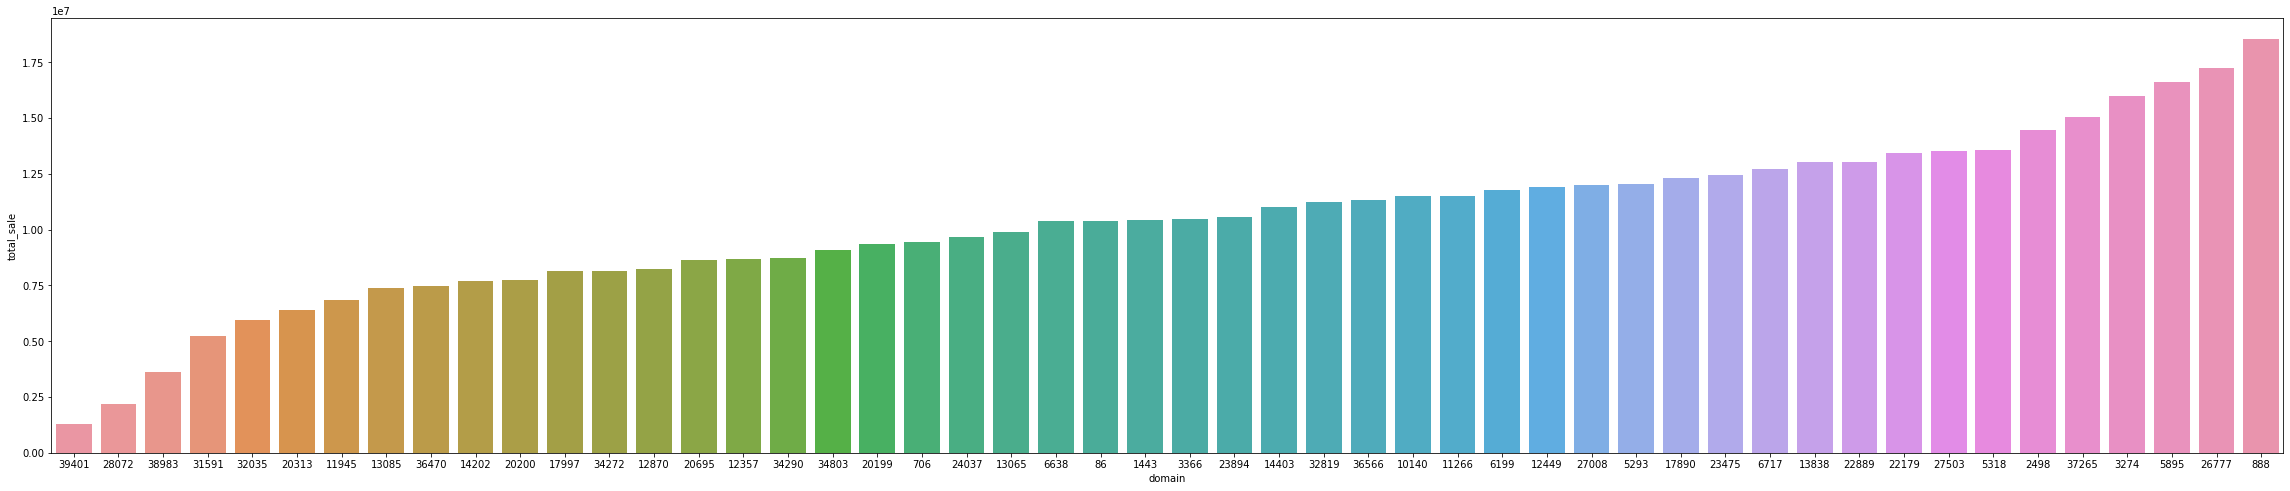

In [21]:
plt.figure(figsize=(40,8))
sns.barplot(x='domain',
            y="total_sale", data=domain1,
            order=domain1.sort_values("total_sale").domain)



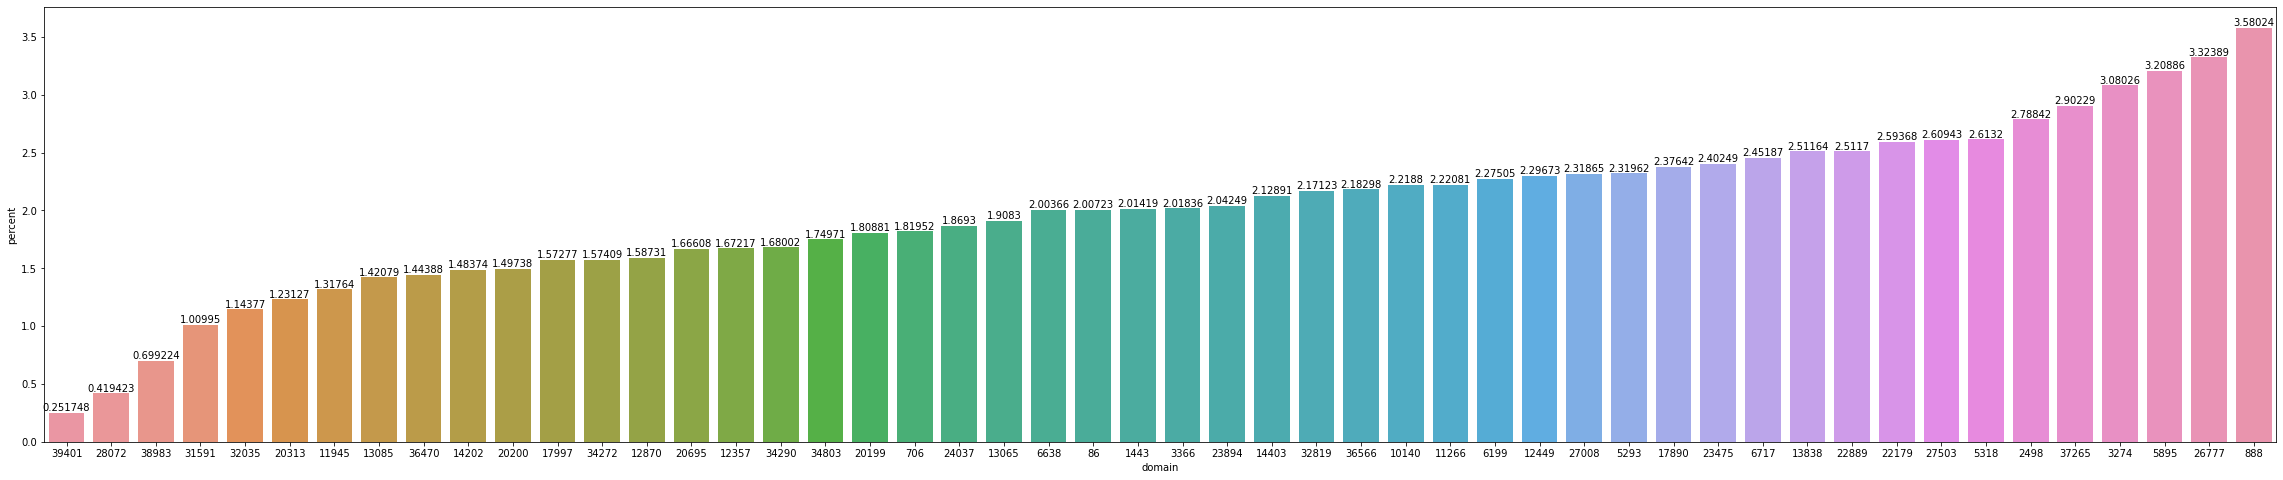

In [22]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='domain',
            y="percent", data=domain1,
            order=domain1.sort_values("percent").domain)
for i in ax.containers:
    ax.bar_label(i,)



*   In total there are 50 domains
*   The above graph represents the total demand distribution of all items across the domains
*   It can be observed that each domain has a significant demand percentage
*   Hence we cannot ignore or exclude any domain








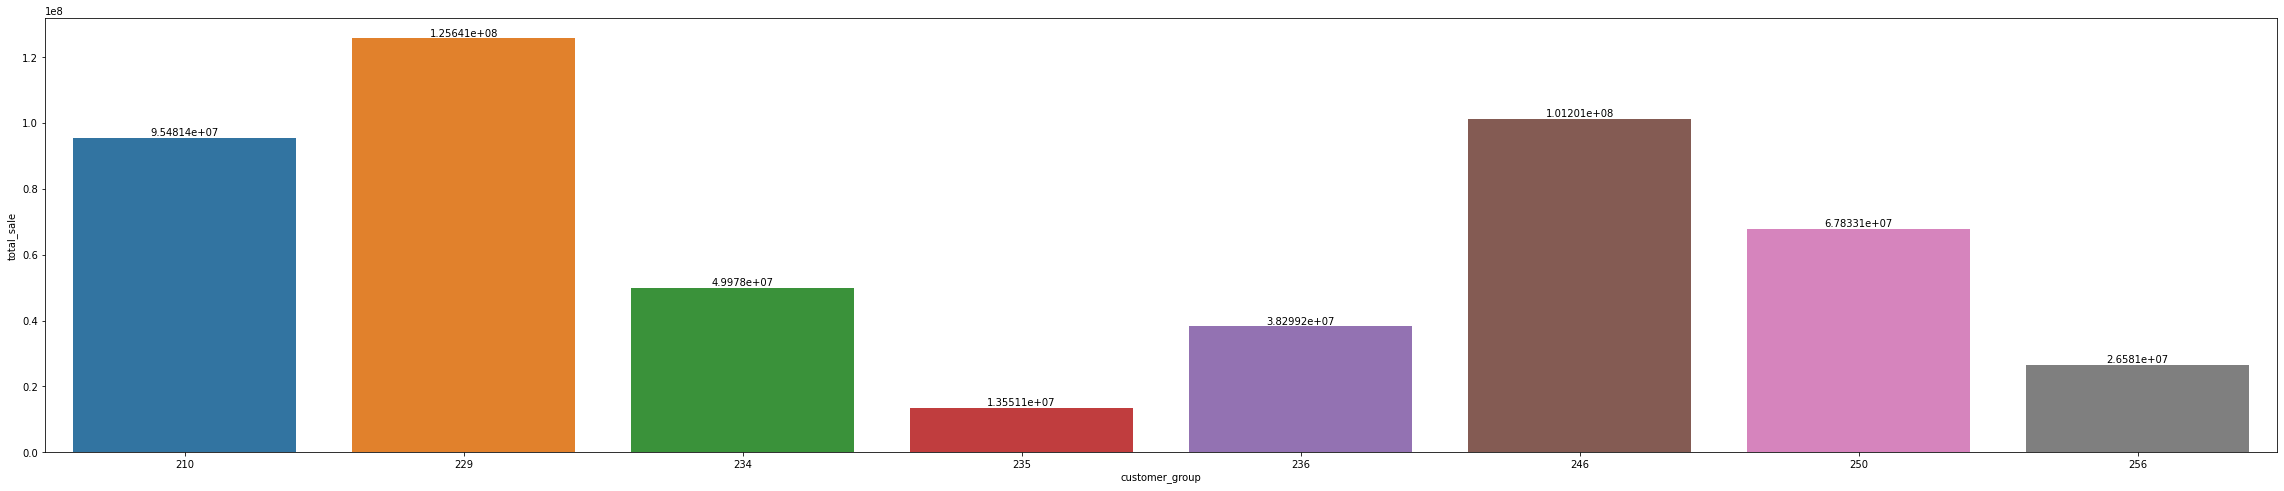

In [23]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='customer_group',
            y="total_sale", data=domain1, estimator=sum,ci=None
            )
for i in ax.containers:
    ax.bar_label(i,)

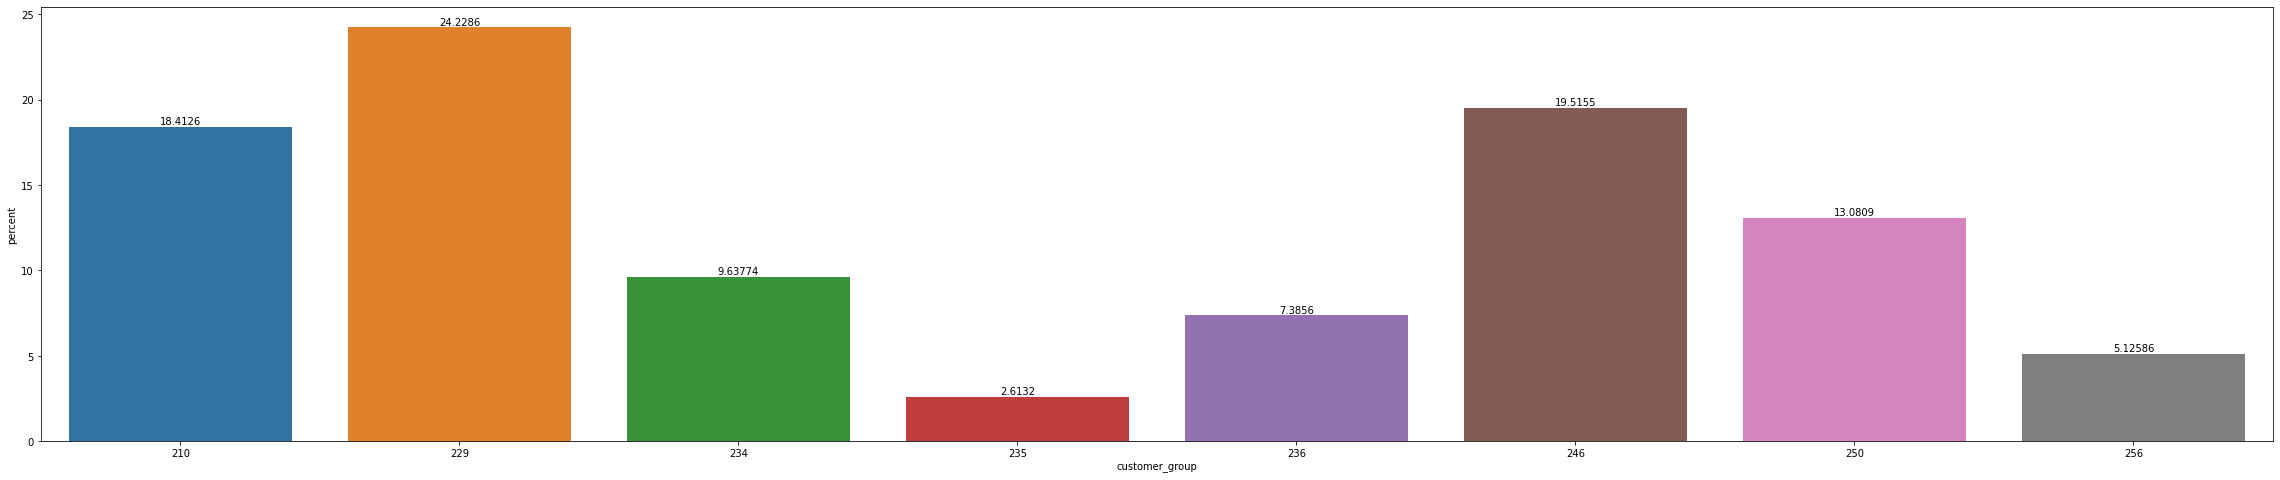

In [24]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='customer_group',
            y="percent", data=domain1, estimator=sum,ci=None
            )
for i in ax.containers:
    ax.bar_label(i,)



*   There are total 8 customer groups and the each has a significant demand *percentage*



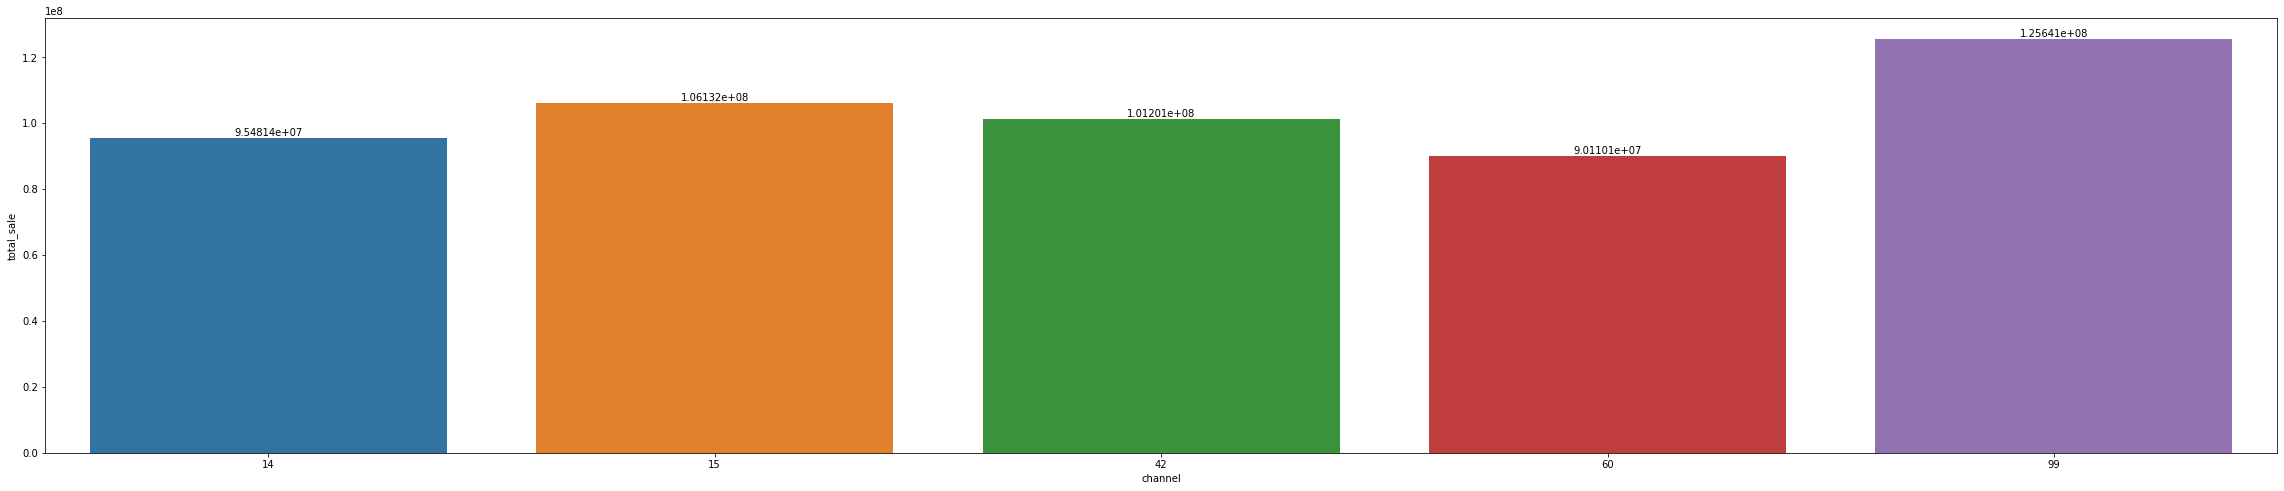

In [25]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='channel',
            y="total_sale", data=domain1, estimator=sum,ci=None
            )
for i in ax.containers:
    ax.bar_label(i,)

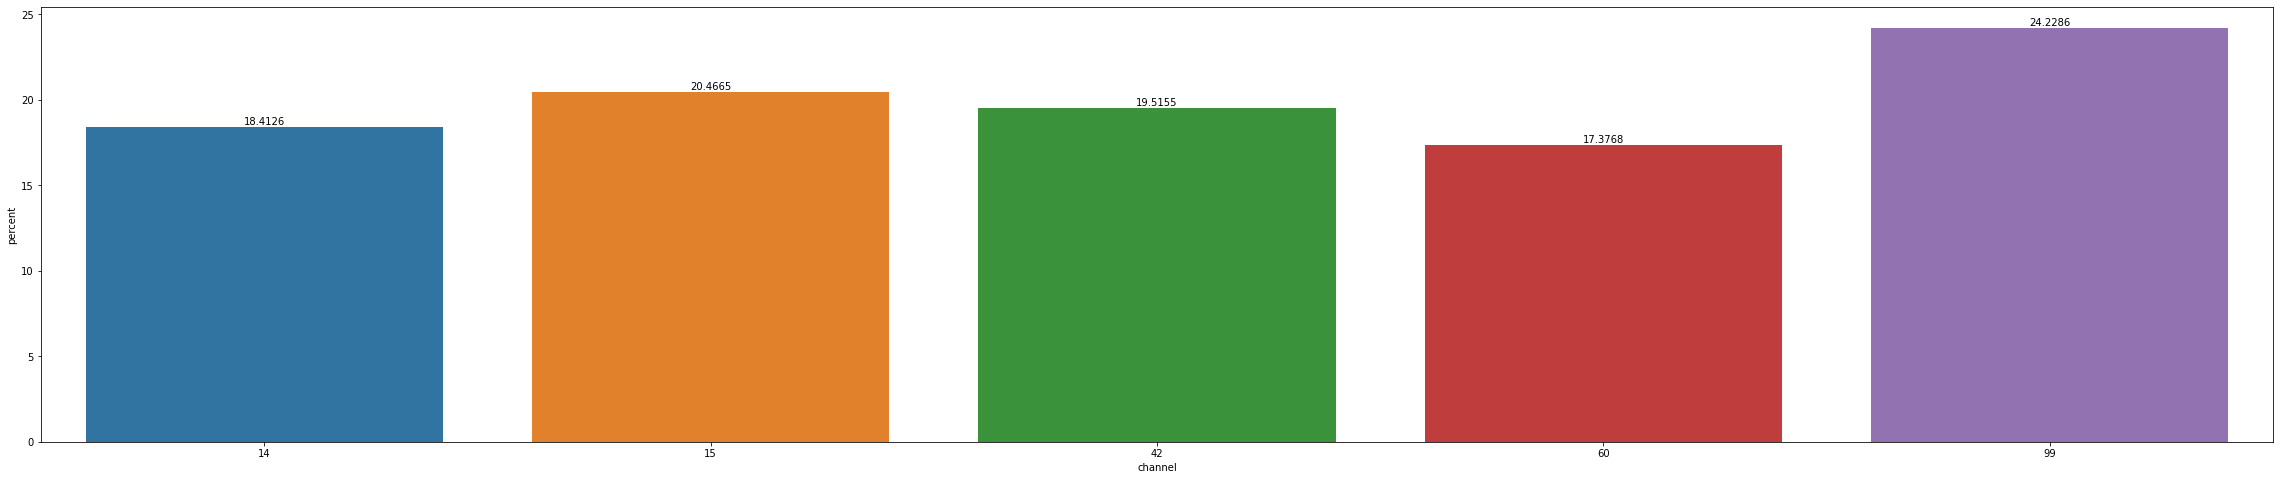

In [26]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='channel',
            y="percent", data=domain1, estimator=sum,ci=None
            )
for i in ax.containers:
    ax.bar_label(i,)

There are 5 channel with each having almost 20% of demand each

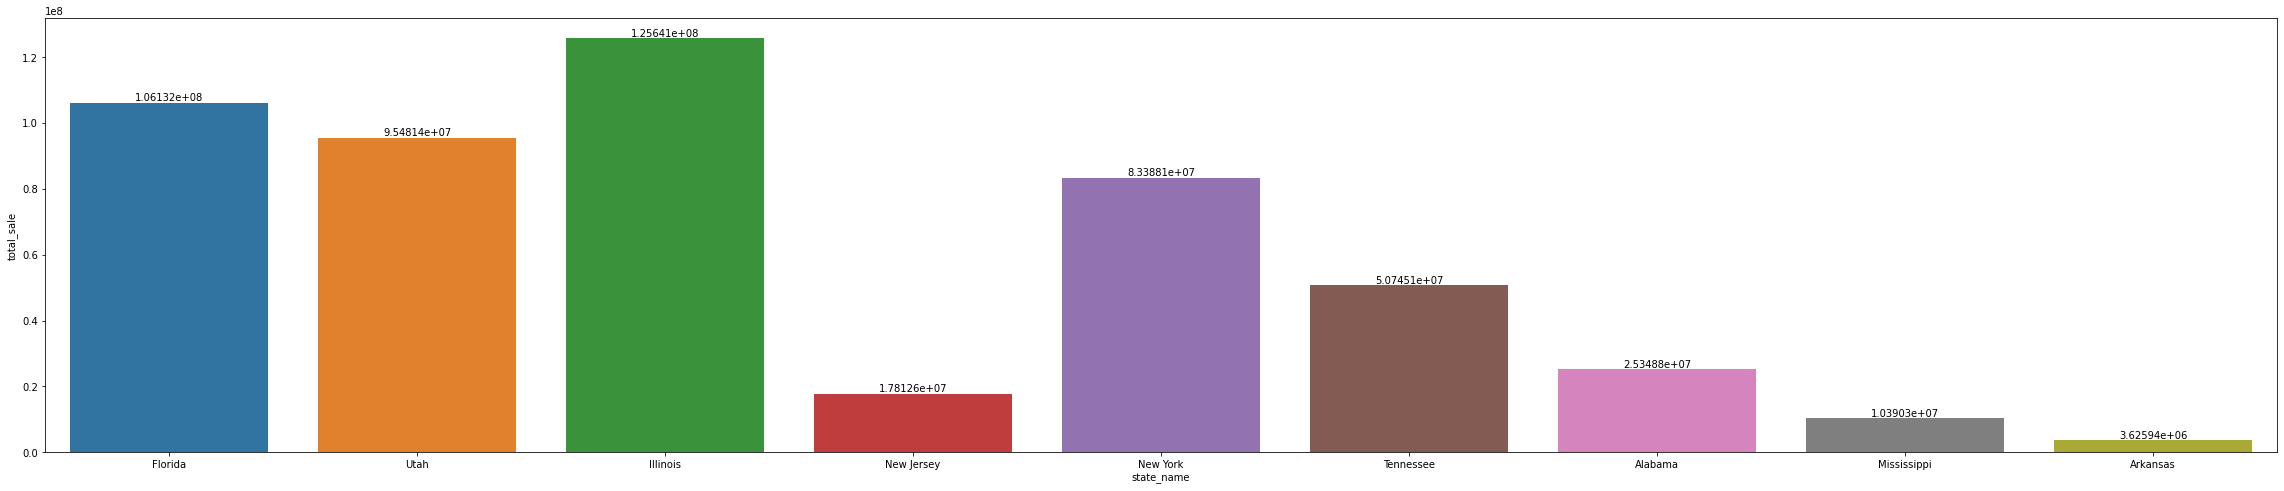

In [27]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='state_name',
            y="total_sale", data=domain1, estimator=sum,ci=None
            )
for i in ax.containers:
    ax.bar_label(i,)

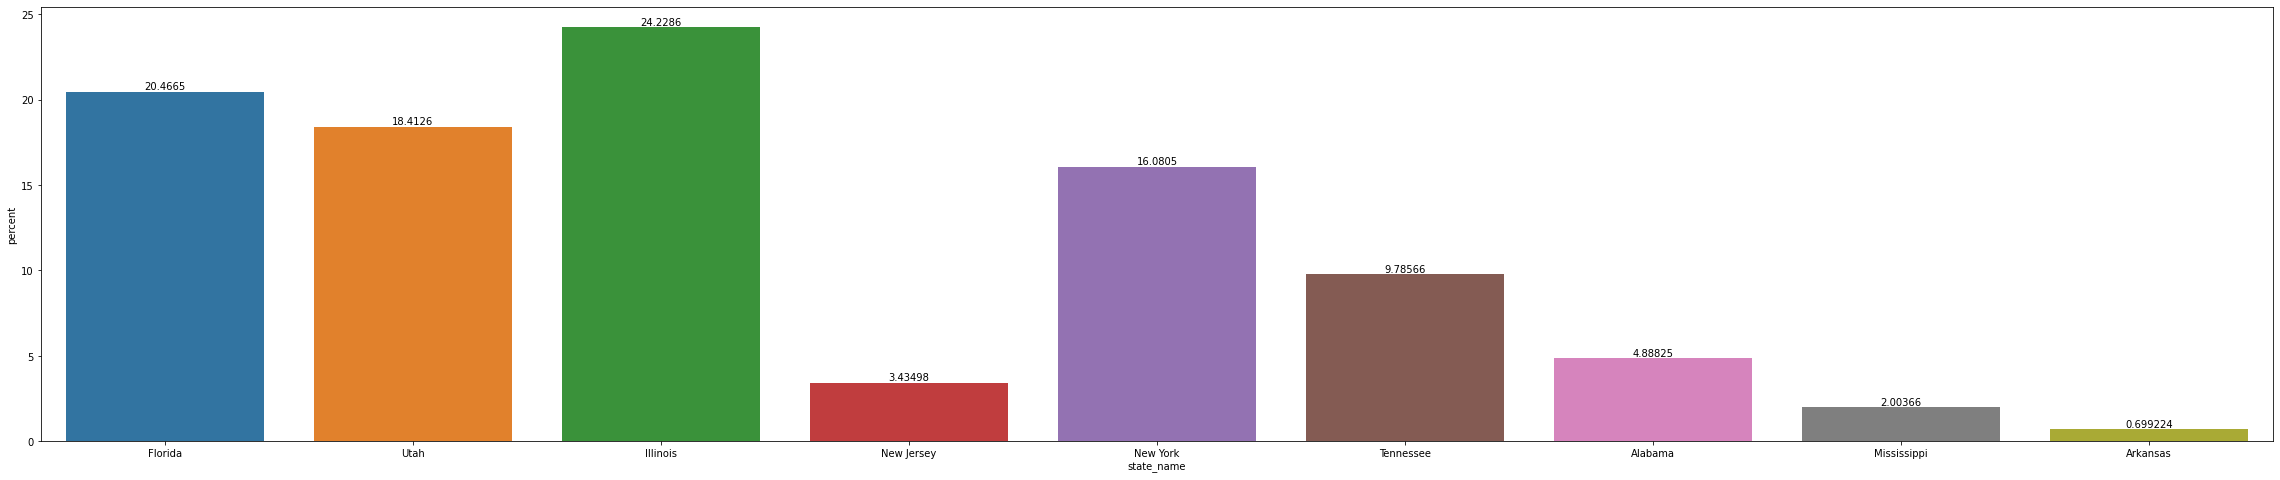

In [28]:
plt.figure(figsize=(40,8))
ax=sns.barplot(x='state_name',
            y="percent", data=domain1, estimator=sum,ci=None
            )
for i in ax.containers:
    ax.bar_label(i,)



*   The demand is distributed across 9 states
*   With Illinois having highest demand at 24%



In [29]:
print(len(domain1.domain.unique()))
print(len(domain1.customer_group.unique()))
print(len(domain1.state_name.unique()))
print(len(domain1.channel.unique()))

50
8
9
5


**50 domains, 9 states, 8 customer groups, 5 channels**

In [30]:
import plotly.express as px 

In [166]:
fig3 = px.treemap(domain1, path=['channel', 'state_name','customer_group'], values='percent', color='customer_group')
fig3.show()

In [32]:

fig3 = px.treemap(domain1, path=['customer_group', 'domain'], values='percent', color='domain')
fig3.show()

Each domain is in a customer group, there is no overlap

In [33]:
all_groups=domain1.customer_group.unique()
l=[]
for j in all_groups:
  r=set()
  r.add(j)
  for i in range(len(domain1)):
    if domain1.loc[i,"customer_group"]==j:
      r.add(domain1.loc[i,"domain"])
  l.append(r)


count=0
for i in l:
  for j in l:
    if i!=j:
      count=count+len(i&j)

print(count)

0


In [34]:
import plotly.express as px 
fig3 = px.treemap(domain1, path=['channel', 'customer_group'], values='percent', color='customer_group')
fig3.show()

In [35]:
fig3 = px.treemap(domain1, path=['channel', 'state_name'], values='percent', color='state_name')
fig3.show()

In [36]:
fig3 = px.treemap(domain1, path=['state_name', 'domain'], values='percent', color='domain')
fig3.show()

Each domain is in a state, there is no overlap

In [37]:
all_states=domain1.state_name.unique()
l=[]
for j in all_states:
  r=set()
  r.add(j)
  for i in range(len(domain1)):
    if domain1.loc[i,"state_name"]==j:
      r.add(domain1.loc[i,"domain"])
  l.append(r)


count=0
for i in l:
  for j in l:
    if i!=j:
      count=count+len(i&j)

print(count)


0


In [38]:
item1=df1.groupby(['Item.[Planning Item]','Item.[L5]', 'Item.[L2]',
       'Item.[L1$DisplayName]', 'Item.[L3]']).agg(total_sale = ('Sell Out Stat Fcst','sum')).reset_index()

In [39]:
item1

Item.[Planning Item]  Item.[L5]  Item.[L2]  Item.[L1$DisplayName]  \
0                400000000  405000000  205050500              105050505   
1                400000001  405000000  205050500              105050565   
2                400000002  405000000  205050500              105050510   
3                400000003  405000000  205050500              105050565   
4                400000004  405000000  205050500              105050535   
...                    ...        ...        ...                    ...   
3861             400007849  425000000  225051500              125051535   
3862             400007850  425000000  225051500              125051550   
3863             400007851  470000000  270700500              170700505   
3864             400007852  470000000  270700500              170700505   
3865             400007855  450000000  250450500              150450505   

      Item.[L3]    total_sale  
0     305050000  3.500547e+06  
1     305050000  1.980120e+05  
2     305050000  1.767728e+07  
3     305050000  6.081445e+06  
4     305050000  7.630181e+06  
...         ...           ...  
3861  325050000  9.917494e+02  
3862  325050000  2.648378e+01  
3863  370700000  4.292974e+02  
3864  370700000  4.770597e+02  
3865  350450000  4.854593e+01  

[3866 rows x 6 columns]

In [40]:
item1["percent"]= 100*(item1.total_sale / item1.total_sale.sum())

In [41]:
item1=item1.sort_values(by=["percent"],ascending=False)

In [42]:
item1["cumm_percent"]= 100*(item1.total_sale.cumsum() / item1.total_sale.sum())

In [43]:
item1

Item.[Planning Item]  Item.[L5]  Item.[L2]  Item.[L1$DisplayName]  \
1259             400004162  470000000  270800500              170800505   
1260             400004163  470000000  270800500              170800505   
1051             400003277  420000000  220052000              120052005   
16               400000028  450000000  250050500              150050505   
2                400000002  405000000  205050500              105050510   
...                    ...        ...        ...                    ...   
2245             400005428  425000000  225151500              125151510   
2243             400005426  425000000  225151500              125151510   
2242             400005425  425000000  225151500              125151510   
2036             400005190  425000000  225056500              125056525   
2037             400005191  425000000  225056500              125056525   

      Item.[L3]    total_sale   percent  cumm_percent  
1259  370800000  2.959837e+07  5.707740      5.707740  
1260  370800000  2.509375e+07  4.839069     10.546809  
1051  320050000  2.437210e+07  4.699908     15.246717  
16    350050000  1.834571e+07  3.537779     18.784497  
2     305050000  1.767728e+07  3.408881     22.193377  
...         ...           ...       ...           ...  
2245  325150000  1.234700e+01  0.000002     99.999991  
2243  325150000  1.234700e+01  0.000002     99.999993  
2242  325150000  1.234700e+01  0.000002     99.999995  
2036  325050000  1.225824e+01  0.000002     99.999998  
2037  325050000  1.225824e+01  0.000002    100.000000  

[3866 rows x 8 columns]

In [44]:
item1=item1.reset_index().drop(columns=["index"])

In [45]:
item1.rename(columns={"Item.[Planning Item]":'item',"Item.[L5]":"L5","Item.[L2]":"L2","Item.[L1$DisplayName]":"L1",'Item.[L3]':"L3"},inplace=True)

<AxesSubplot:xlabel='item', ylabel='cumm_percent'>

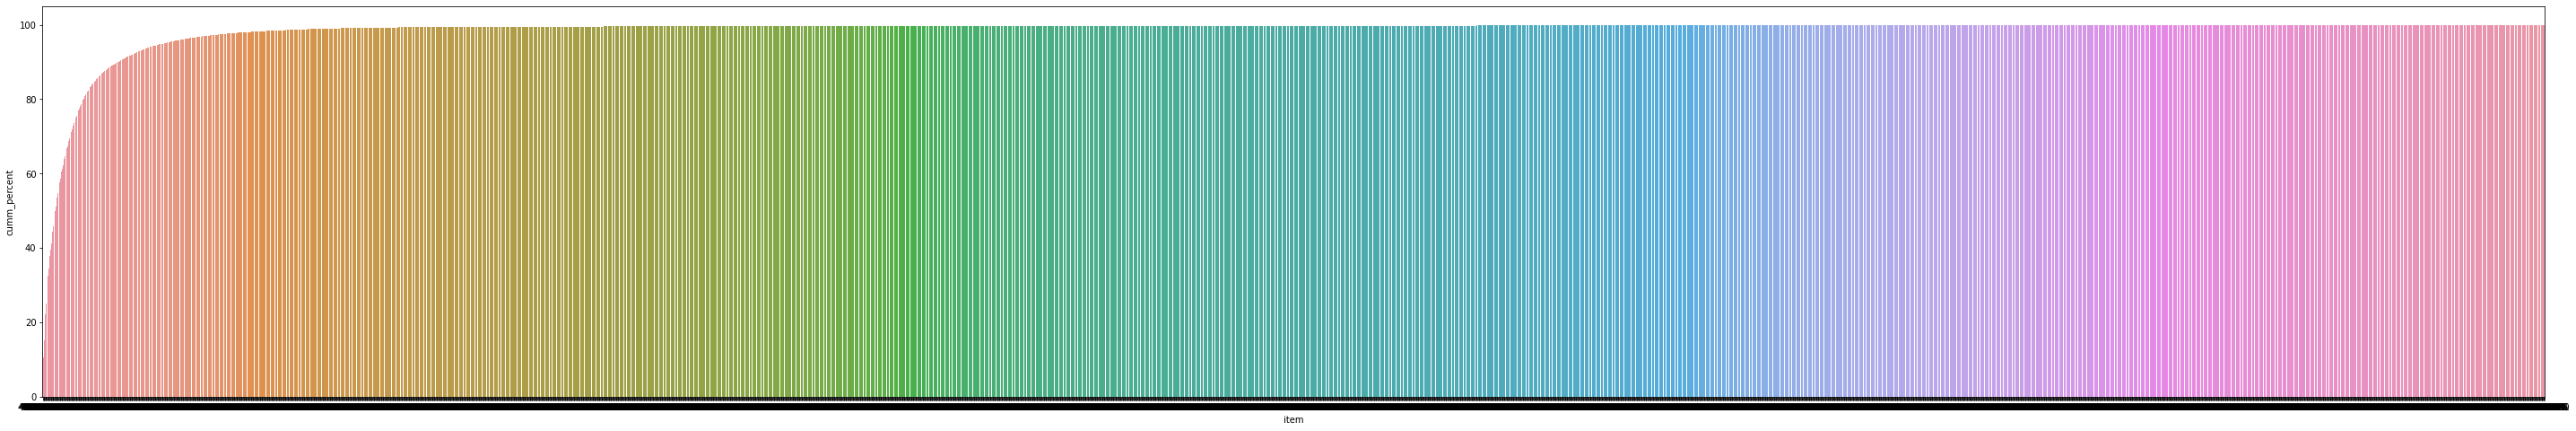

In [46]:
plt.figure(figsize=(50,8))
sns.barplot(x='item',
            y="cumm_percent", data=item1,
            order=item1.sort_values("cumm_percent").item)



*   There are total 3866 items
*   The above graph represent the cumulative percentage of all items sorted in descending order of percentage
*   It can be seen that the graph quickly reaches around 95% and then flat lines.


*  This shows a large number of items have negligible demand



In [47]:
item1.index

RangeIndex(start=0, stop=3866, step=1)

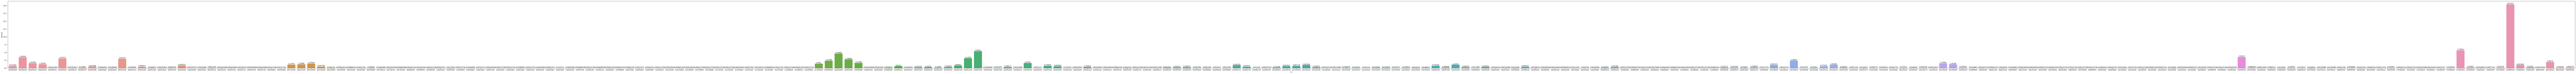

In [48]:
plt.figure(figsize=(300,8))
ax=sns.barplot(x="L1",
            y="percent", data=item1,estimator=sum,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

Total 258 L1 category but it can be seen that the demand is sparsely distributed

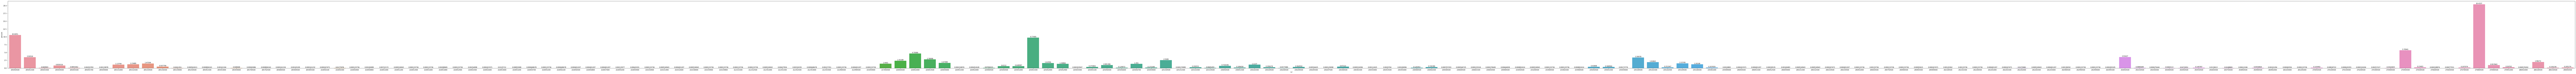

In [49]:
plt.figure(figsize=(300,8))
ax=sns.barplot(x='L2',
            y="percent", data=item1,estimator=sum,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

Same sparsity can be observed in 174 L2 category

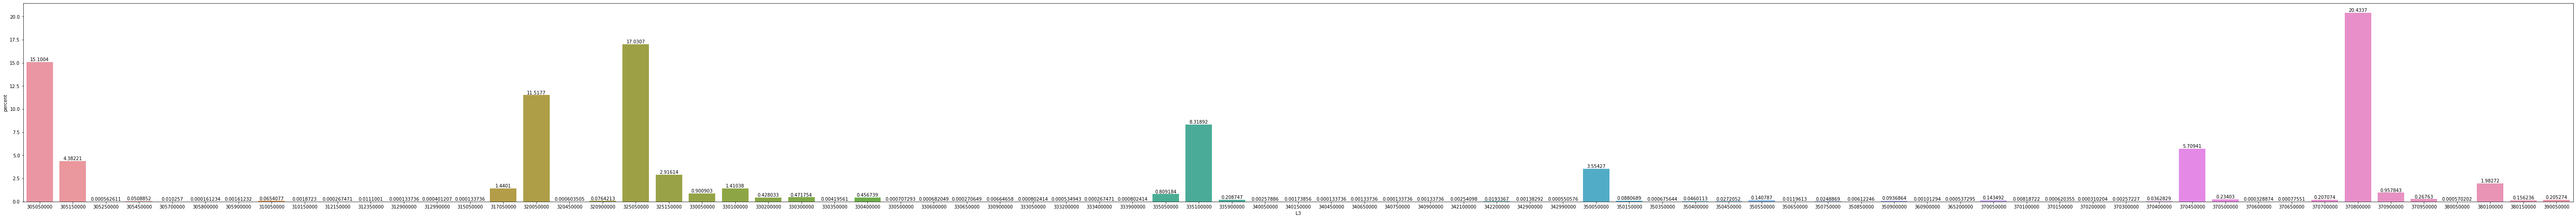

In [50]:
plt.figure(figsize=(100,8))
ax=sns.barplot(x='L3',
            y="percent", data=item1,estimator=sum,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

In the 77 L3 categories roughly 30% of them have significant demand

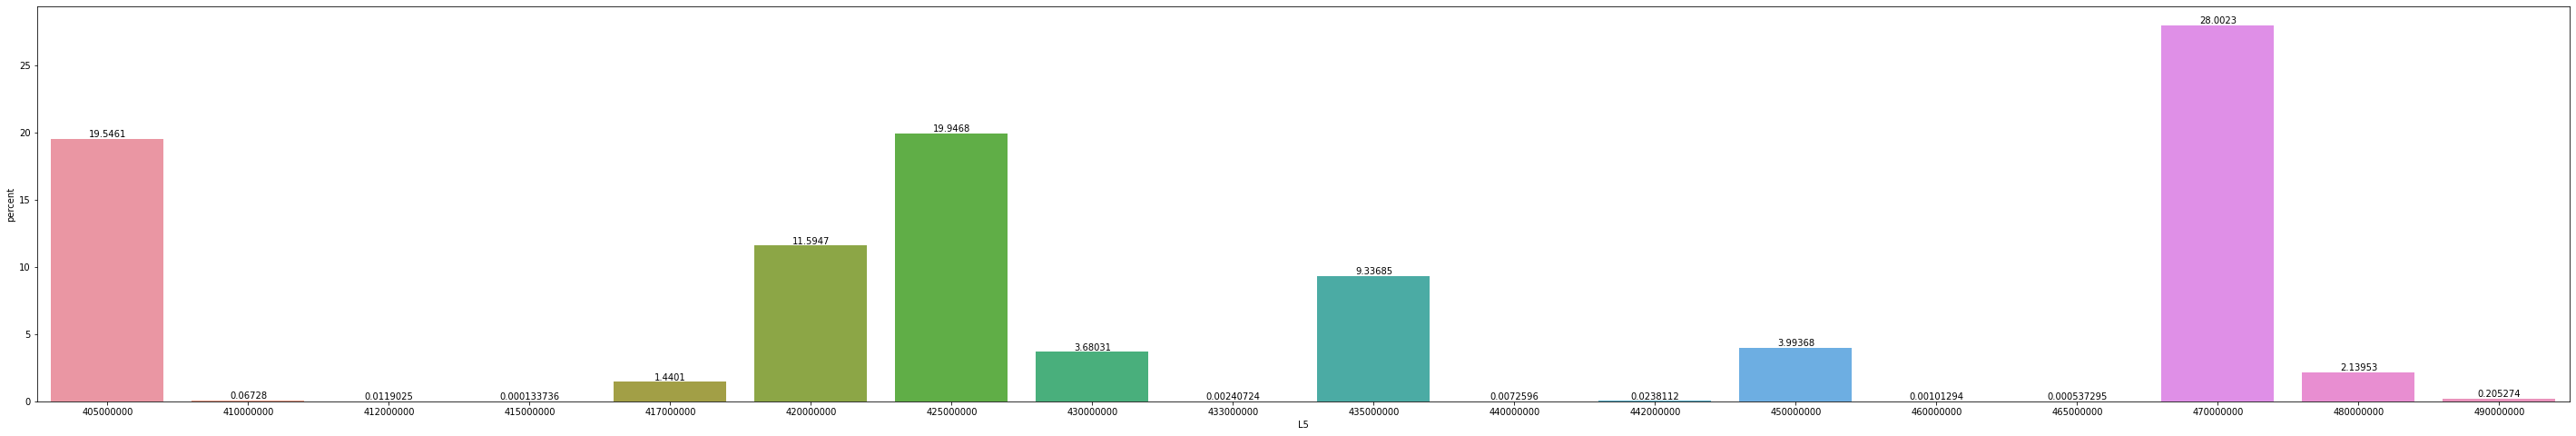

In [51]:
plt.figure(figsize=(50,8))
ax=sns.barplot(x='L5',
            y="percent", data=item1,estimator=sum,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

Same 50% of 18 L5 categories have significant demand. This indicates two possibilities either some of have really low demand or are active for a very shot duration


In [52]:
len(item1.L5.unique())

18

In [53]:
len(item1.L1.unique())

258

In [54]:
len(item1.L2.unique())

174

In [55]:
len(item1.L3.unique())

77

In [56]:
len(item1.item.unique())

3866



*   ***3866 items, 258 L1, 174 L2, 77 L3, 18 L4*** 



In [57]:
fig3 = px.treemap(item1, path=["L5", "L3","L2",'L1'], values='percent', color='L1')
fig3.show()

In [58]:
fig3 = px.treemap(item1, path=['L1', 'item'], values='percent', color='item')
fig3.show()

In [59]:
all_L1=item1.L1.unique()
l=[]
for j in all_L1:
  r=set()
  r.add(j)
  for i in range(len(item1)):
    if item1.loc[i,"L1"]==j:
      r.add(item1.loc[i,"item"])
  l.append(r)


count=0
for i in l:
  for j in l:
    if i!=j:
      count=count+len(i&j)

print(count)

0


In [60]:
fig3 = px.treemap(item1, path=['L2', 'L1'], values='percent', color='L1')
fig3.show()

In [61]:
all_L2=item1.L2.unique()
l=[]
for j in all_L2:
  r=set()
  r.add(j)
  for i in range(len(item1)):
    if item1.loc[i,"L2"]==j:
      r.add(item1.loc[i,"L1"])
  l.append(r)


count=0
for i in l:
  for j in l:
    if i!=j:
      count=count+len(i&j)

print(count)

0


In [62]:
fig3 = px.treemap(item1, path=['L3', 'L2'], values='percent', color='L2')
fig3.show()

In [63]:
all_L3=item1.L3.unique()
l=[]
for j in all_L3:
  r=set()
  r.add(j)
  for i in range(len(item1)):
    if item1.loc[i,"L3"]==j:
      r.add(item1.loc[i,"L2"])
  l.append(r)


count=0
for i in l:
  for j in l:
    if i!=j:
      count=count+len(i&j)

print(count)


0


In [64]:
fig3 = px.treemap(item1, path=['L5', 'L3'], values='percent', color='L3')
fig3.show()

In [65]:
all_L5=item1.L5.unique()
l=[]
for j in all_L5:
  r=set()
  r.add(j)
  for i in range(len(item1)):
    if item1.loc[i,"L5"]==j:
      r.add(item1.loc[i,"L3"])
  l.append(r)


count=0
for i in l:
  for j in l:
    if i!=j:
      count=count+len(i&j)

print(count)

0


**Conclusion it is a hierarchical structure with item no being unique. Each item has a unique L1, L2, L3, L5**

In [66]:
count=[]
p=10
c=0
for i in range(len(item1)):
  flag=0
  while(flag==0):
    if item1.loc[i,"cumm_percent"]<=p:
      c=c+1
      flag=1
    else:
      count.append(c)
      c=0
      p=p+10
      if p==100:
        p=p+1
count.append(c)

In [67]:
count

[1, 3, 3, 6, 7, 9, 13, 21, 53, 3750]

<BarContainer object of 10 artists>

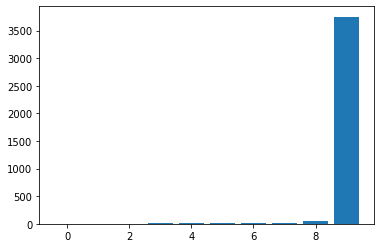

In [68]:
plt.bar(range(10),count)

**90% percent demand comes from 116 items. So it greatly reduces the number of items needed for further analysis.**

In [69]:
itemL1=df1.groupby(['Item.[L5]', 'Item.[L2]',
       'Item.[L1$DisplayName]', 'Item.[L3]']).agg(total_sale = ('Sell Out Stat Fcst','sum')).reset_index()

In [70]:
itemL1

Item.[L5]  Item.[L2]  Item.[L1$DisplayName]  Item.[L3]    total_sale
0    405000000  205050500              105050505  305050000  3.500547e+06
1    405000000  205050500              105050510  305050000  1.789083e+07
2    405000000  205050500              105050535  305050000  8.099432e+06
3    405000000  205050500              105050545  305050000  6.337198e+06
4    405000000  205050500              105050555  305050000  1.672192e+03
..         ...        ...                    ...        ...           ...
253  470000000  270951000              170951005  370950000  1.387837e+06
254  480000000  280052000              180052005  380050000  2.956873e+03
255  480000000  280100500              180100505  380100000  1.028171e+07
256  480000000  280150500              180150505  380150000  8.101861e+05
257  490000000  290050500              190050505  390050000  1.064480e+06

[258 rows x 5 columns]

In [71]:
itemL1["percent"]= 100*(itemL1.total_sale / itemL1.total_sale.sum())

In [72]:
itemL1=itemL1.sort_values(by=["percent"],ascending=False)

In [73]:
itemL1["cumm_percent"]= 100*(itemL1.total_sale.cumsum() / itemL1.total_sale.sum())

In [74]:
itemL1=itemL1.reset_index().drop(columns=["index"])

In [75]:
itemL1.rename(columns={"Item.[L5]":"L5","Item.[L2]":"L2","Item.[L1$DisplayName]":"L1",'Item.[L3]':"L3"},inplace=True)

<AxesSubplot:xlabel='L1', ylabel='percent'>

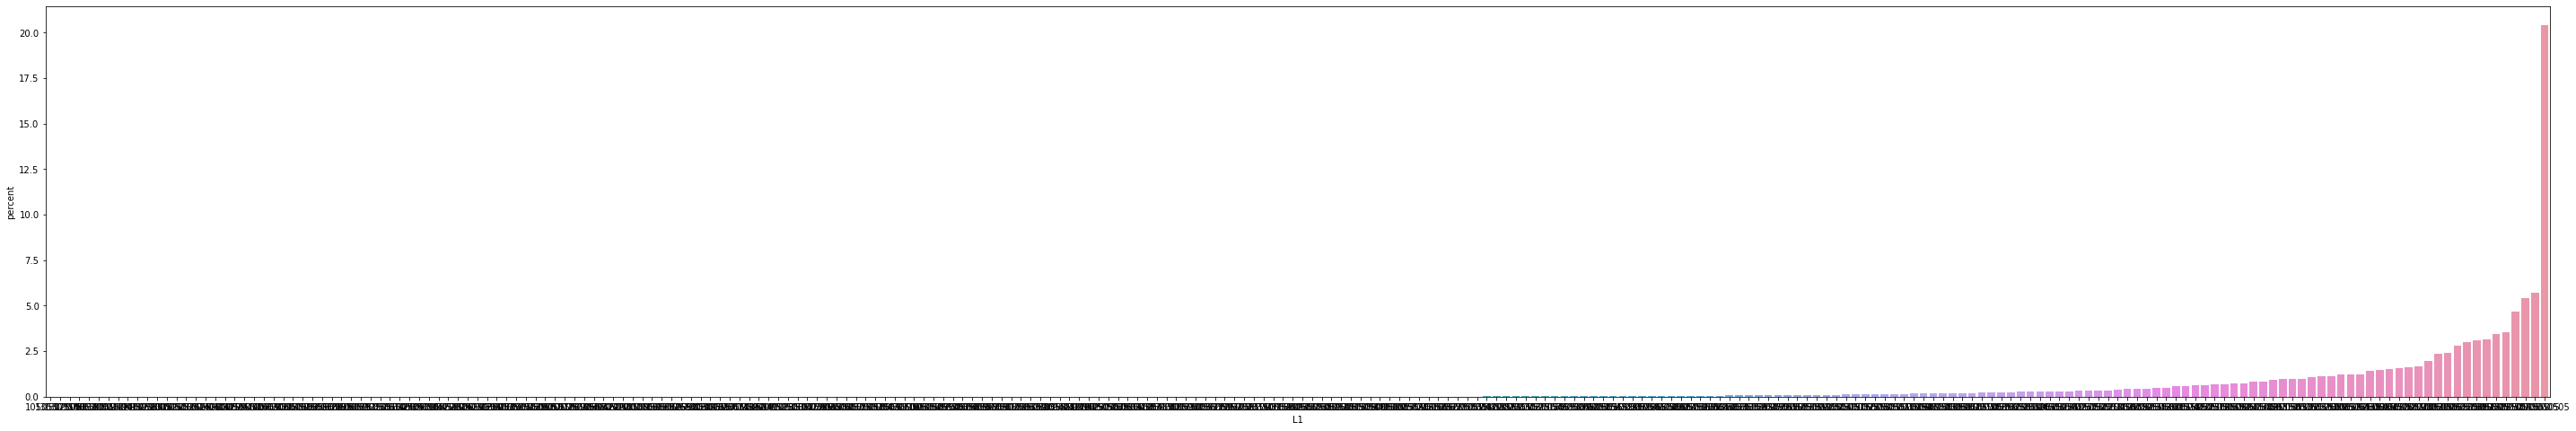

In [76]:
plt.figure(figsize=(50,8))
sns.barplot(x='L1',
            y="percent", data=itemL1,
            order=itemL1.sort_values("percent").L1)

[0, 0, 2, 3, 3, 3, 7, 8, 15, 217]

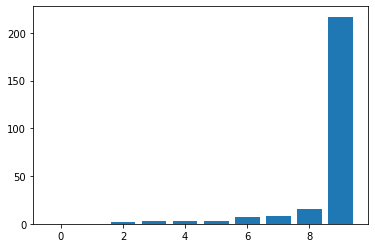

In [77]:
count=[]
p=10
c=0
for i in range(len(itemL1)):
  flag=0
  while(flag==0):
    if itemL1.loc[i,"cumm_percent"]<=p:
      c=c+1
      flag=1
    else:
      count.append(c)
      c=0
      p=p+10
      if p==100:
        p=p+1
count.append(c)
plt.bar(range(10),count)
count

Similarly 41 L1 category contribute to 90% of demand

In [78]:
sum(count)

258

In [79]:
itemL2=df1.groupby(['Item.[L5]', 'Item.[L2]',
        'Item.[L3]']).agg(total_sale = ('Sell Out Stat Fcst','sum')).reset_index()

In [80]:
itemL2

Item.[L5]  Item.[L2]  Item.[L3]    total_sale
0    405000000  205050500  305050000  5.499456e+07
1    405000000  205051500  305050000  1.817705e+07
2    405000000  205053500  305050000  3.624927e+05
3    405000000  205054500  305050000  4.305735e+06
4    405000000  205055500  305050000  4.436133e+05
..         ...        ...        ...           ...
169  470000000  270951000  370950000  1.387837e+06
170  480000000  280052000  380050000  2.956873e+03
171  480000000  280100500  380100000  1.028171e+07
172  480000000  280150500  380150000  8.101861e+05
173  490000000  290050500  390050000  1.064480e+06

[174 rows x 4 columns]

In [81]:
itemL2["percent"]= 100*(itemL2.total_sale / itemL2.total_sale.sum())

In [82]:
itemL2=itemL2.sort_values(by=["percent"],ascending=False)

In [83]:
itemL2["cumm_percent"]= 100*(itemL2.total_sale.cumsum() / itemL2.total_sale.sum())

In [84]:
itemL2=itemL2.reset_index().drop(columns=["index"])

In [85]:
itemL2.rename(columns={"Item.[L5]":"L5","Item.[L2]":"L2",'Item.[L3]':"L3"},inplace=True)

<AxesSubplot:xlabel='L2', ylabel='percent'>

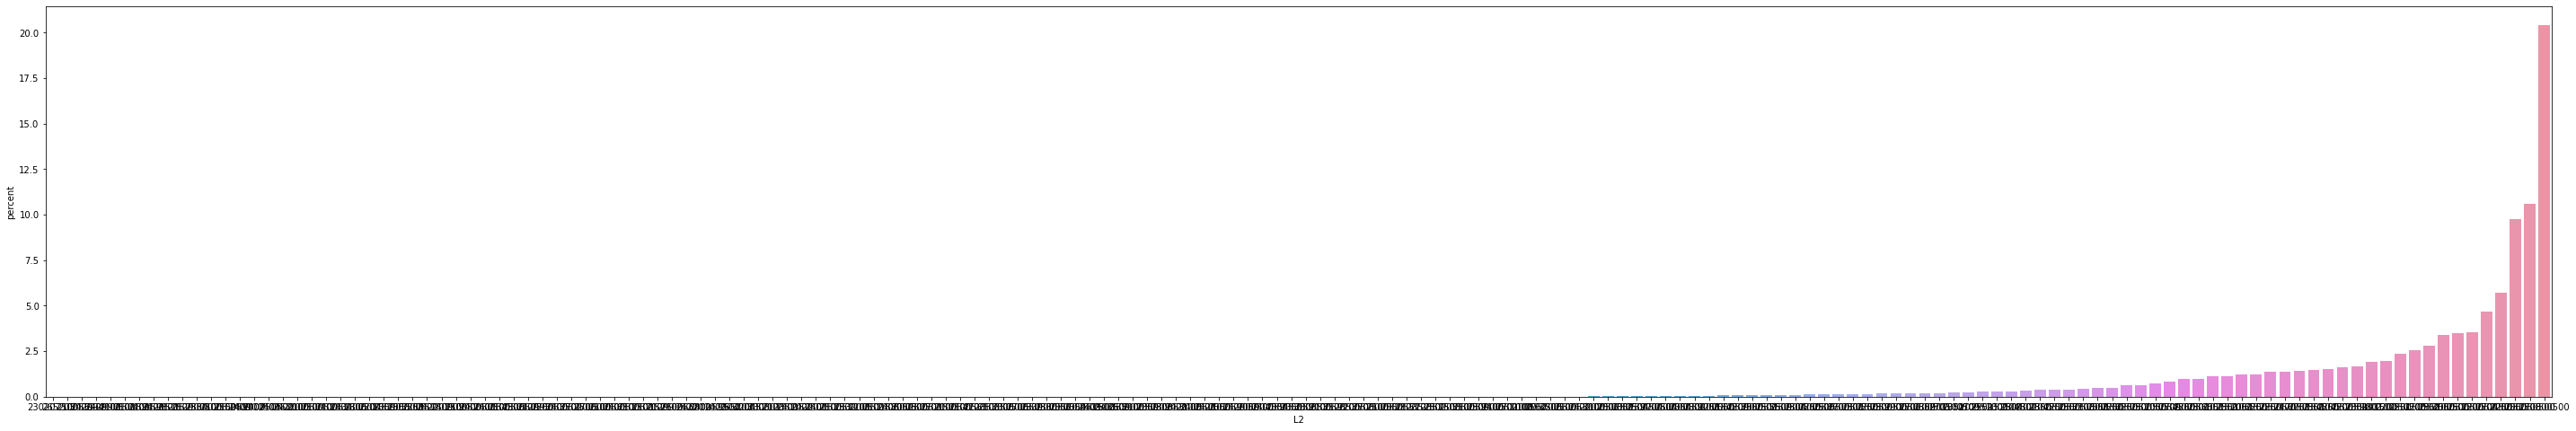

In [86]:
plt.figure(figsize=(50,8))
sns.barplot(x='L2',
            y="percent", data=itemL2,
            order=itemL2.sort_values("percent").L2)

<AxesSubplot:xlabel='L2', ylabel='cumm_percent'>

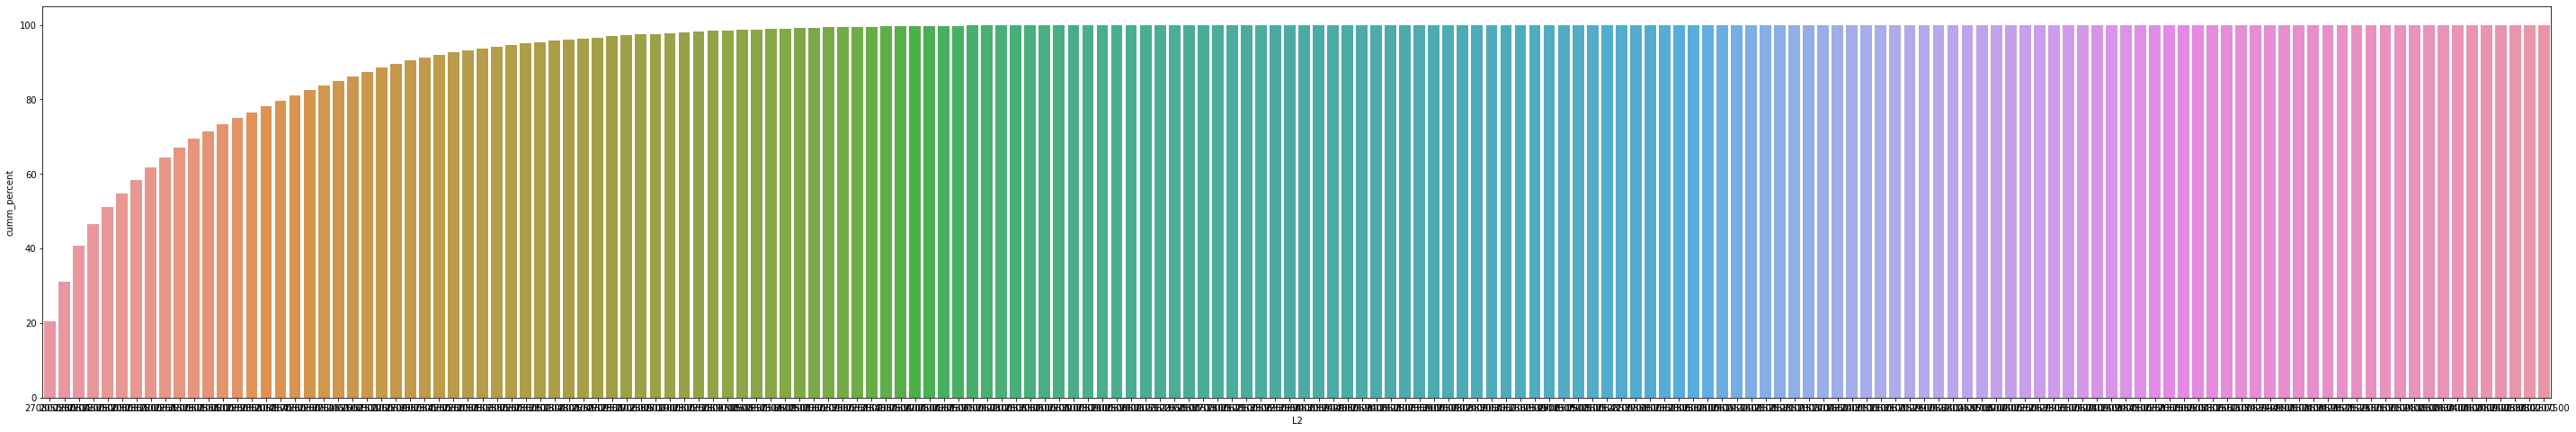

In [87]:
plt.figure(figsize=(50,8))
sns.barplot(x='L2',
            y="cumm_percent", data=itemL2,
            order=itemL2.sort_values("cumm_percent").L2)

[0, 0, 1, 1, 2, 3, 4, 6, 8, 149]

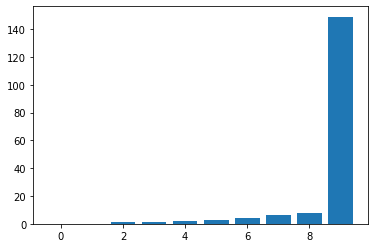

In [88]:
count=[]
p=10
c=0
for i in range(len(itemL2)):
  flag=0
  while(flag==0):
    if itemL2.loc[i,"cumm_percent"]<=p:
      c=c+1
      flag=1
    else:
      count.append(c)
      c=0
      p=p+10
      if p==100:
        p=p+1
count.append(c)
plt.bar(range(10),count)
count

Only 25 out of 174 L2 capture 90% demand

In [89]:
p

101

In [90]:
sum(count)

174

In [91]:
itemL3=df1.groupby(['Item.[L5]',
        'Item.[L3]']).agg(total_sale = ('Sell Out Stat Fcst','sum')).reset_index()

In [92]:
itemL3.head(20)

Item.[L5]  Item.[L3]    total_sale
0   405000000  305050000  7.830563e+07
1   405000000  305150000  2.272461e+07
2   405000000  305250000  2.917506e+03
3   405000000  305450000  2.638733e+05
4   405000000  305700000  5.318938e+04
5   405000000  305800000  8.361045e+02
6   405000000  305900000  8.360954e+03
7   410000000  310050000  3.391816e+05
8   410000000  310150000  9.709098e+03
9   412000000  312150000  1.387014e+03
10  412000000  312350000  5.756108e+04
11  412000000  312900000  6.935070e+02
12  412000000  312990000  2.080521e+03
13  415000000  315050000  6.935070e+02
14  417000000  317050000  7.467863e+06
15  420000000  320050000  5.972690e+07
16  420000000  320450000  3.129567e+03
17  420000000  320900000  3.962943e+05
18  425000000  325050000  8.831519e+07
19  425000000  325150000  1.512210e+07

In [93]:
itemL3["percent"]= 100*(itemL3.total_sale / itemL3.total_sale.sum())

In [94]:
itemL3=itemL3.sort_values(by=["percent"],ascending=False)

In [95]:
itemL3["cumm_percent"]= 100*(itemL3.total_sale.cumsum() / itemL3.total_sale.sum())

In [96]:
itemL3=itemL3.reset_index().drop(columns=["index"])

In [97]:
itemL3.rename(columns={"Item.[L5]":"L5","Item.[L2]":"L2",'Item.[L3]':"L3"},inplace=True)

<AxesSubplot:xlabel='L3', ylabel='percent'>

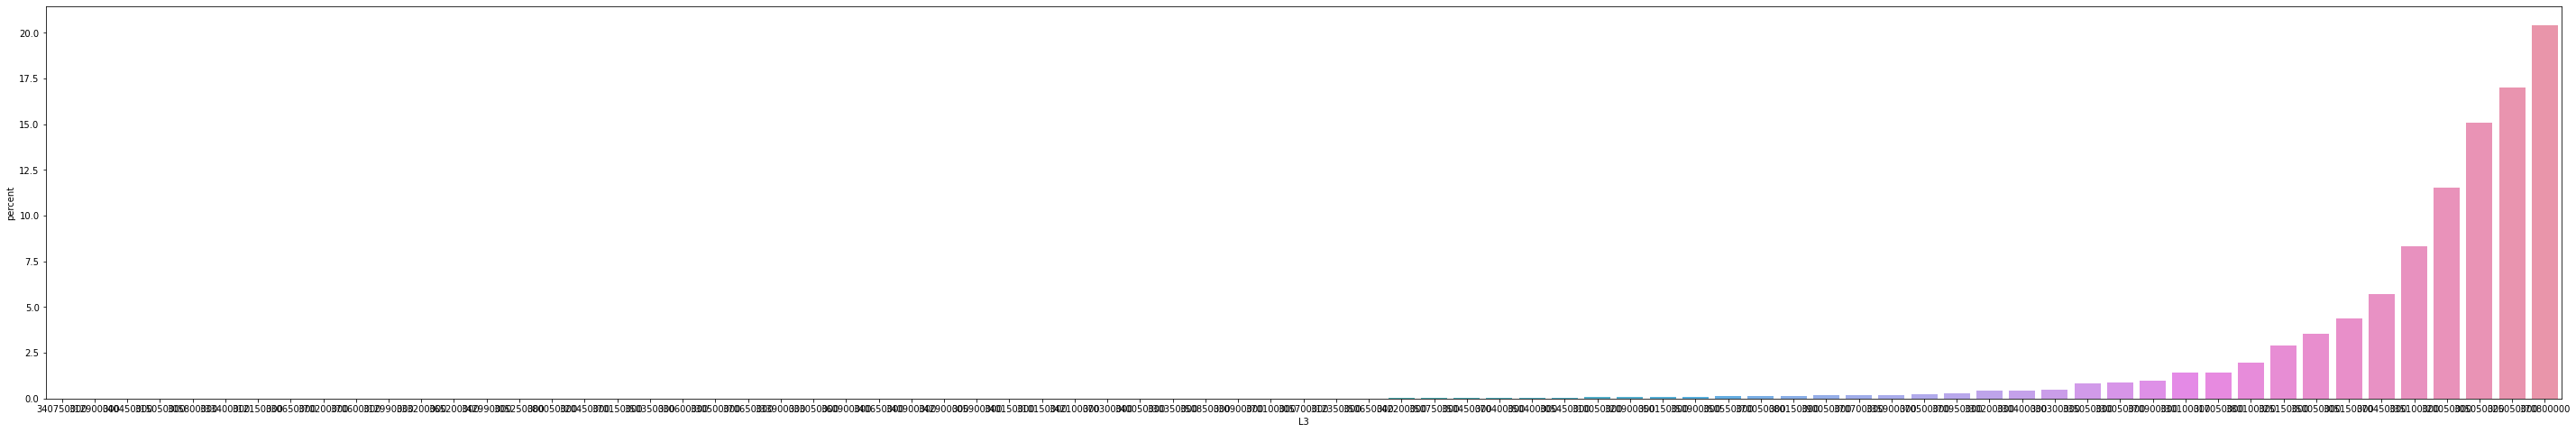

In [98]:
plt.figure(figsize=(50,8))
sns.barplot(x='L3',
            y="percent", data=itemL3,
            order=itemL3.sort_values("percent").L3)

<AxesSubplot:xlabel='L3', ylabel='cumm_percent'>

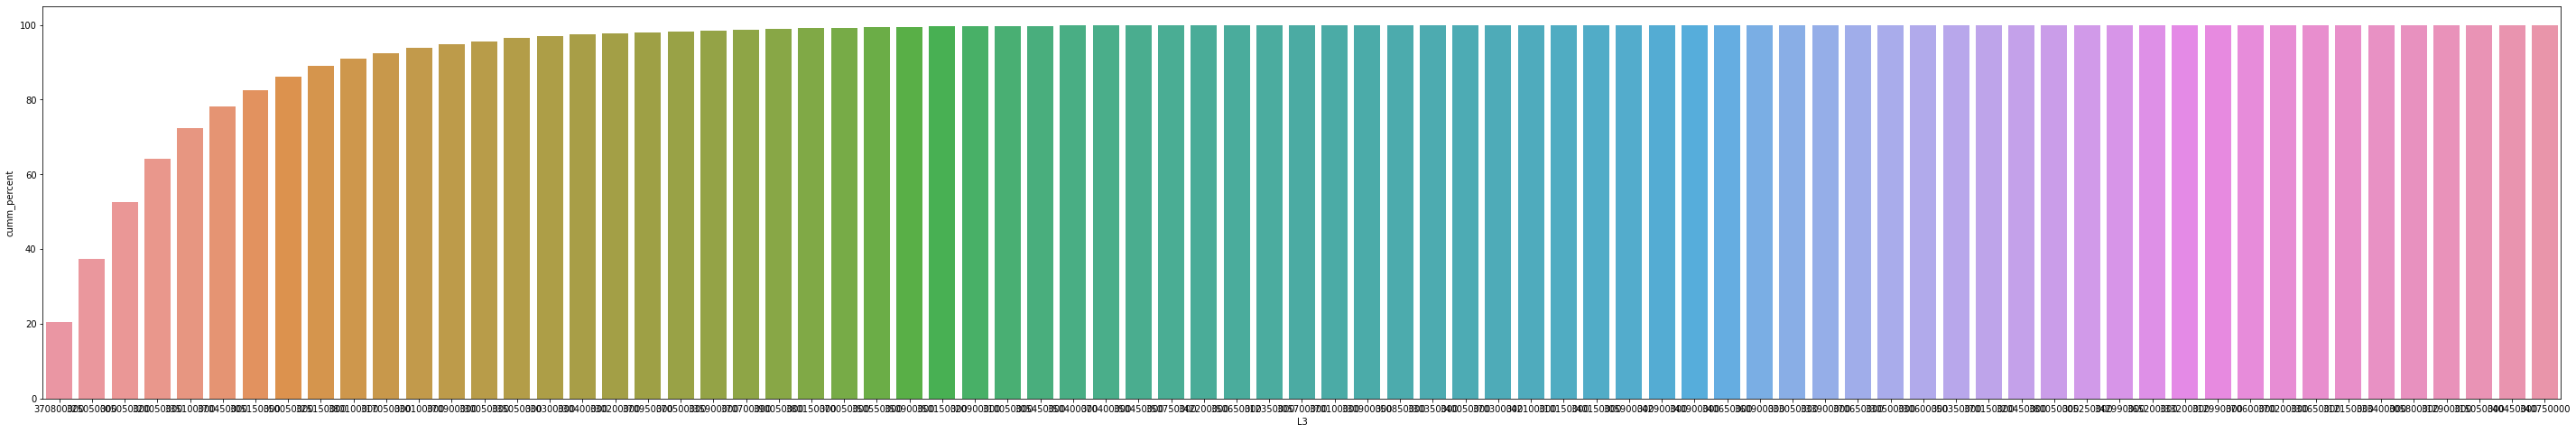

In [99]:
plt.figure(figsize=(50,8))
sns.barplot(x='L3',
            y="cumm_percent", data=itemL3,
            order=itemL3.sort_values("cumm_percent").L3)

In [100]:
count=[]
p=10
c=0
for i in range(len(itemL3)):
  flag=0
  while(flag==0):
    if itemL3.loc[i,"cumm_percent"]<=p:
      c=c+1
      flag=1
    else:
      count.append(c)
      c=0
      p=p+10
      if p==100:
        p=p+1
count.append(c)


In [101]:
count

[0, 0, 1, 1, 0, 1, 1, 2, 3, 68]

In [102]:
sum(count)

77

[0, 0, 1, 1, 0, 1, 1, 2, 3, 68]

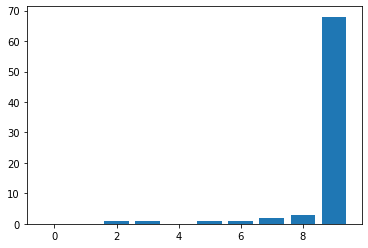

In [103]:
plt.bar(range(10),count)
count

9 of L3 have 90% demand following same trend

In [104]:
itemL5=df1.groupby(['Item.[L5]',
        ]).agg(total_sale = ('Sell Out Stat Fcst','sum')).reset_index()

In [105]:
itemL5.head(20)

Item.[L5]    total_sale
0   405000000  1.013594e+08
1   410000000  3.488907e+05
2   412000000  6.172212e+04
3   415000000  6.935070e+02
4   417000000  7.467863e+06
5   420000000  6.012632e+07
6   425000000  1.034373e+08
7   430000000  1.908481e+07
8   433000000  1.248313e+04
9   435000000  4.841767e+07
10  440000000  3.764580e+04
11  442000000  1.234766e+05
12  450000000  2.070984e+07
13  460000000  5.252757e+03
14  465000000  2.786229e+03
15  470000000  1.452101e+08
16  480000000  1.109485e+07
17  490000000  1.064480e+06

In [106]:
itemL5["percent"]= 100*(itemL5.total_sale / itemL5.total_sale.sum())

In [107]:
itemL5=itemL5.sort_values(by=["percent"],ascending=False)

In [108]:
itemL5["cumm_percent"]= 100*(itemL5.total_sale.cumsum() / itemL5.total_sale.sum())

In [109]:
itemL5=itemL5.reset_index().drop(columns=["index"])

In [110]:
itemL5.rename(columns={"Item.[L5]":"L5"},inplace=True)

<AxesSubplot:xlabel='L5', ylabel='percent'>

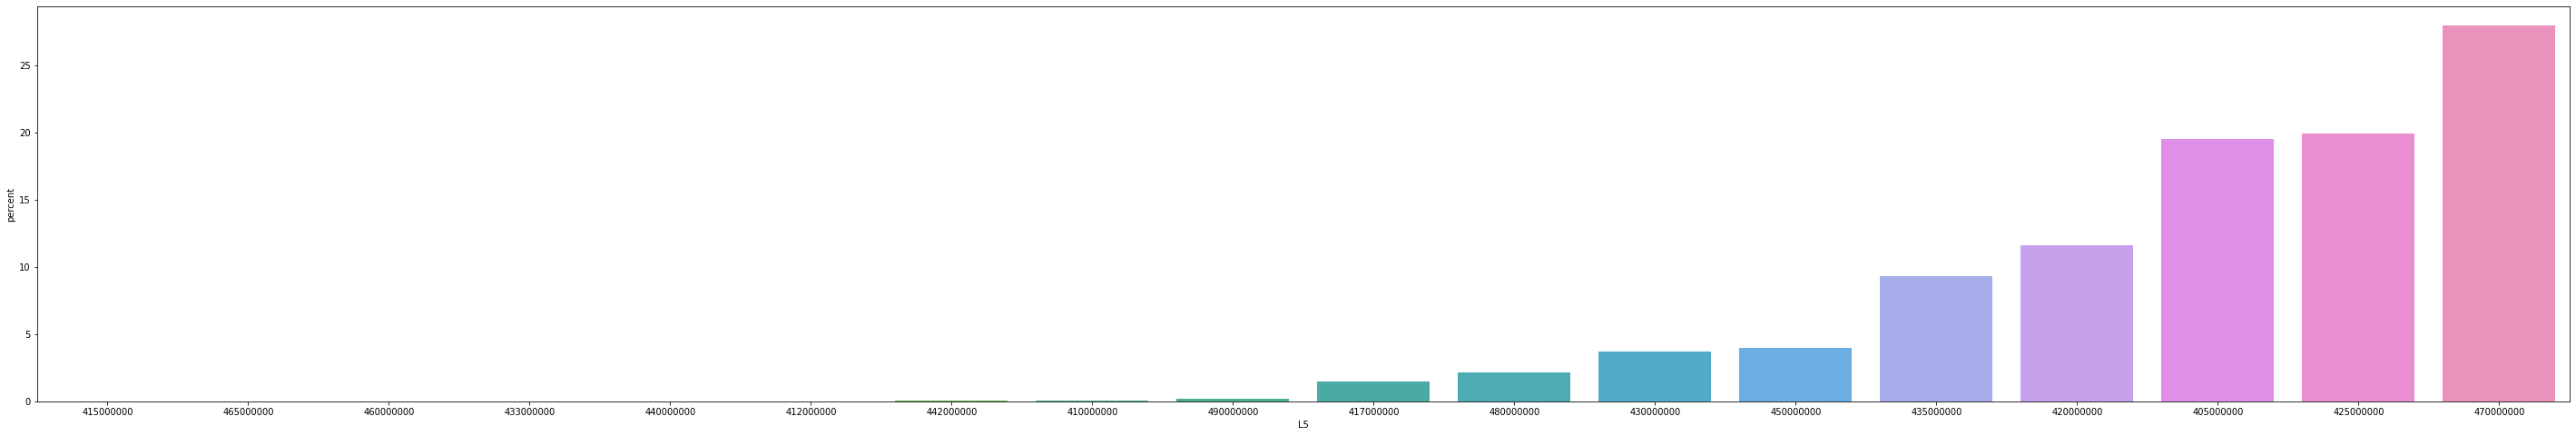

In [111]:
plt.figure(figsize=(50,8))
sns.barplot(x='L5',
            y="percent", data=itemL5,
            order=itemL5.sort_values("percent").L5)

<AxesSubplot:xlabel='L5', ylabel='cumm_percent'>

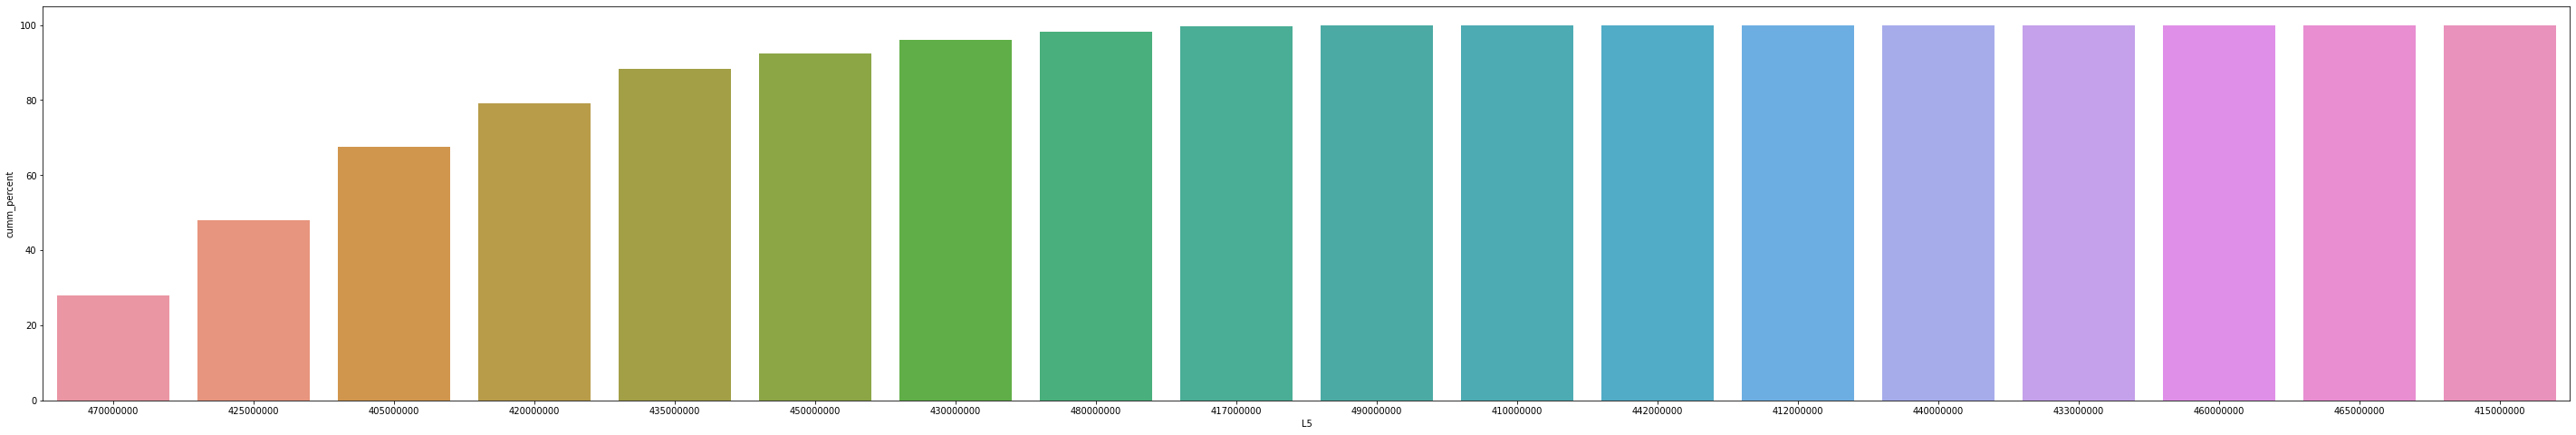

In [112]:
plt.figure(figsize=(50,8))
sns.barplot(x='L5',
            y="cumm_percent", data=itemL5,
            order=itemL5.sort_values("cumm_percent").L5)

In [113]:
count=[]
p=10
c=0
for i in range(len(itemL5)):
  flag=0
  while(flag==0):
    if itemL5.loc[i,"cumm_percent"]<=p:
      c=c+1
      flag=1
    else:
      count.append(c)
      c=0
      p=p+10
      if p==100:
        p=p+1
count.append(c)


In [114]:
count

[0, 0, 1, 0, 1, 0, 1, 1, 1, 13]

In [115]:
sum(count)

18

[0, 0, 1, 0, 1, 0, 1, 1, 1, 13]

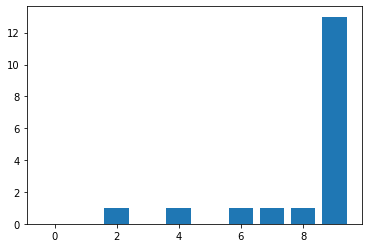

In [116]:
plt.bar(range(10),count)
count

5 of L5 have 90% demand

In [117]:
s_data=df1[["Time.[Week]","Sales Domain.[Sold To]","Sell Out Stat Fcst","year","month","weekof_year"]]

In [118]:
s_data.rename(columns={"Time.[Week]":"date","Sales Domain.[Sold To]":"domain","Sell Out Stat Fcst":"sales"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
s_data

date  domain       sales  year  month  weekof_year
0        2016-07-31      86  361.000000  2016      7           30
1        2016-08-07      86  374.000000  2016      8           31
2        2016-08-14      86  355.000000  2016      8           32
3        2016-08-21      86  402.000000  2016      8           33
4        2016-08-28      86  359.000000  2016      8           34
...             ...     ...         ...   ...    ...          ...
10870513 2021-08-29   39401    6.593679  2021      8           34
10870514 2021-09-05   39401   10.705253  2021      9           35
10870515 2021-09-12   39401    5.759580  2021      9           36
10870516 2021-09-19   39401   10.616524  2021      9           37
10870517 2021-09-26   39401    5.839518  2021      9           38

[10870518 rows x 6 columns]

In [120]:
s_data.dtypes

date           datetime64[ns]
domain                  int64
sales                 float64
year                    int64
month                   int64
weekof_year             int64
dtype: object

In [121]:
domain2=s_data.domain.unique()

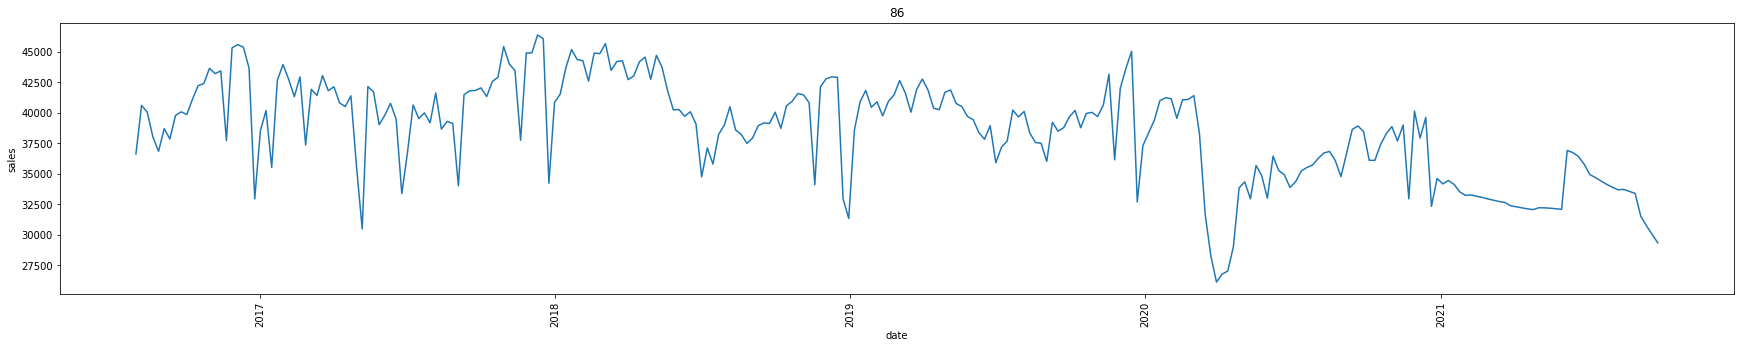

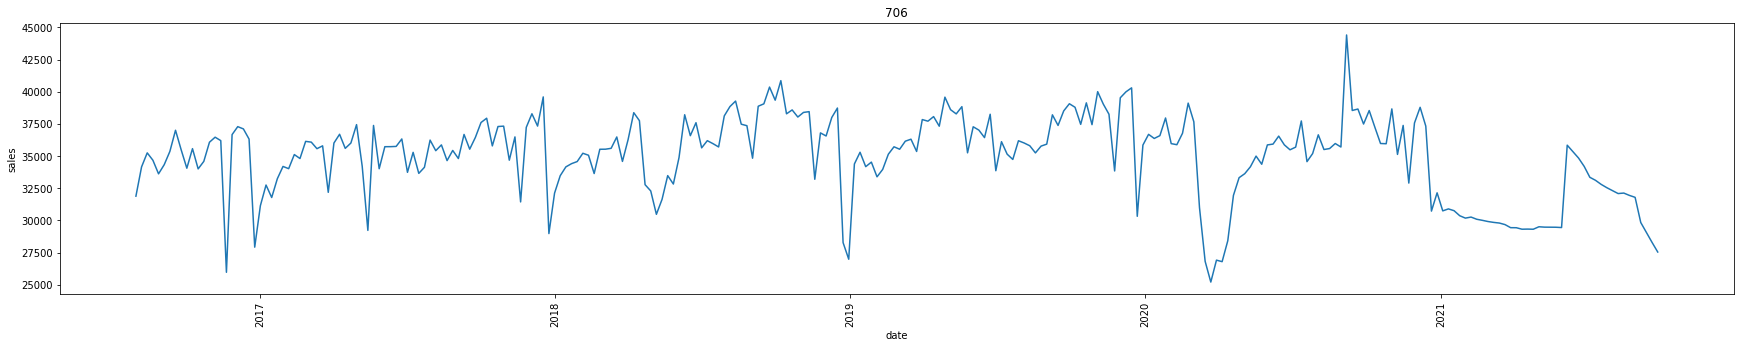

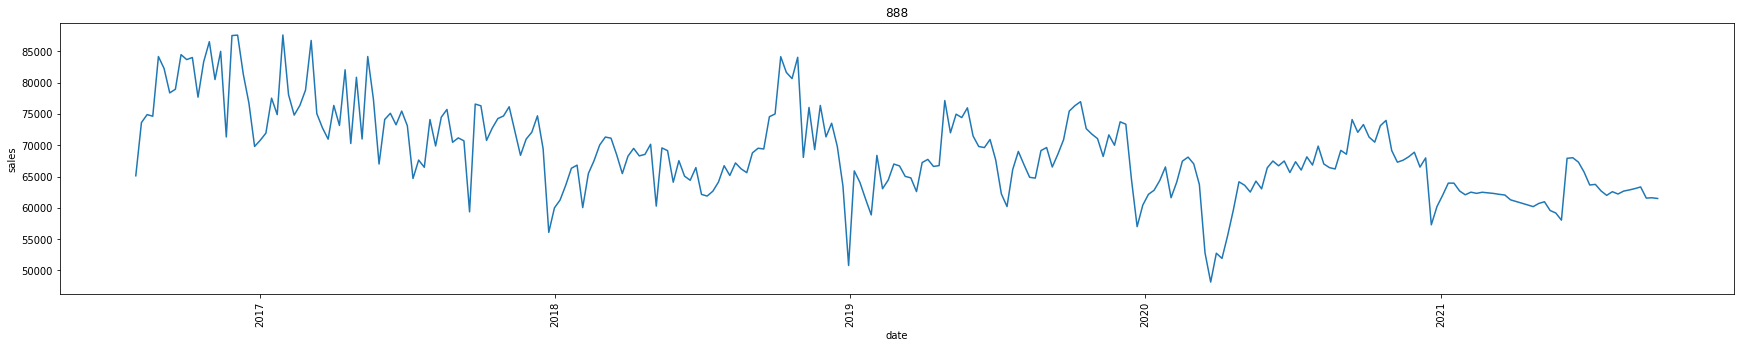

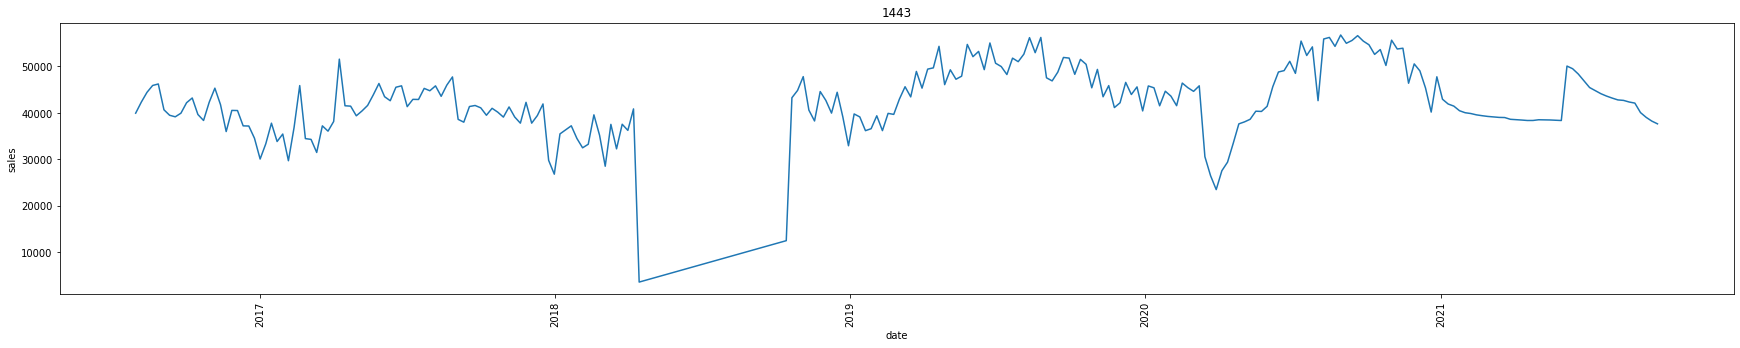

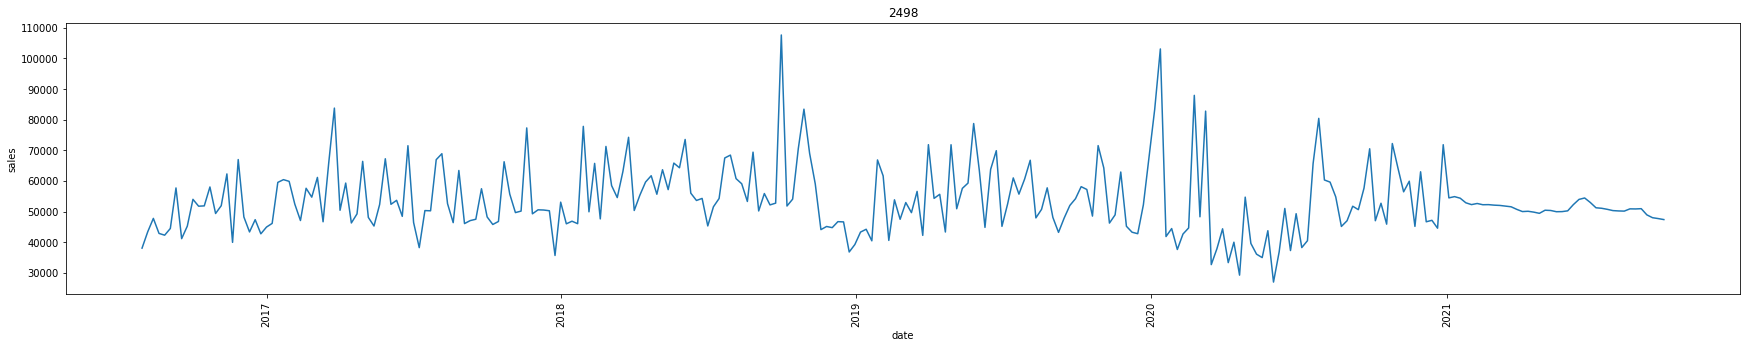

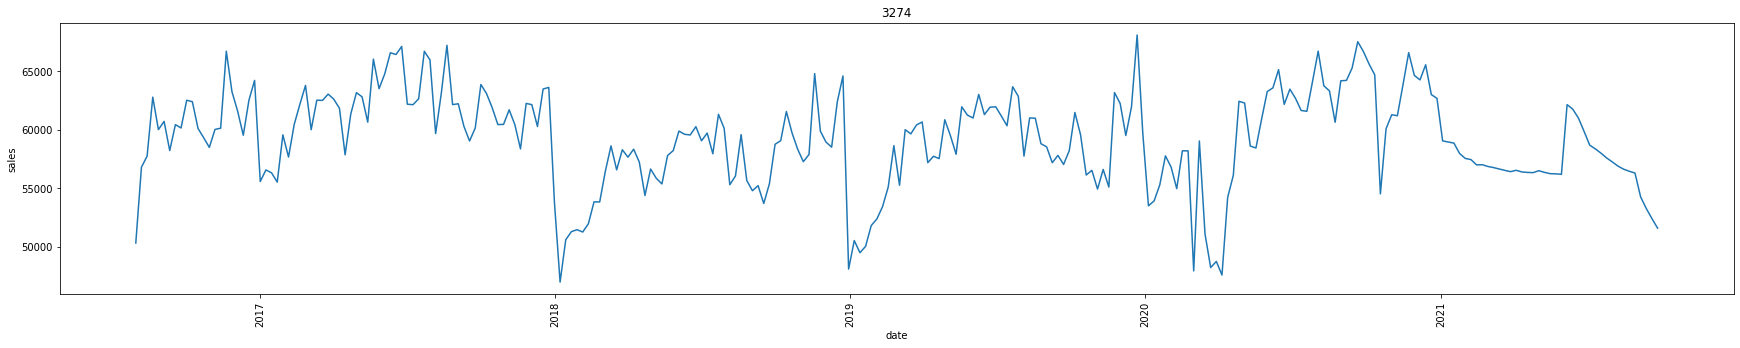

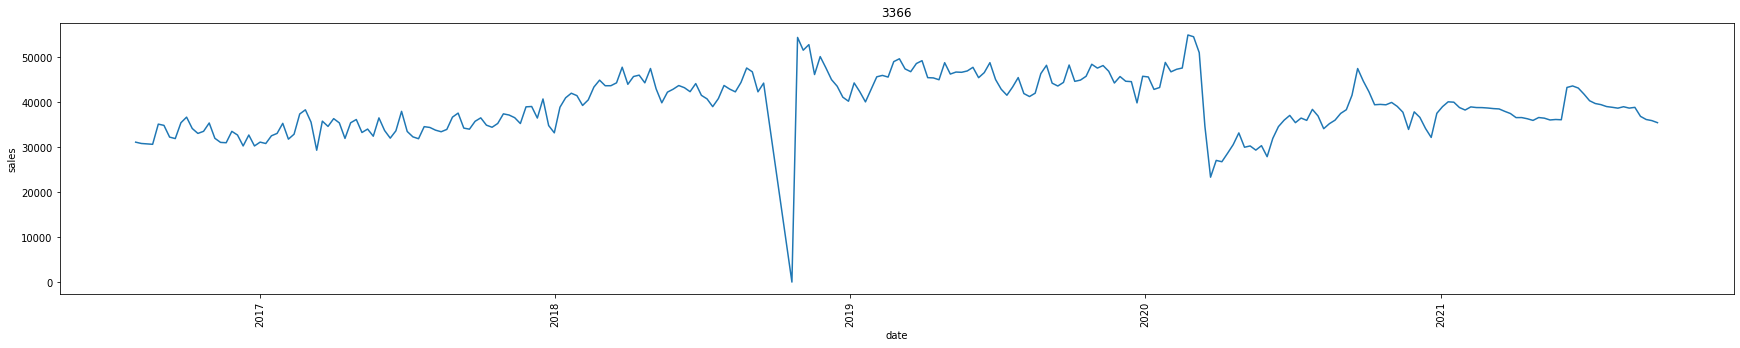

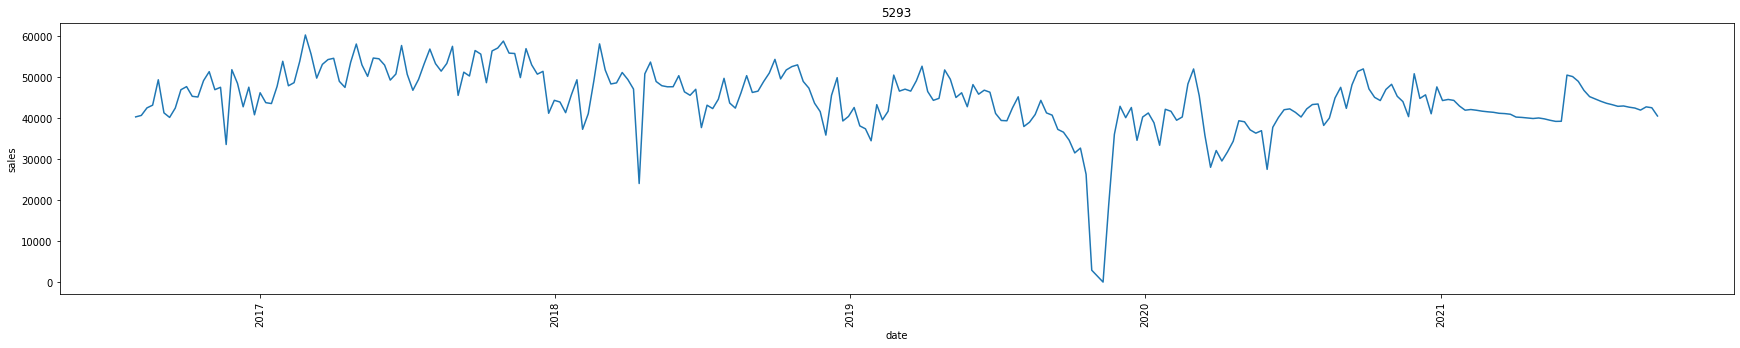

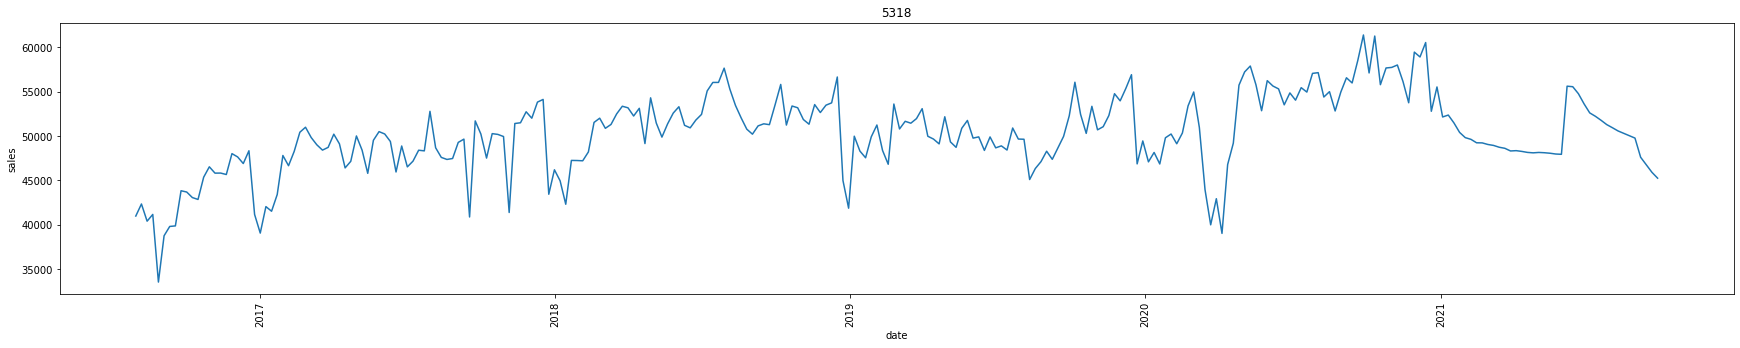

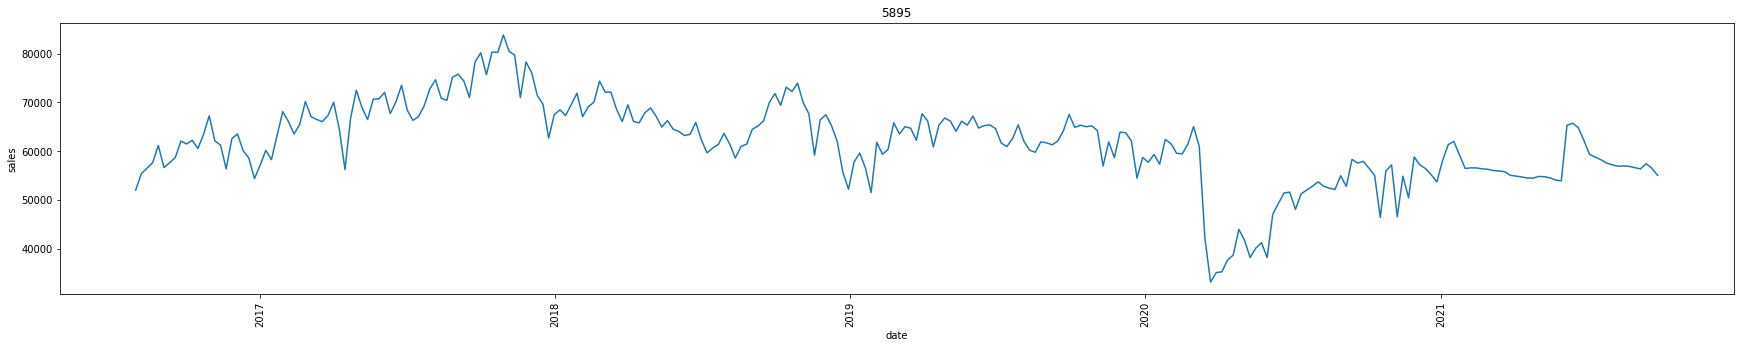

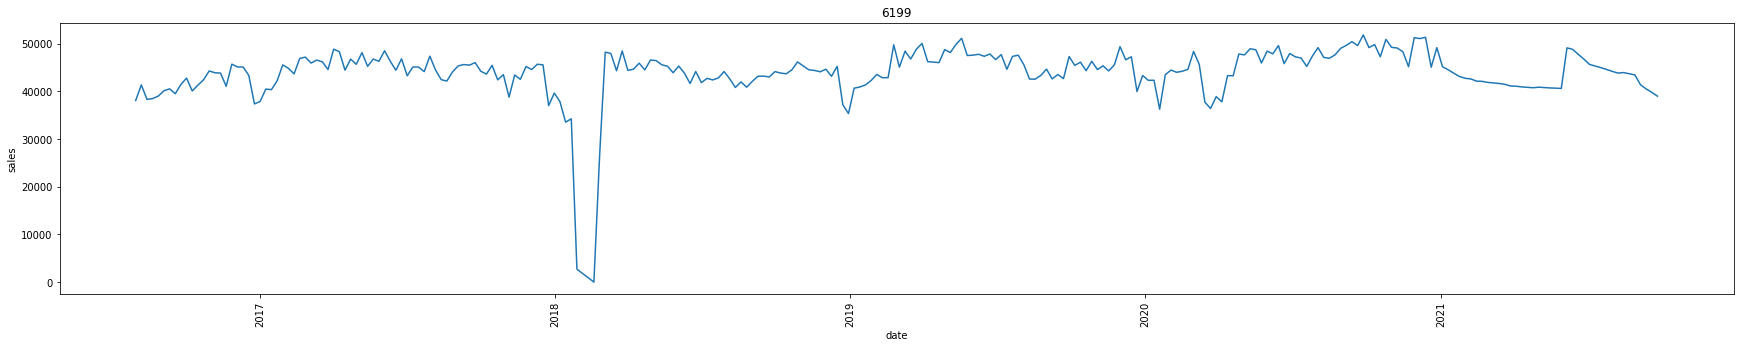

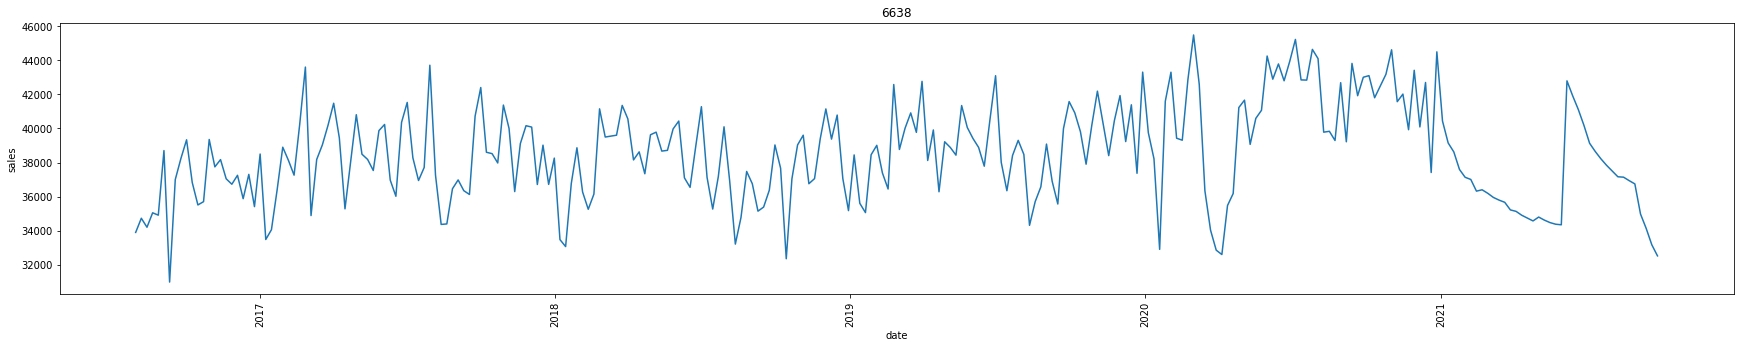

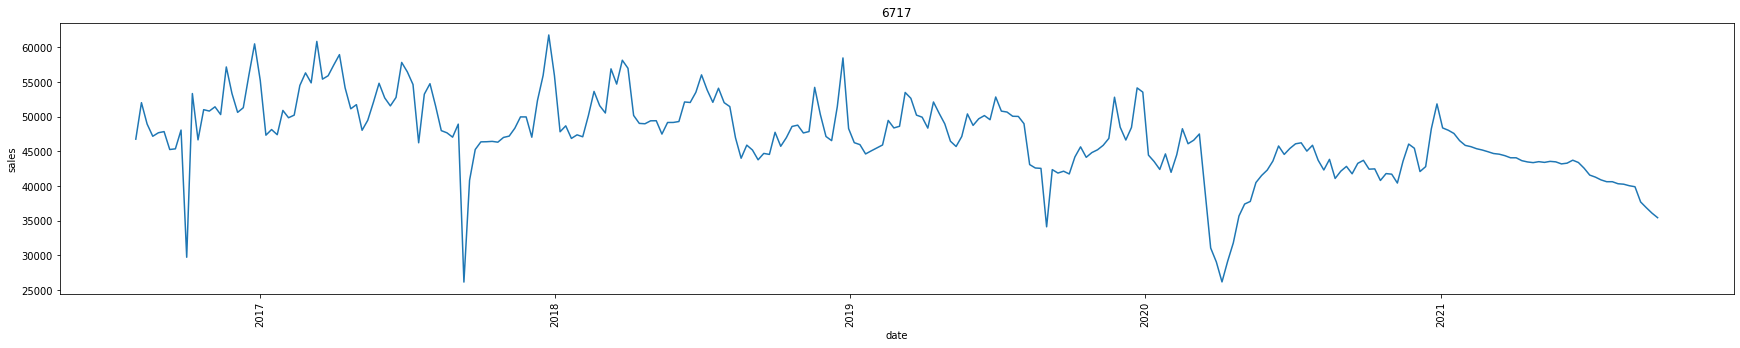

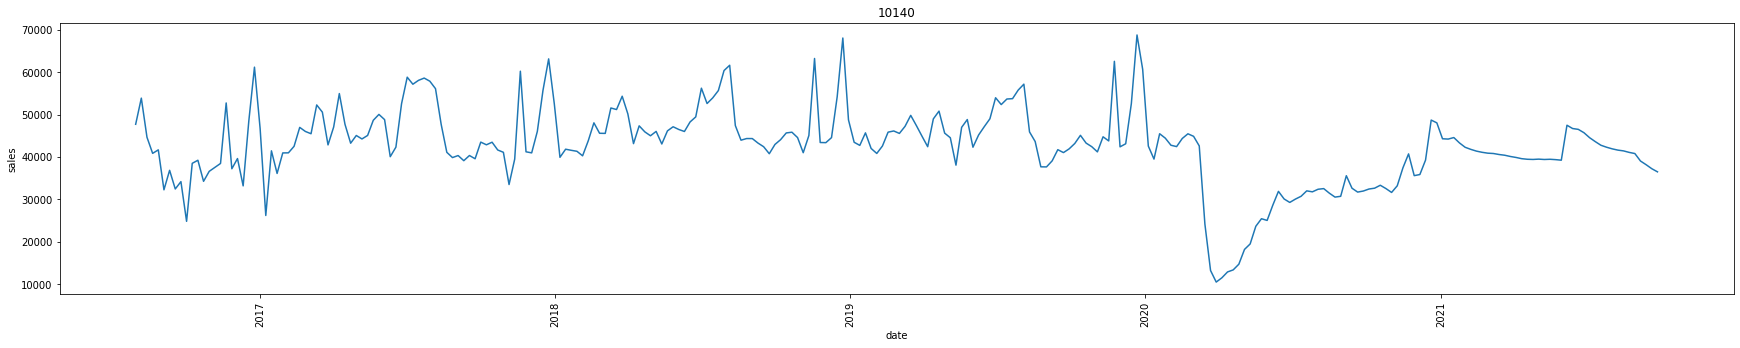

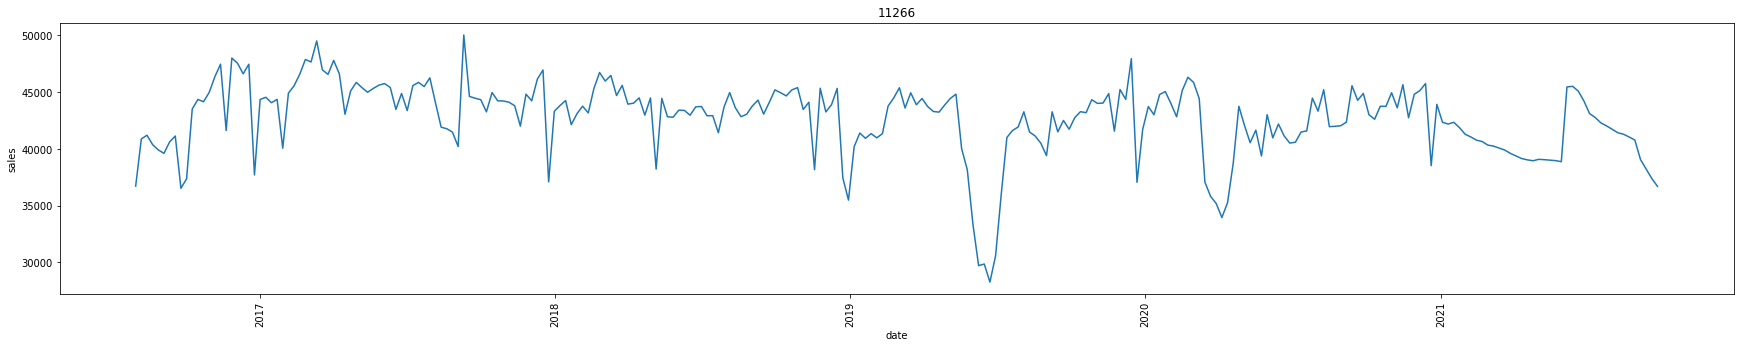

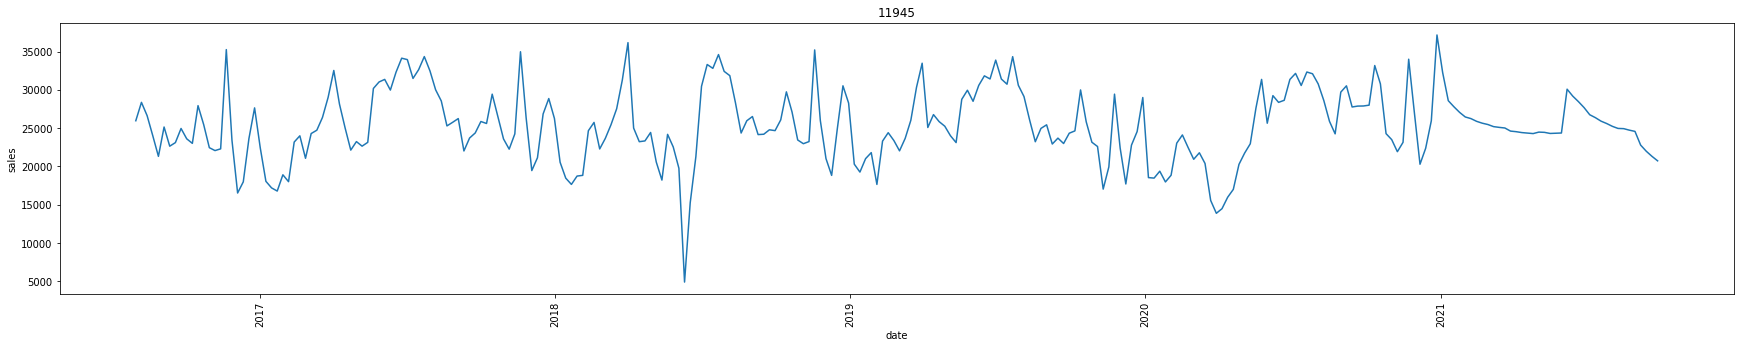

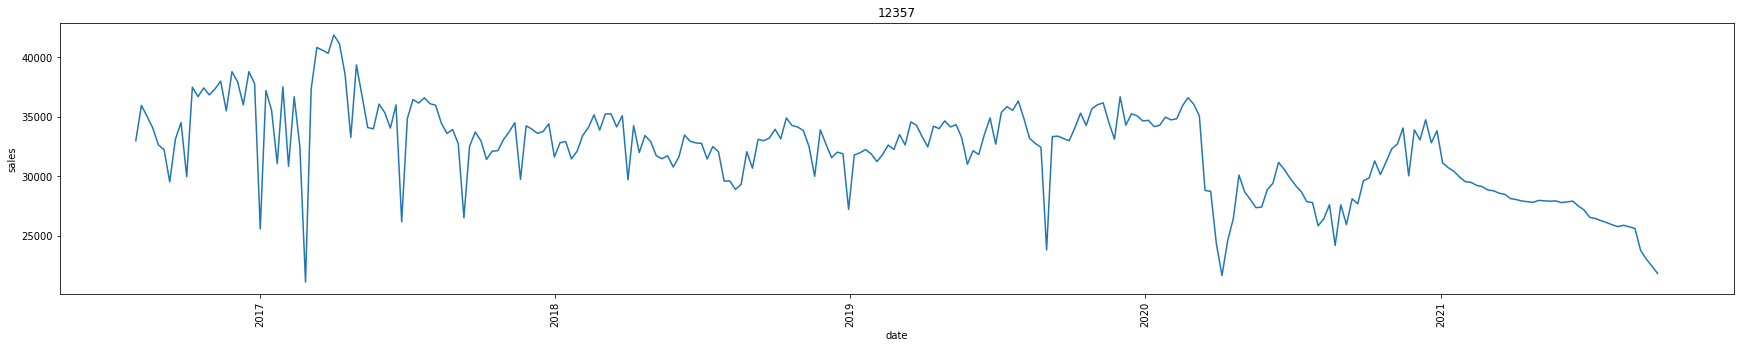

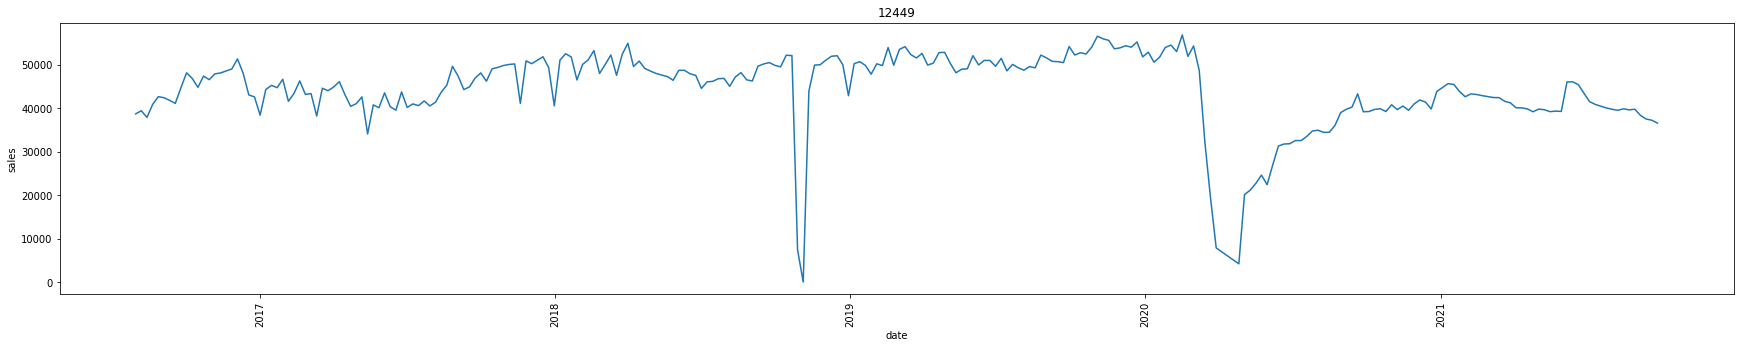

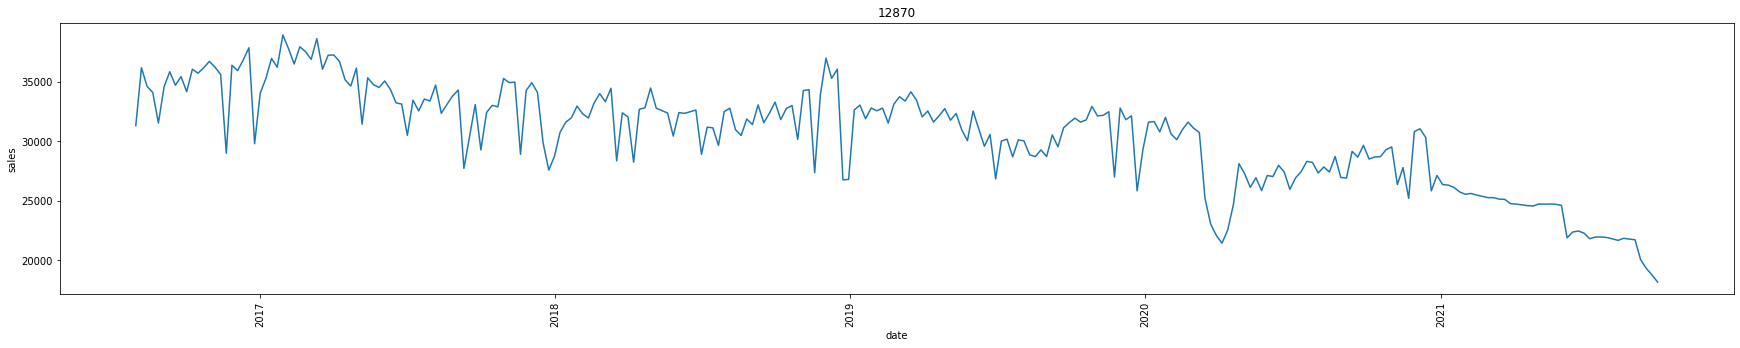

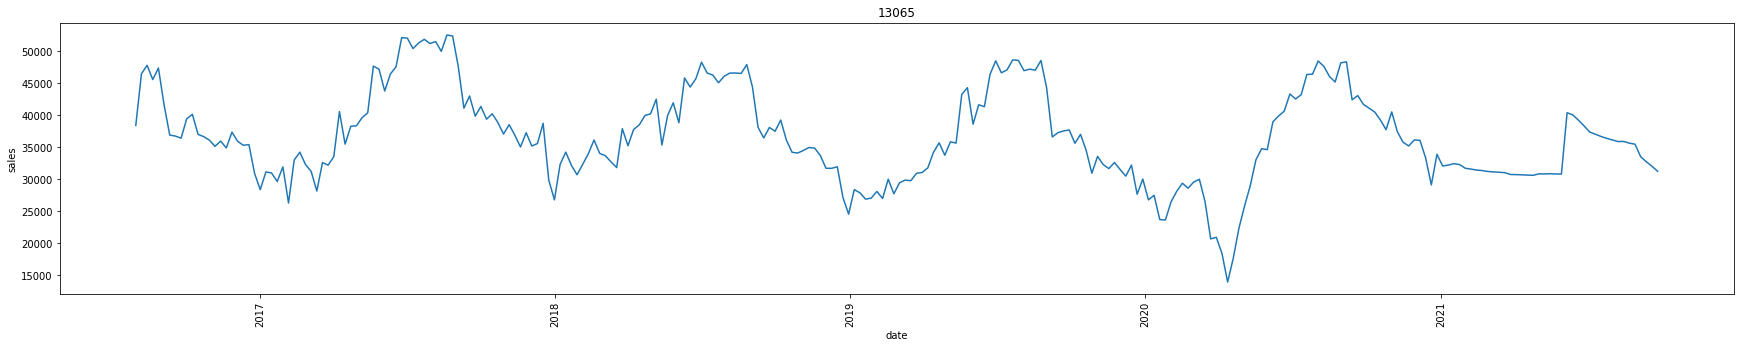

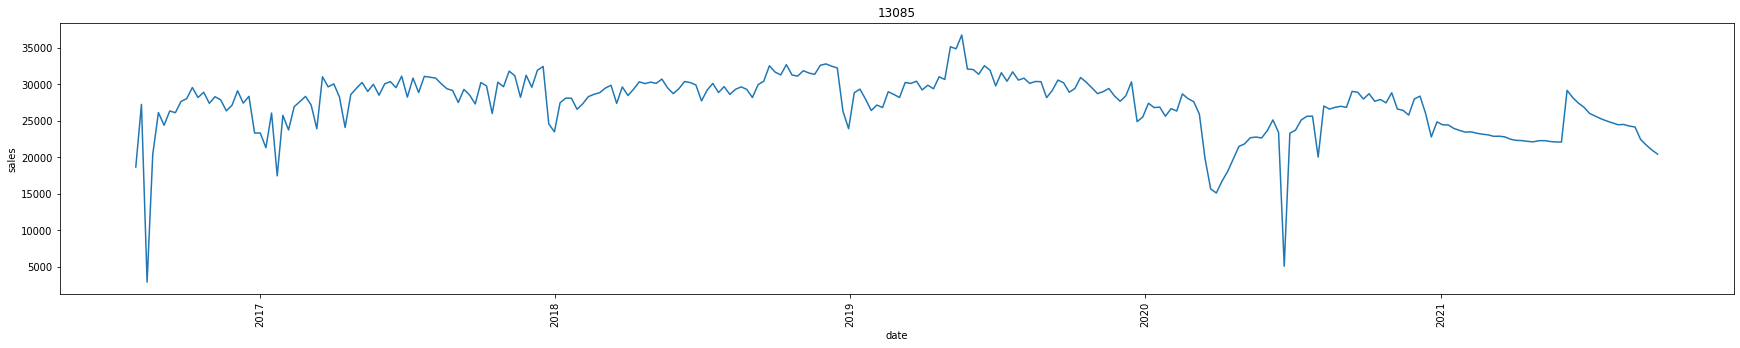

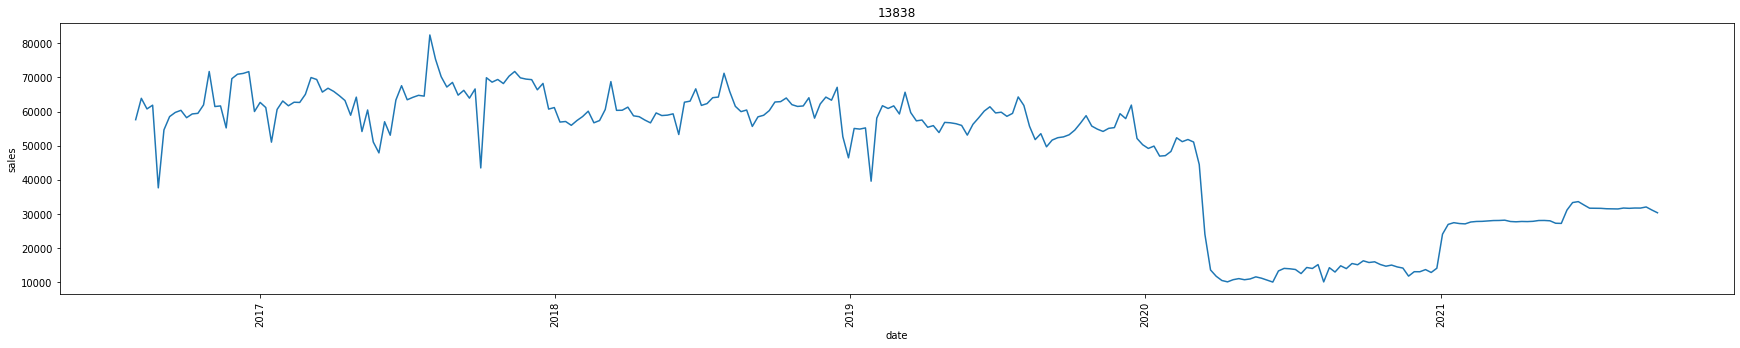

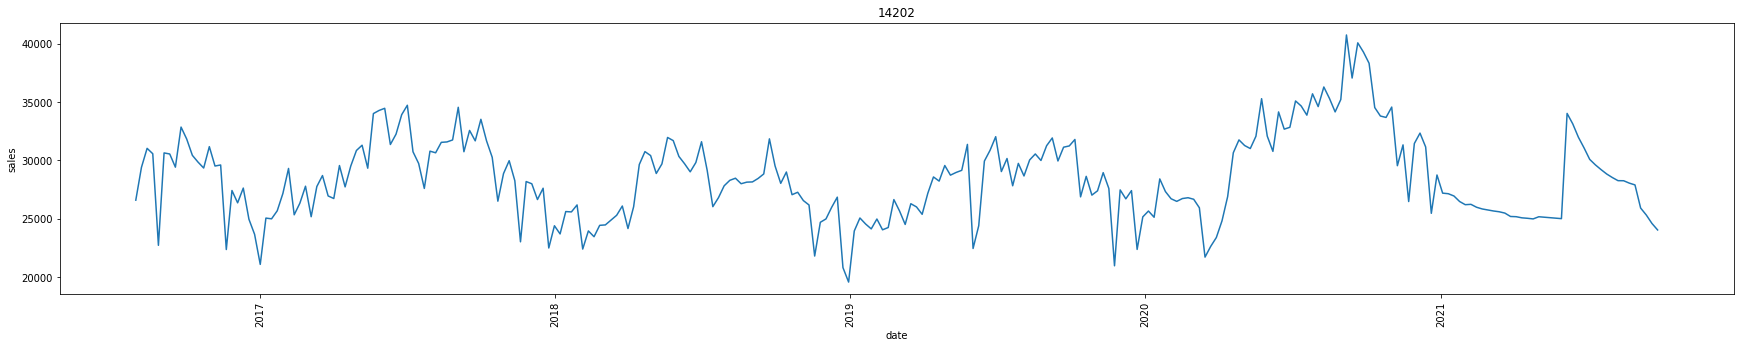

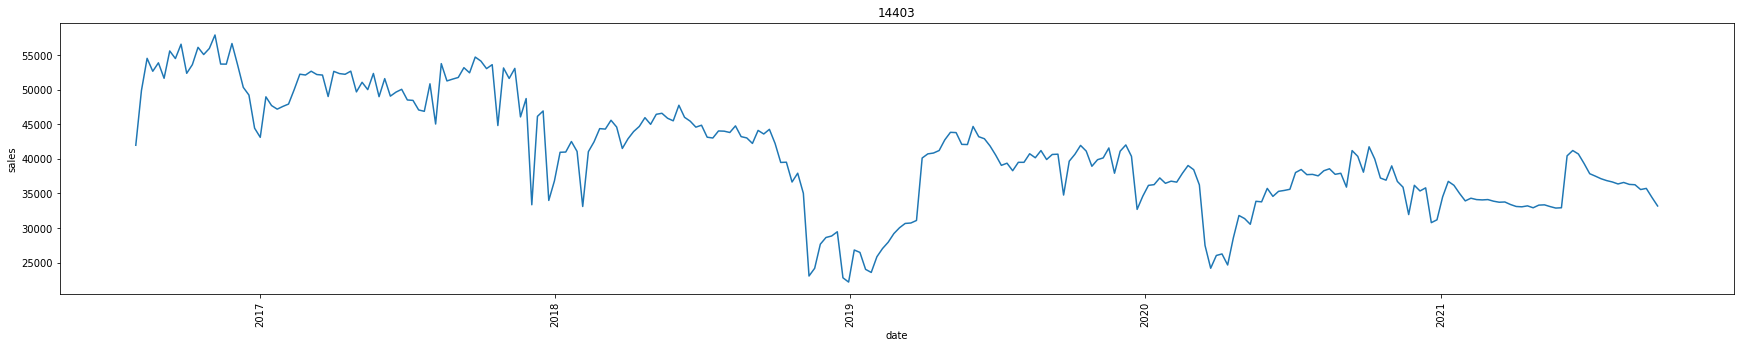

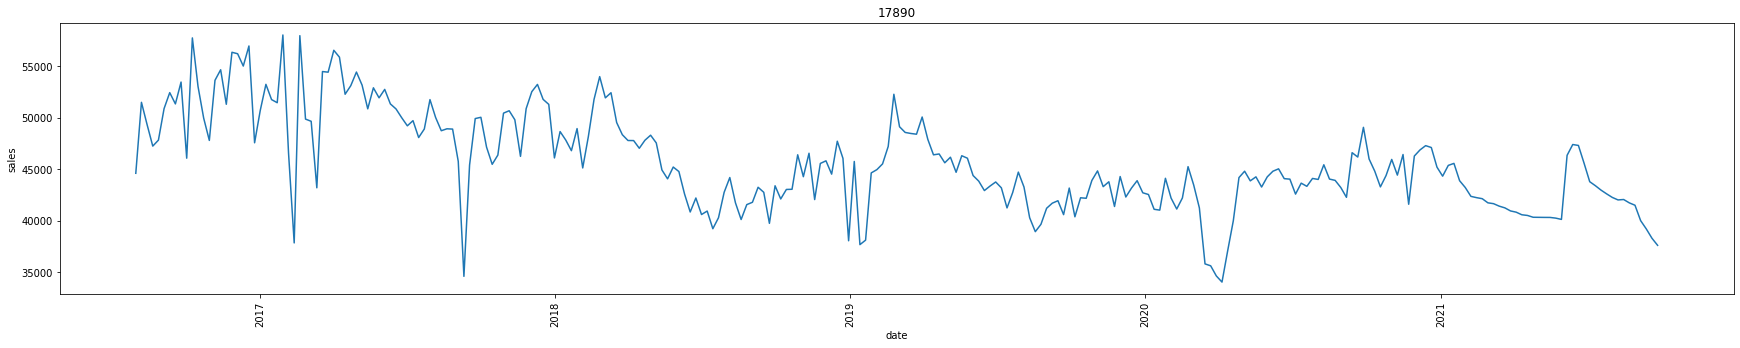

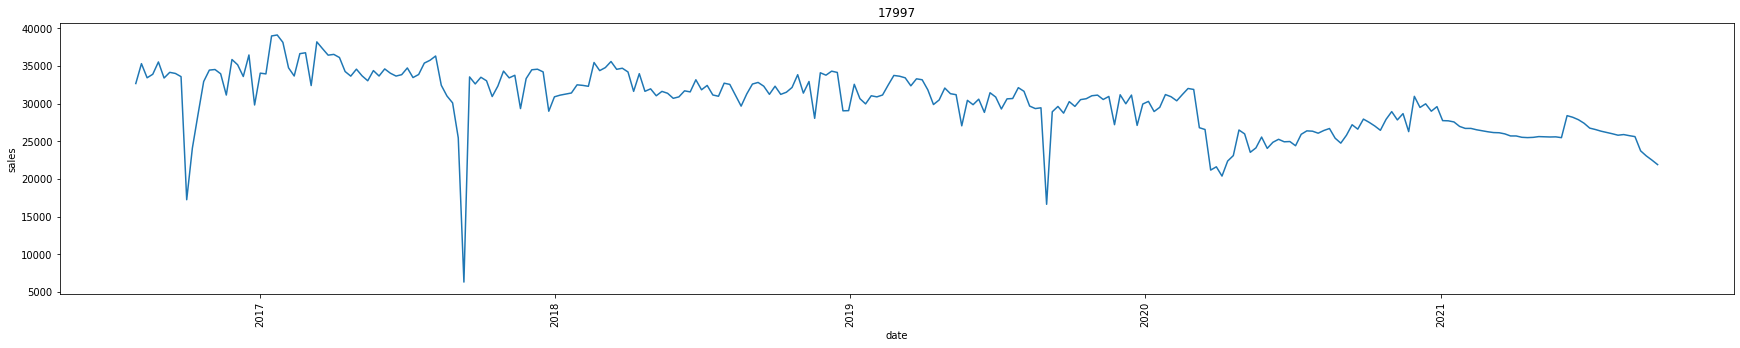

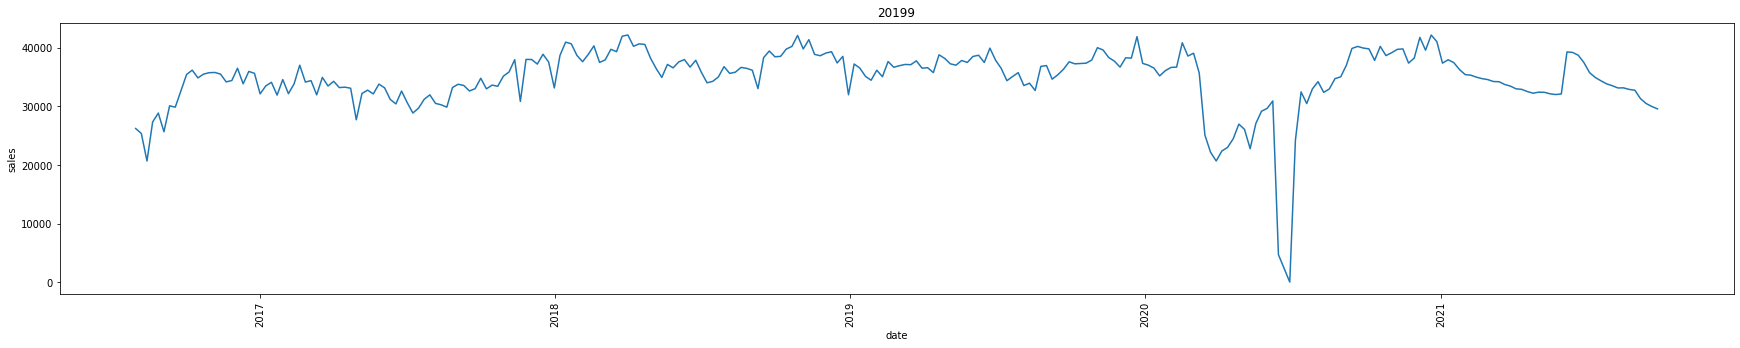

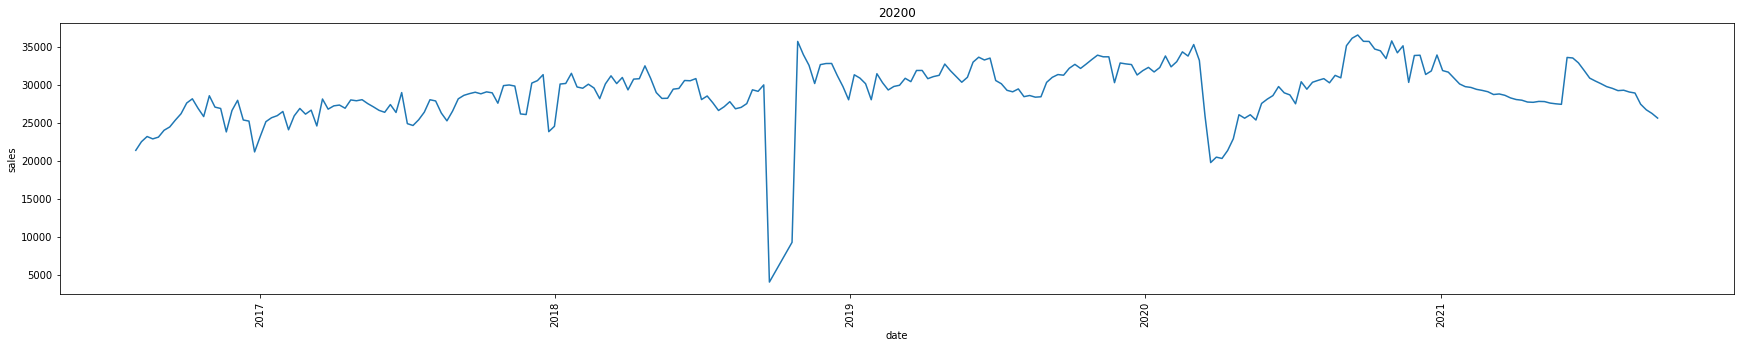

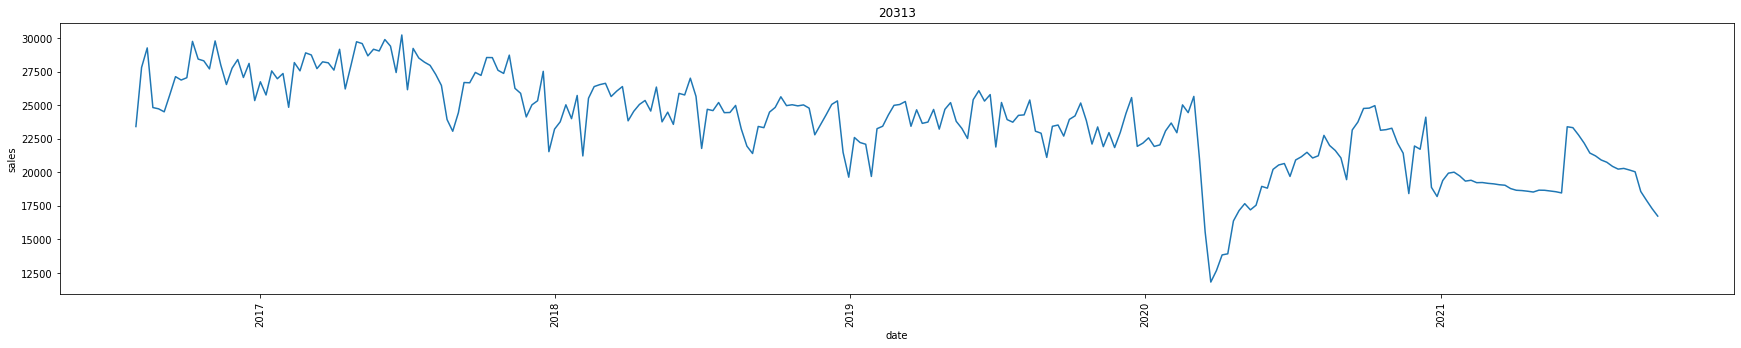

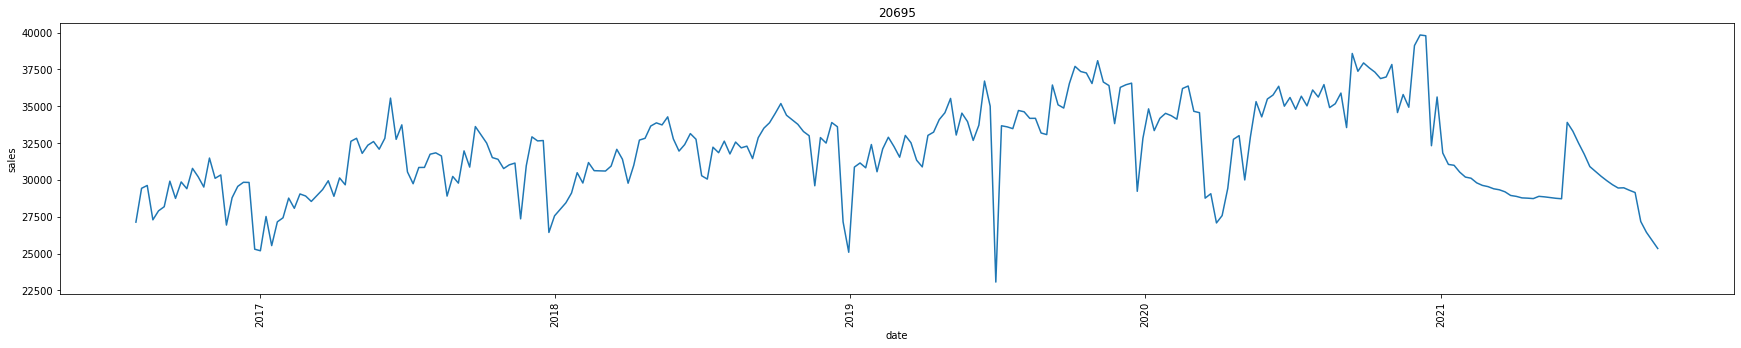

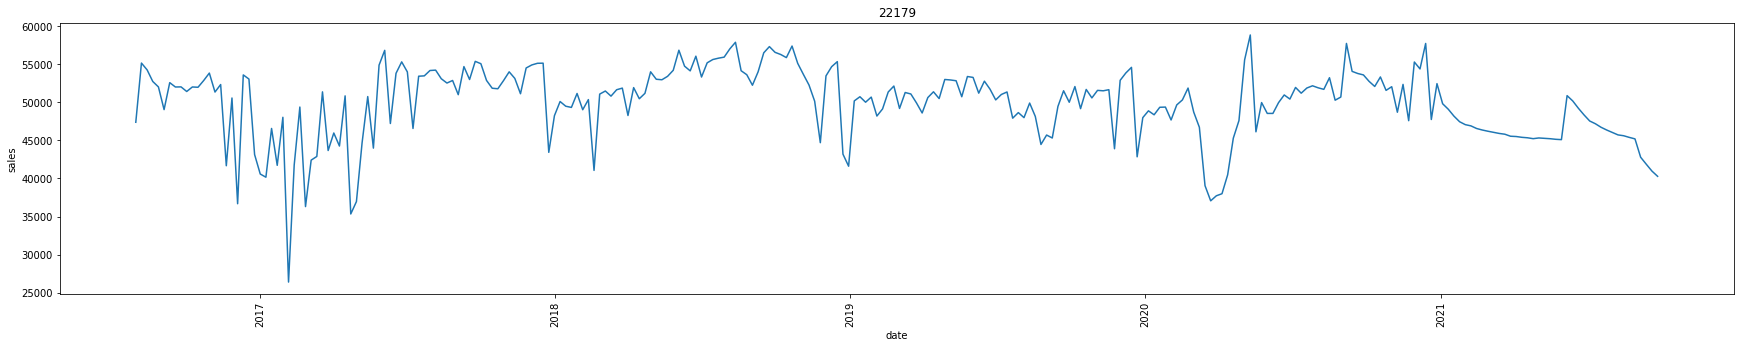

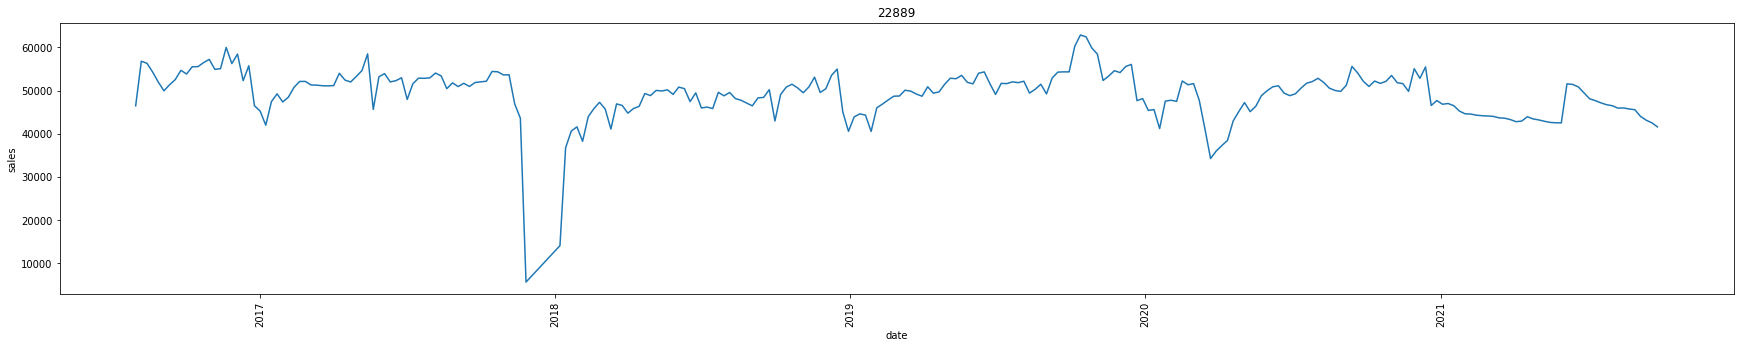

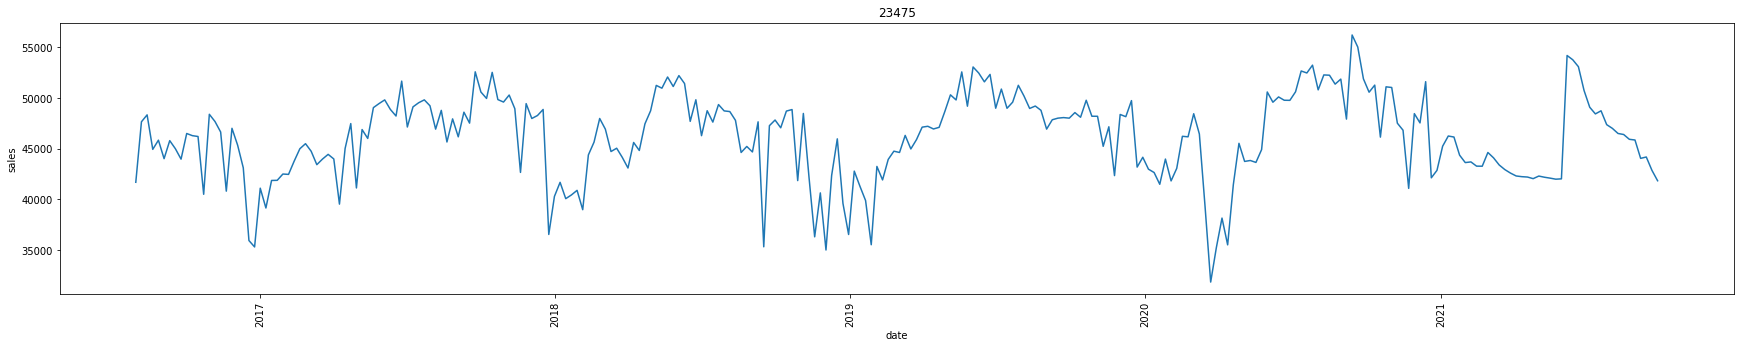

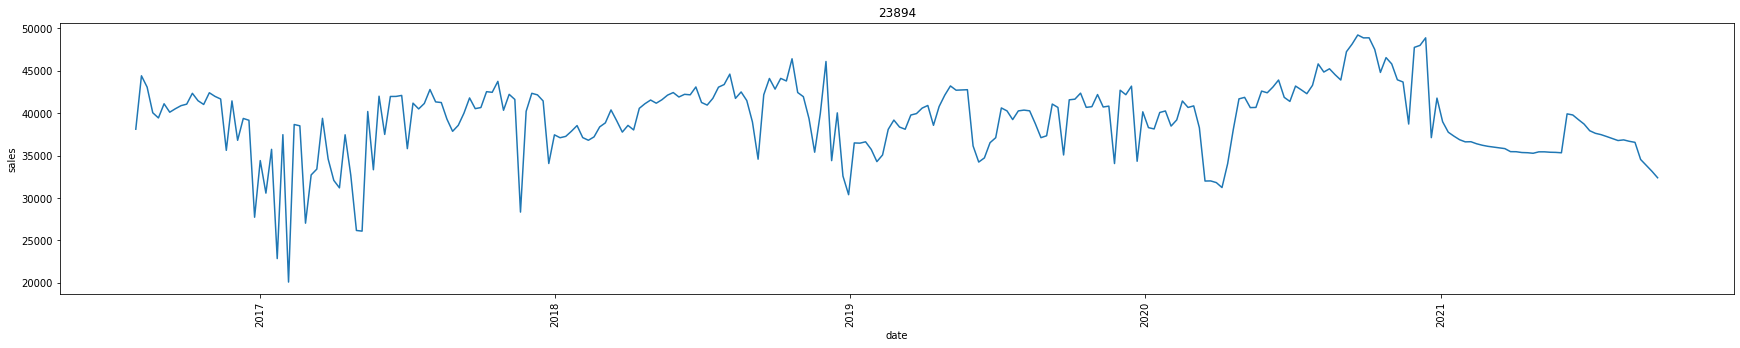

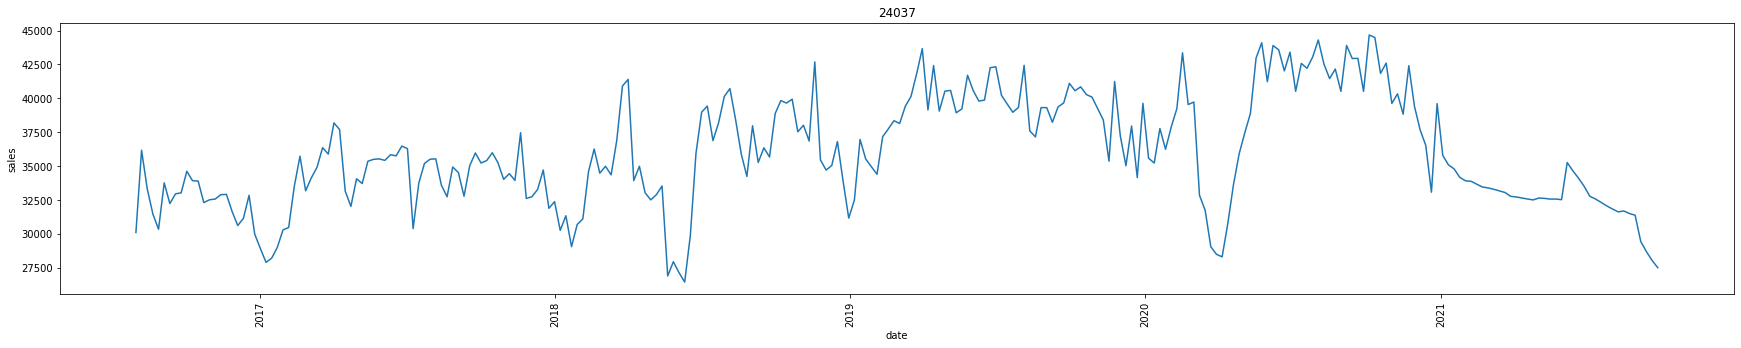

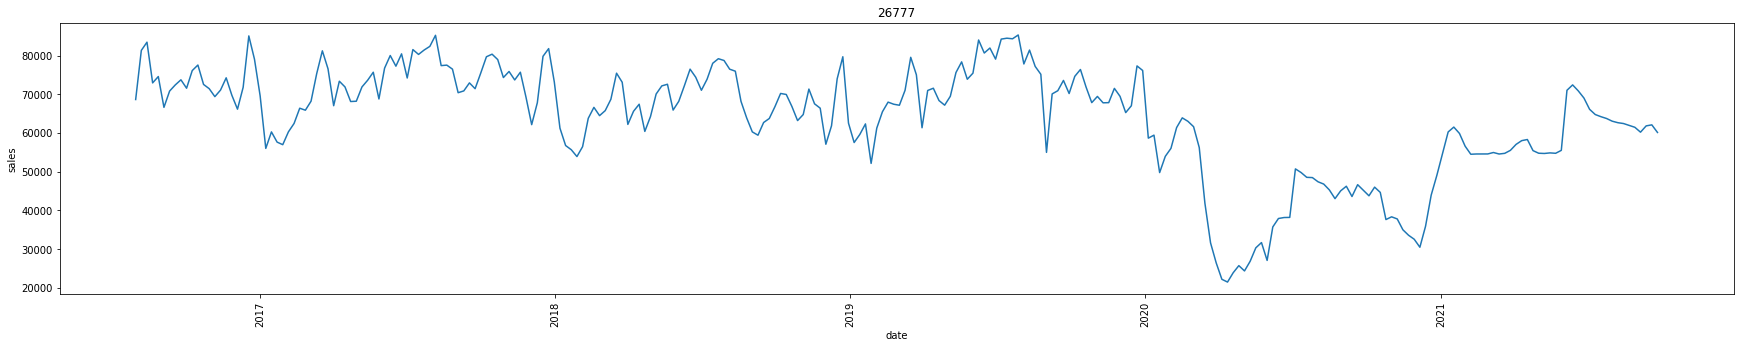

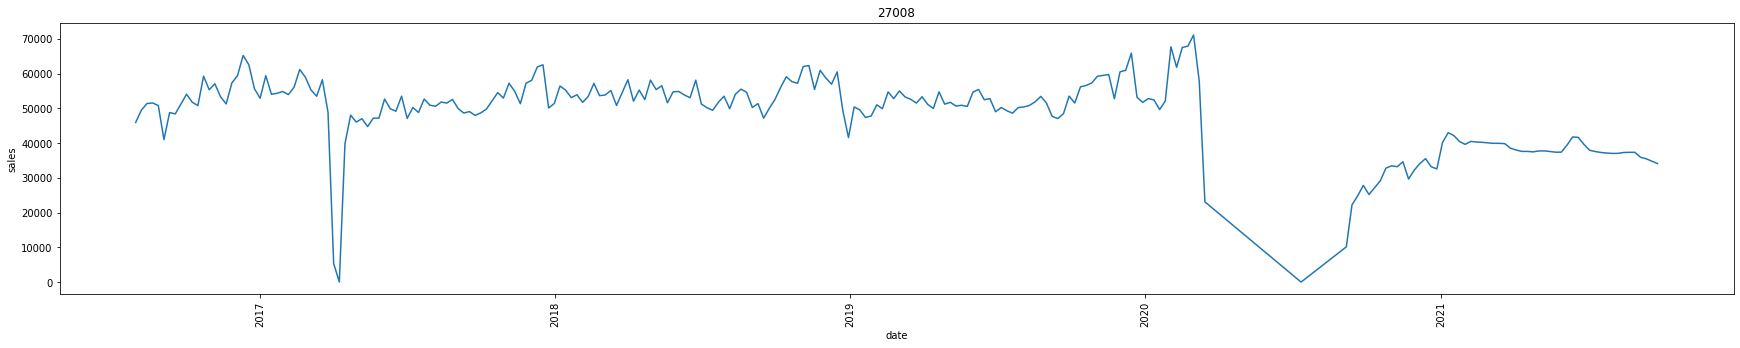

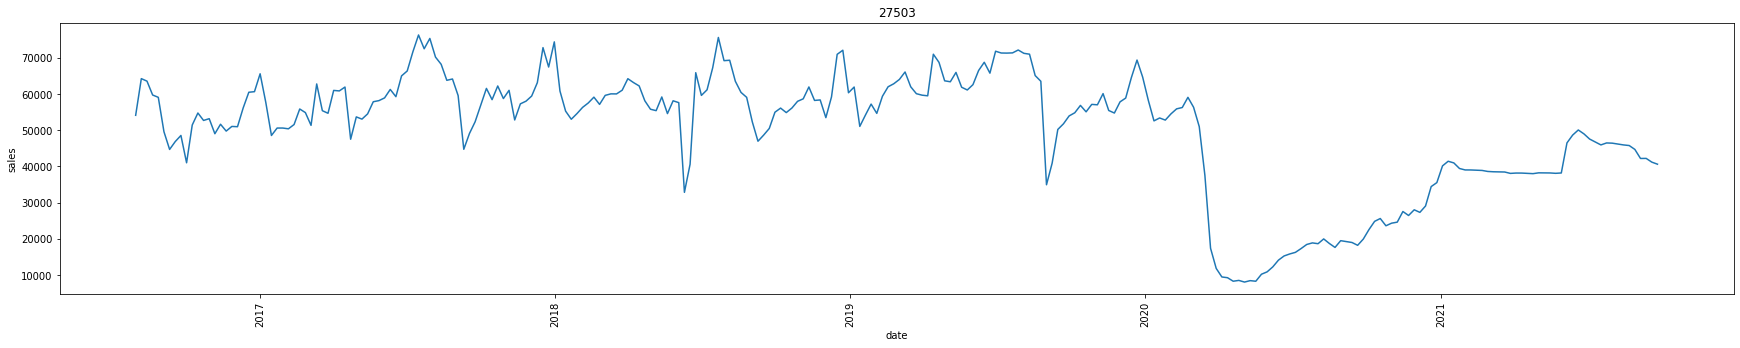

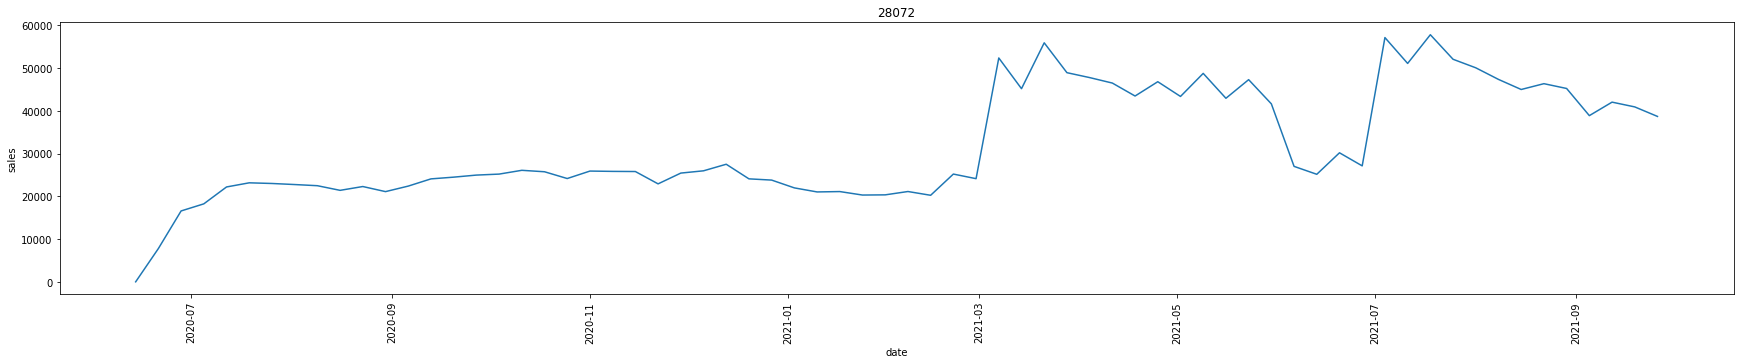

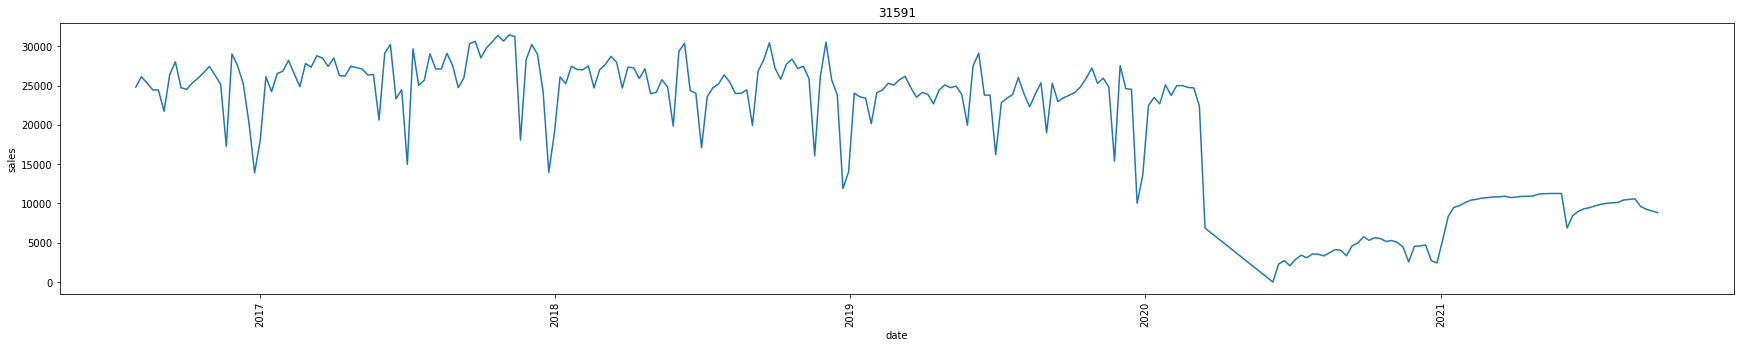

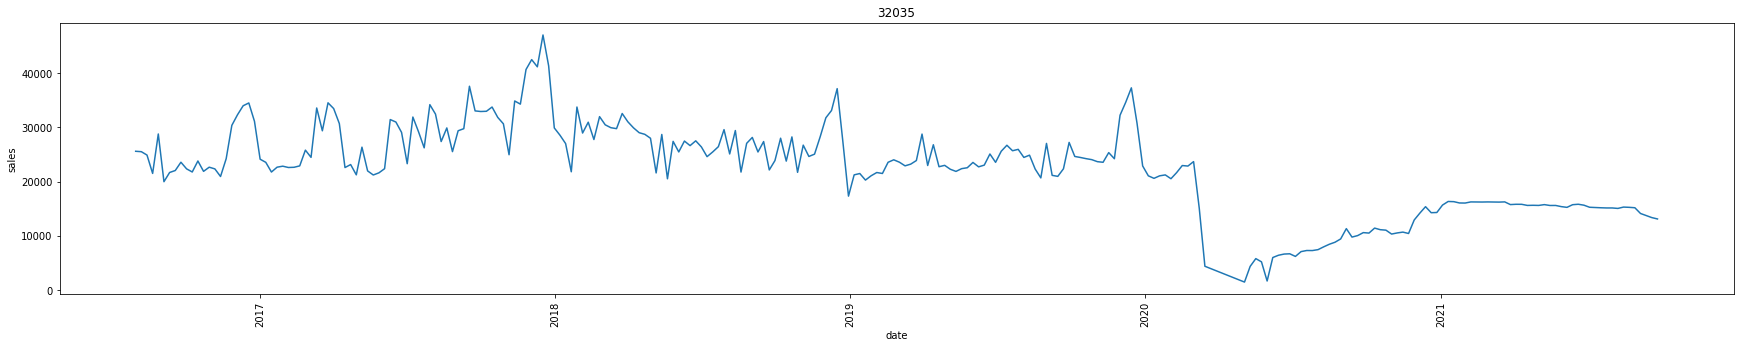

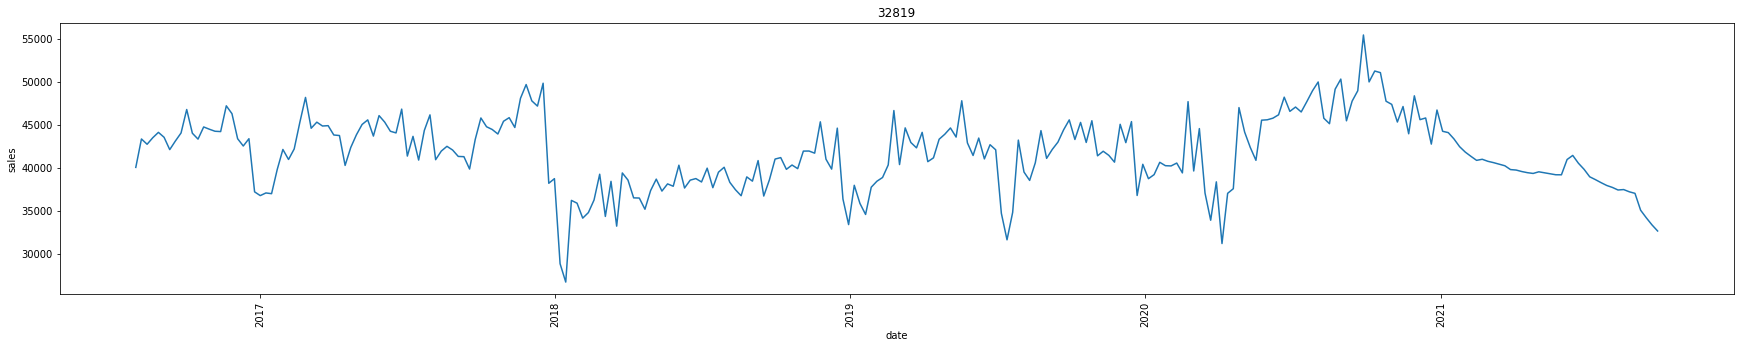

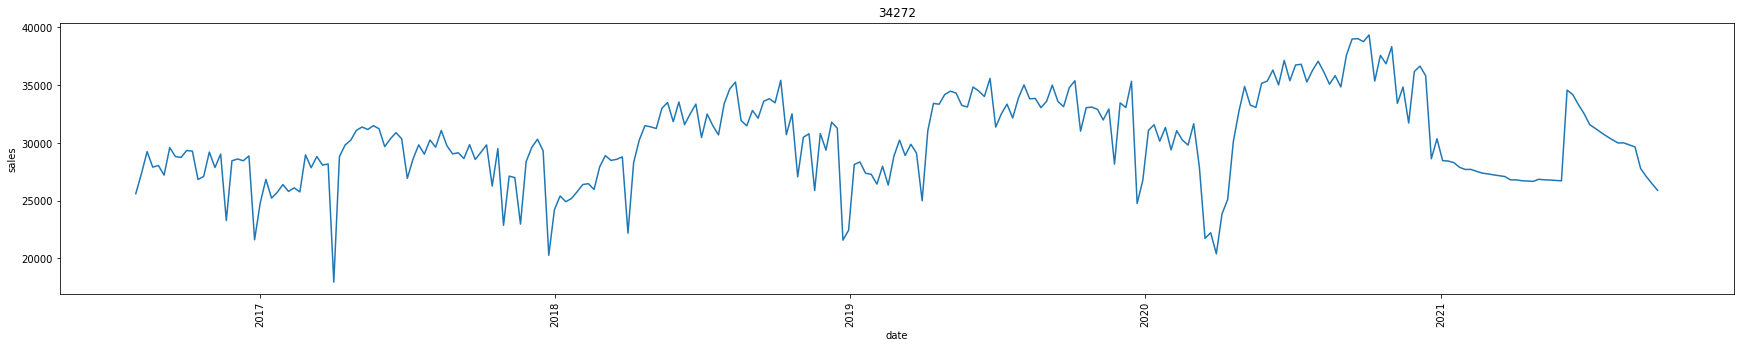

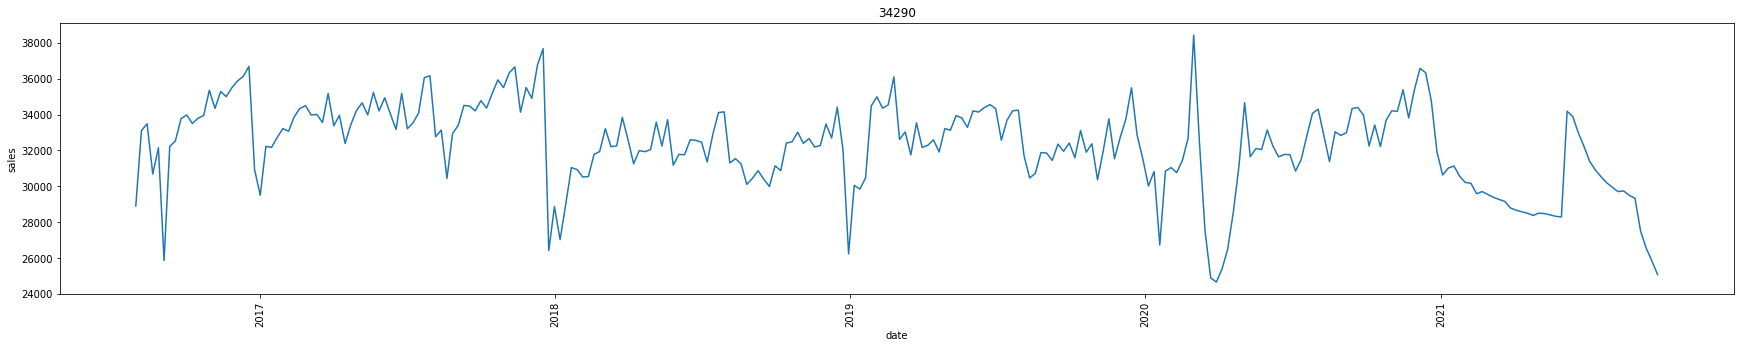

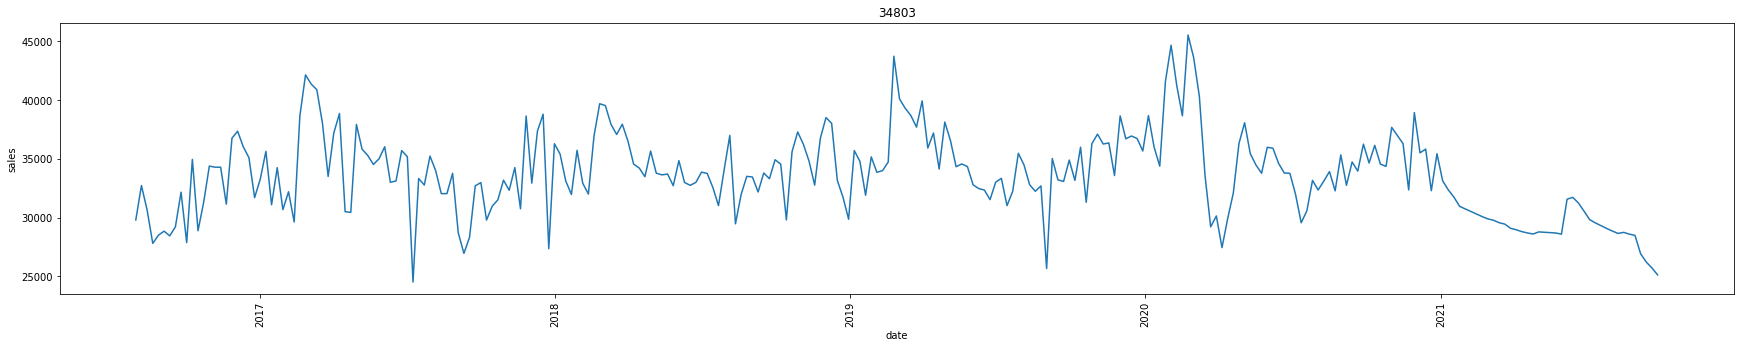

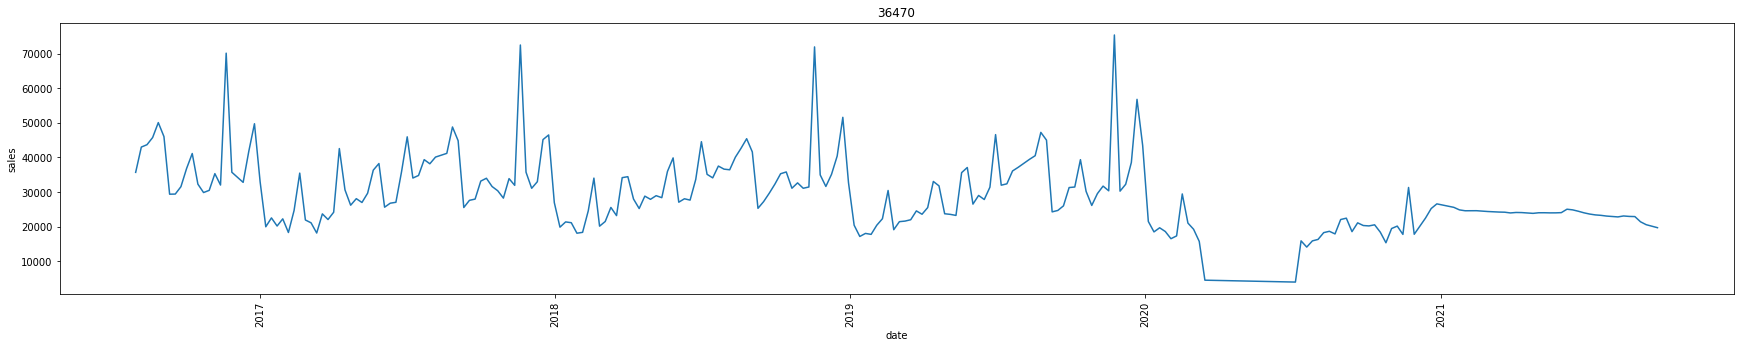

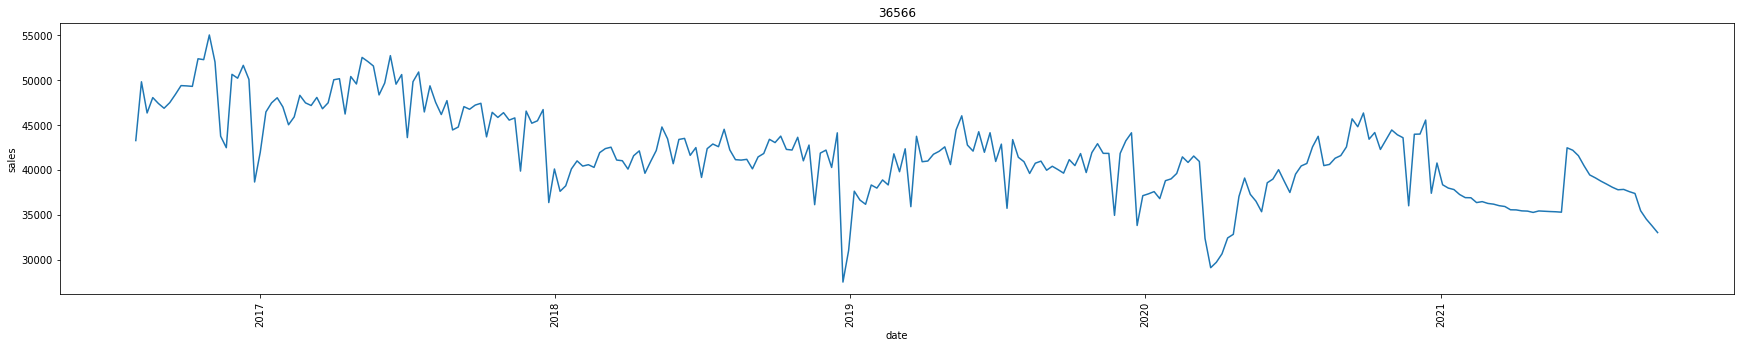

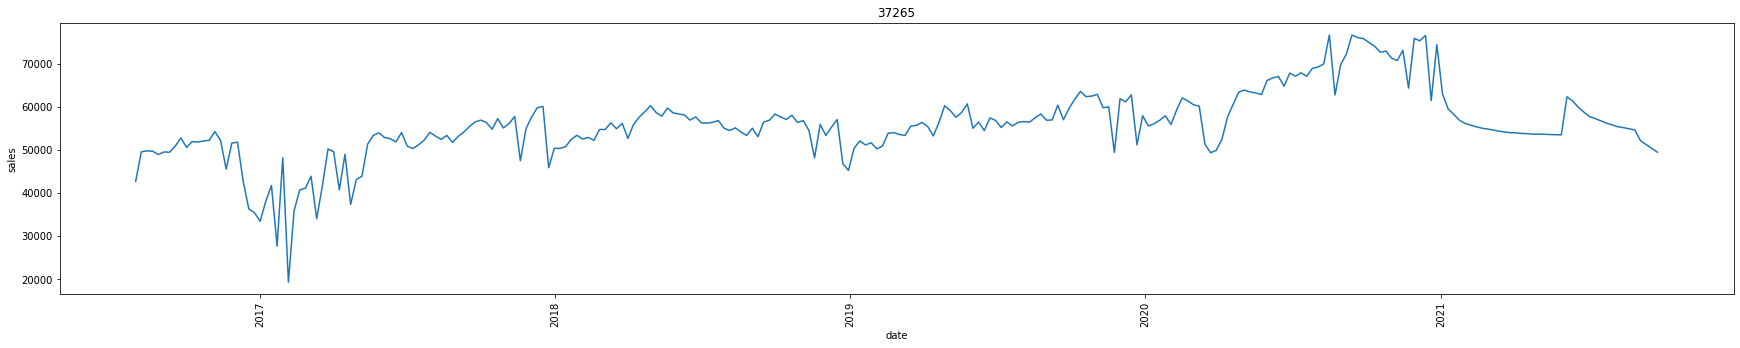

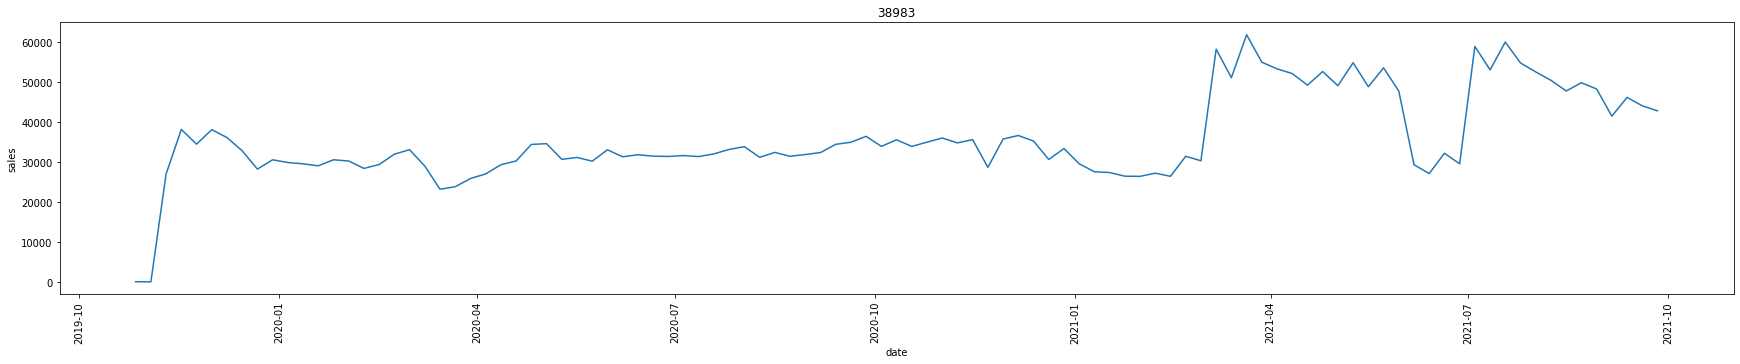

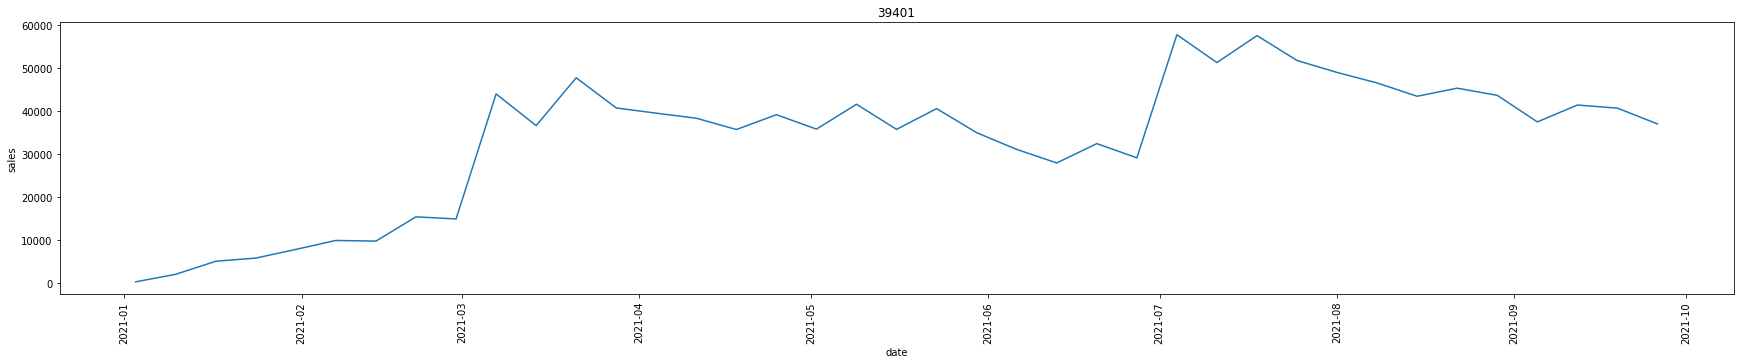

In [122]:
for i in domain2:
  d=s_data[s_data["domain"]==i]

  
  plt.figure(figsize=(30,5))
  sns.lineplot(data = d,
                                x = 'date', y = 'sales',estimator=sum
                                ,ci=None
                                ).set_title(i)
  
  plt.xticks(rotation=90)
  print("\n")
  plt.show()

A downward trend from march 2020 is observed due to covid. Hence the covid data in external driver may be important


In [123]:
i_data=df1[["Time.[Week]",'Item.[Planning Item]','Item.[L5]', 'Item.[L2]',
       'Item.[L1$DisplayName]', 'Item.[L3]',"Sell Out Stat Fcst"]]

In [124]:
i_data

Time.[Week]  Item.[Planning Item]  Item.[L5]  Item.[L2]  \
0         2016-07-31             400000000  405000000  205050500   
1         2016-08-07             400000000  405000000  205050500   
2         2016-08-14             400000000  405000000  205050500   
3         2016-08-21             400000000  405000000  205050500   
4         2016-08-28             400000000  405000000  205050500   
...              ...                   ...        ...        ...   
10870513  2021-08-29             400005977  425000000  225056500   
10870514  2021-09-05             400005977  425000000  225056500   
10870515  2021-09-12             400005977  425000000  225056500   
10870516  2021-09-19             400005977  425000000  225056500   
10870517  2021-09-26             400005977  425000000  225056500   

          Item.[L1$DisplayName]  Item.[L3]  Sell Out Stat Fcst  
0                     105050505  305050000          361.000000  
1                     105050505  305050000          374.000000  
2                     105050505  305050000          355.000000  
3                     105050505  305050000          402.000000  
4                     105050505  305050000          359.000000  
...                         ...        ...                 ...  
10870513              125052010  325050000            6.593679  
10870514              125052010  325050000           10.705253  
10870515              125052010  325050000            5.759580  
10870516              125052010  325050000           10.616524  
10870517              125052010  325050000            5.839518  

[10870518 rows x 7 columns]

In [125]:
i_data.rename(columns={"Item.[L5]":"L5","Item.[L2]":"L2","Item.[L1$DisplayName]":"L1",'Item.[L3]':"L3","Item.[Planning Item]":"item","Time.[Week]":"date","Sell Out Stat Fcst": "sales"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
L5_data=i_data.L5.unique()

In [127]:
L5_data

array([405000000, 410000000, 412000000, 415000000, 417000000, 420000000,
       425000000, 430000000, 433000000, 435000000, 440000000, 442000000,
       450000000, 460000000, 465000000, 470000000, 480000000, 490000000])

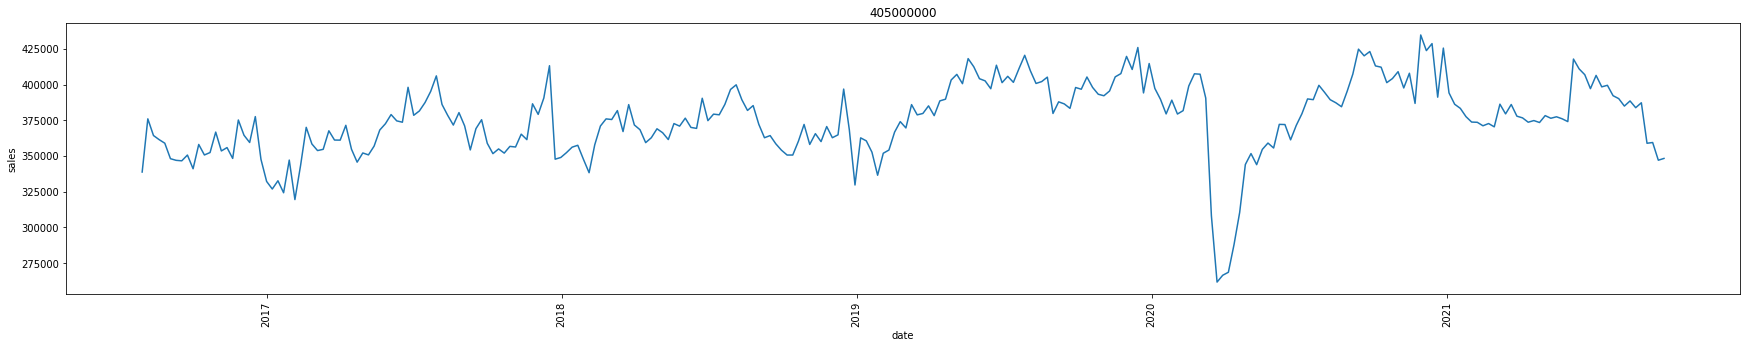

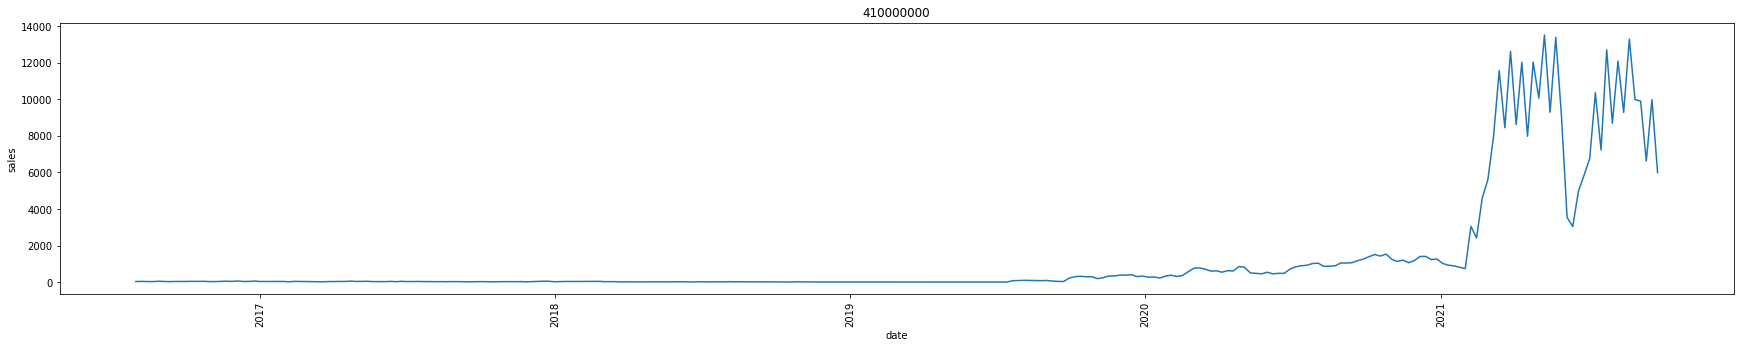

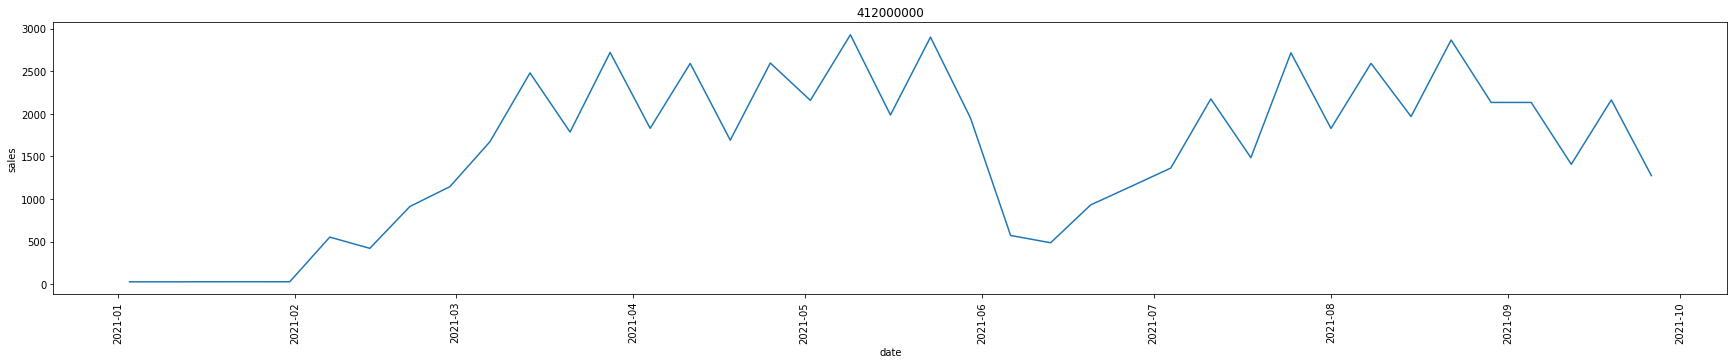

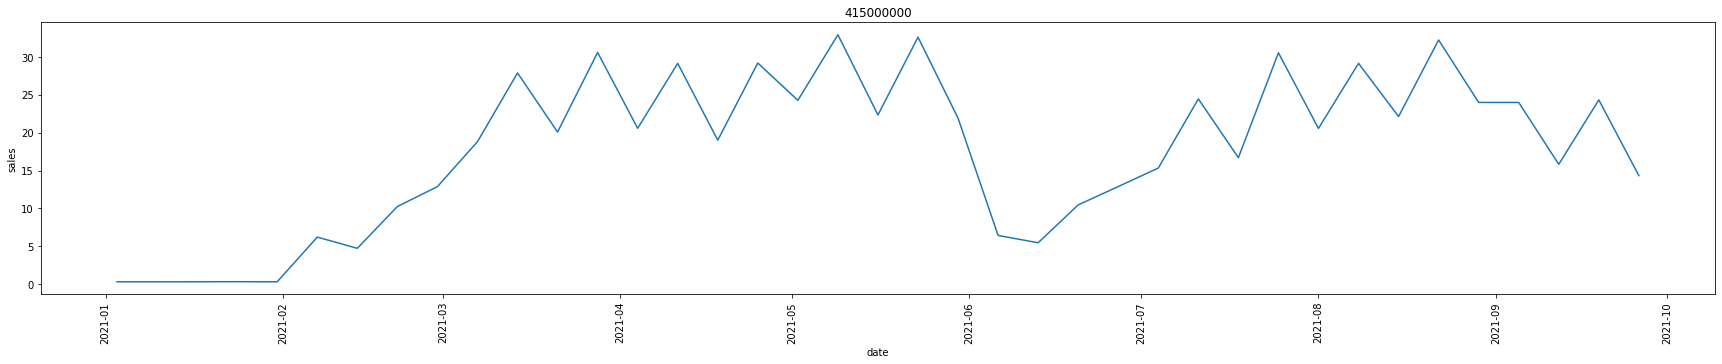

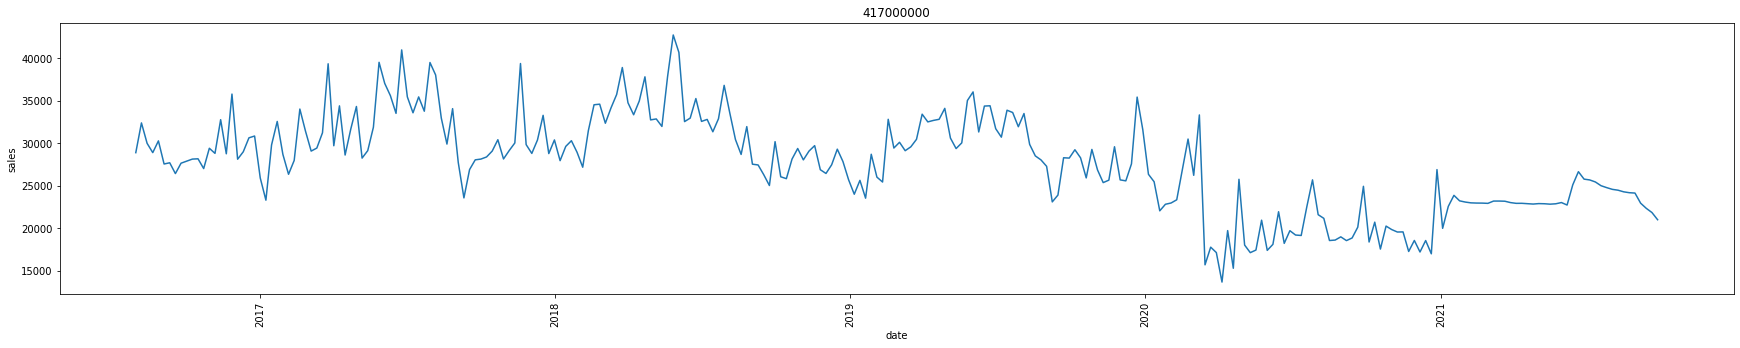

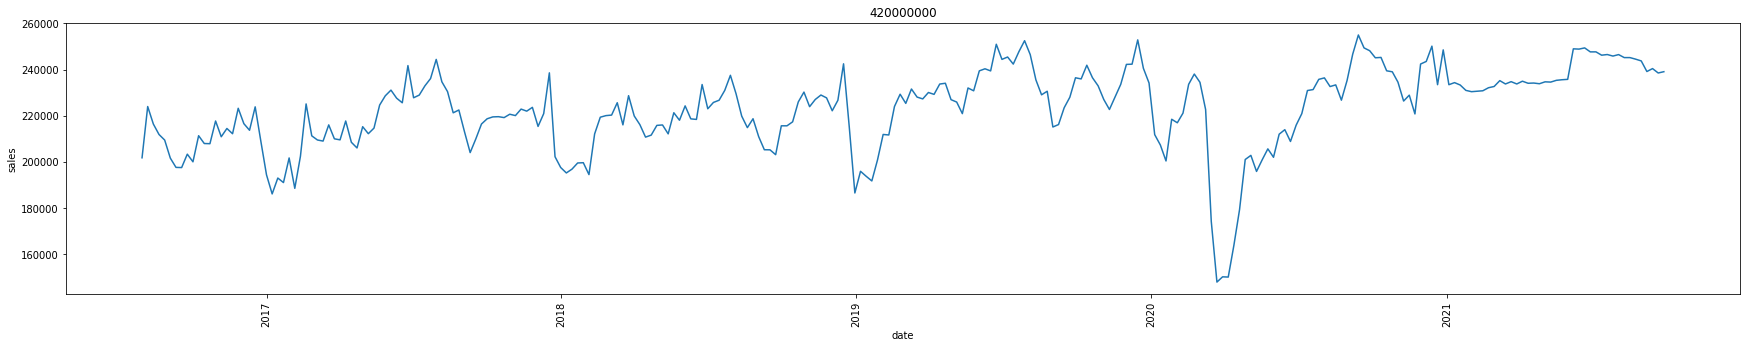

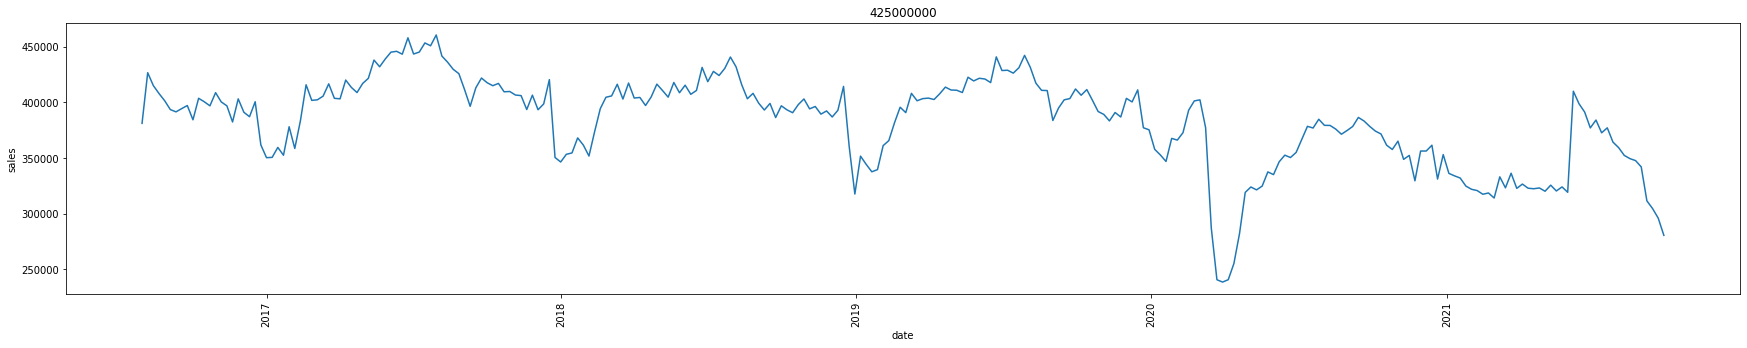

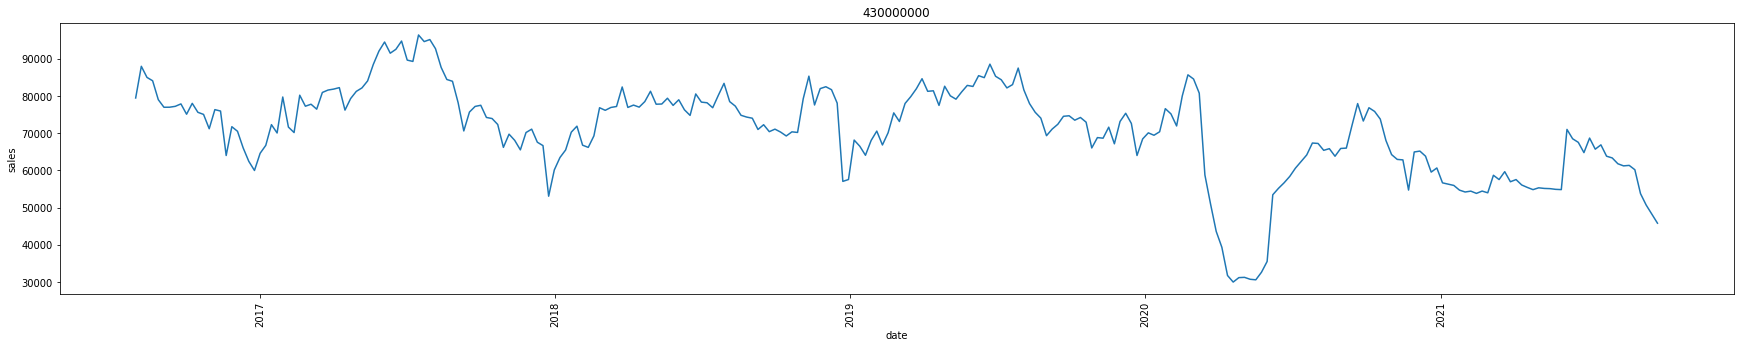

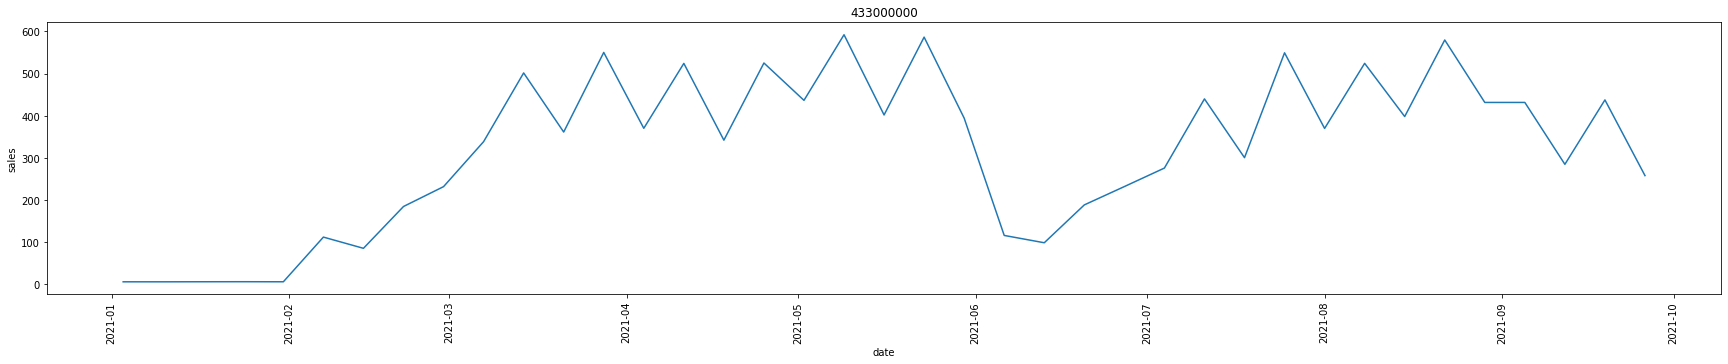

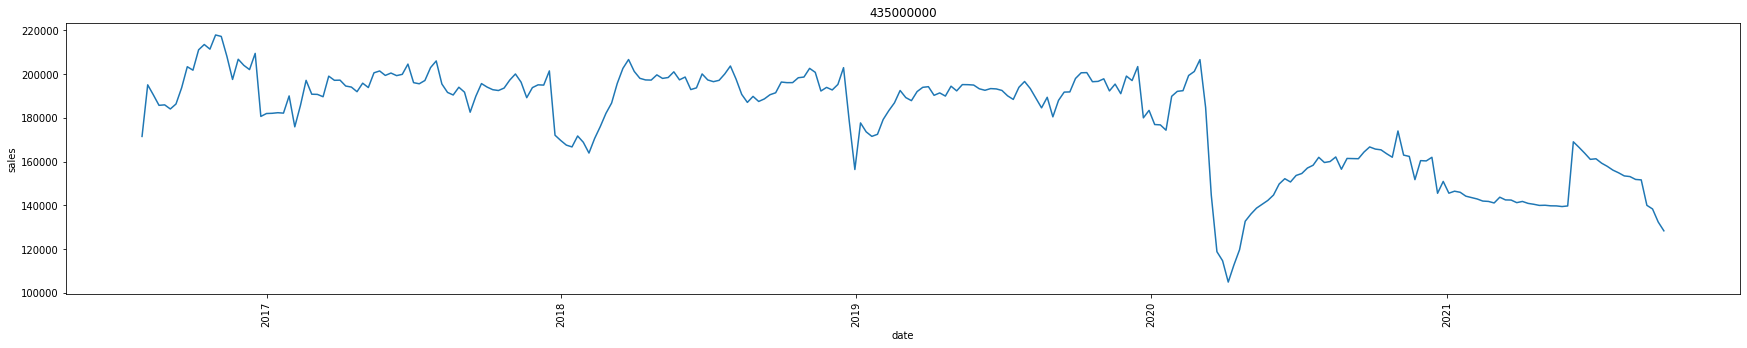

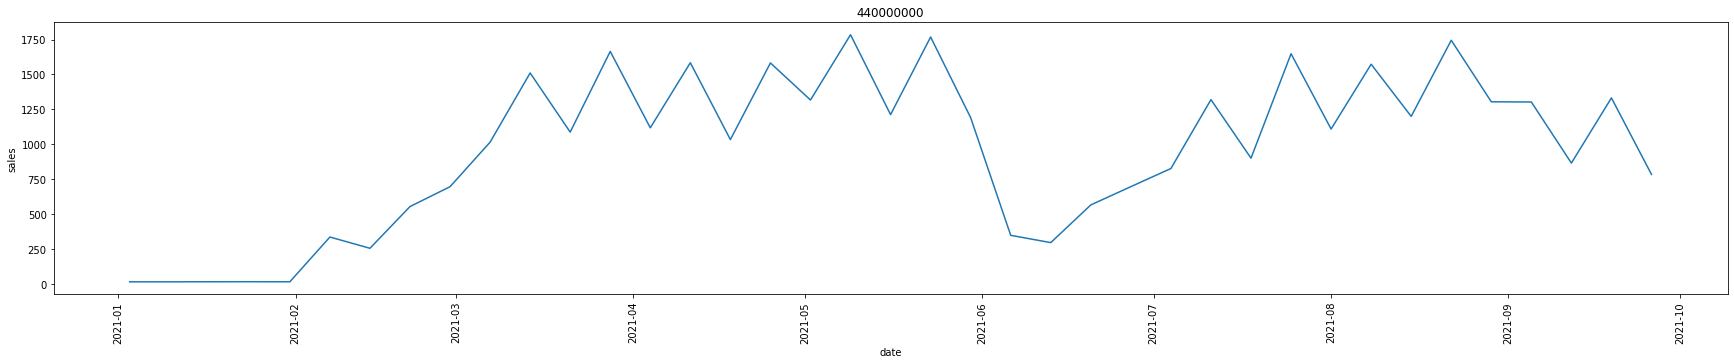

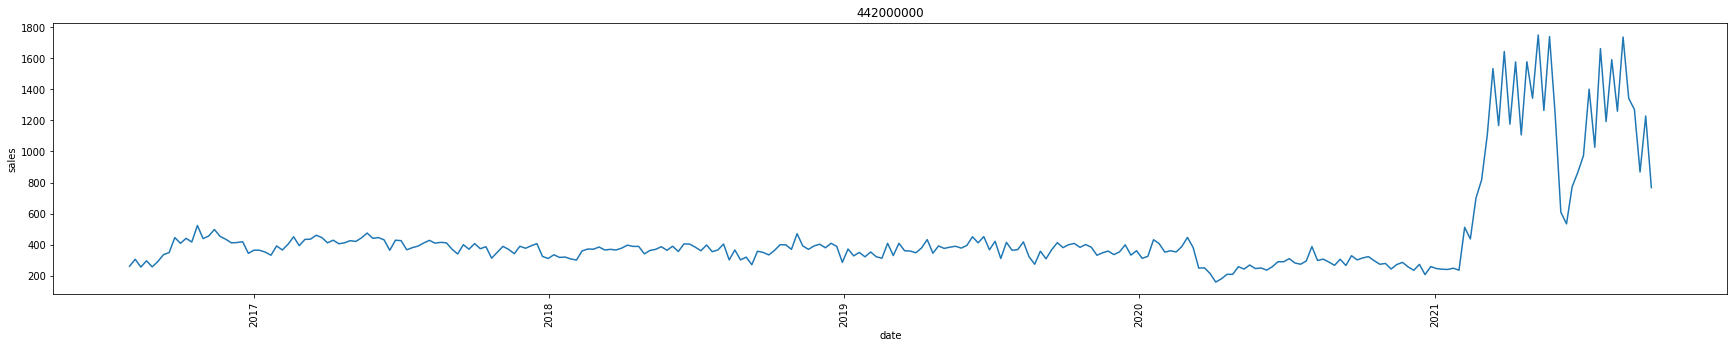

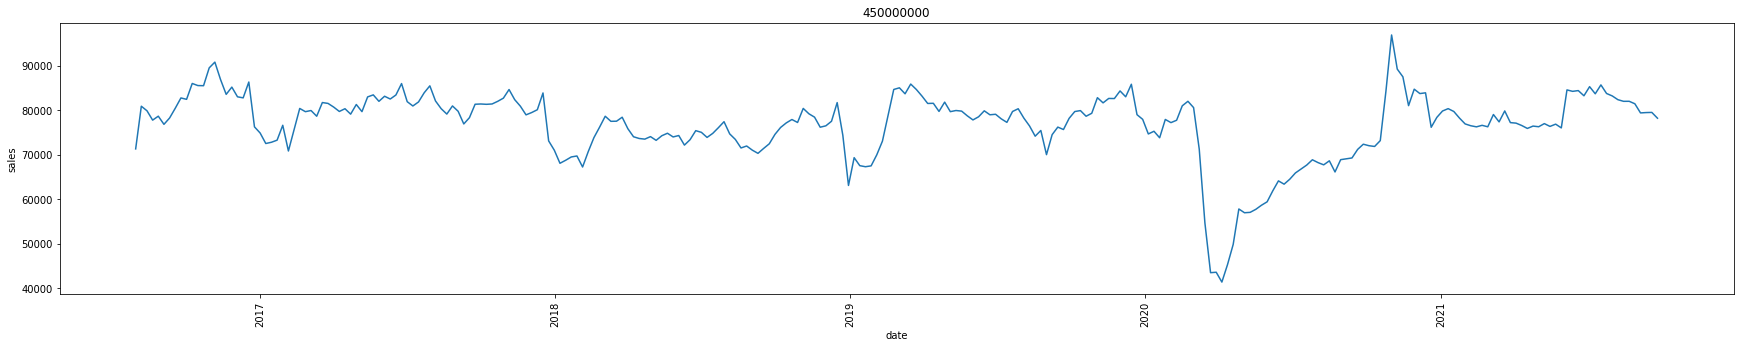

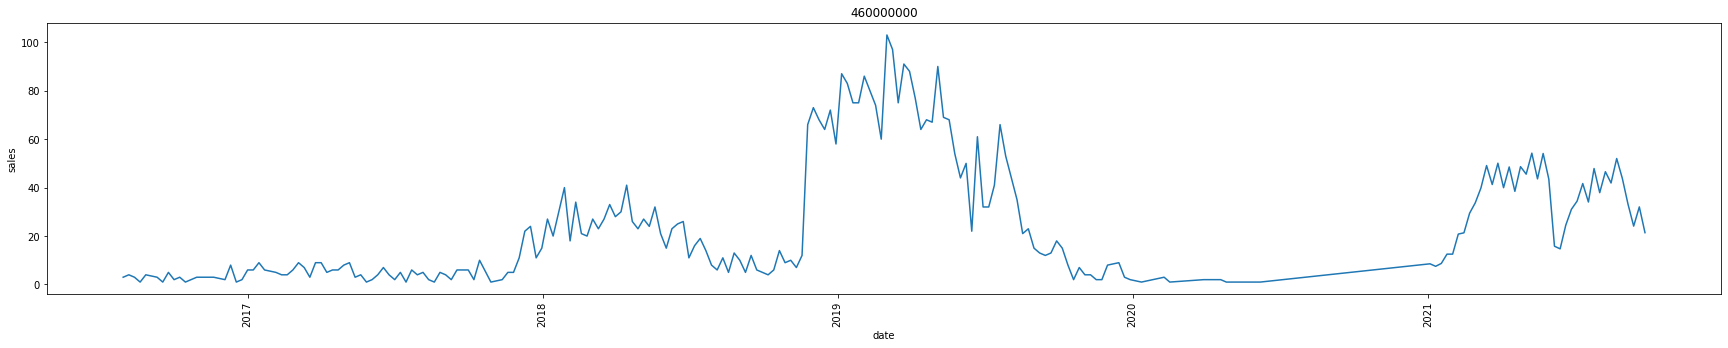

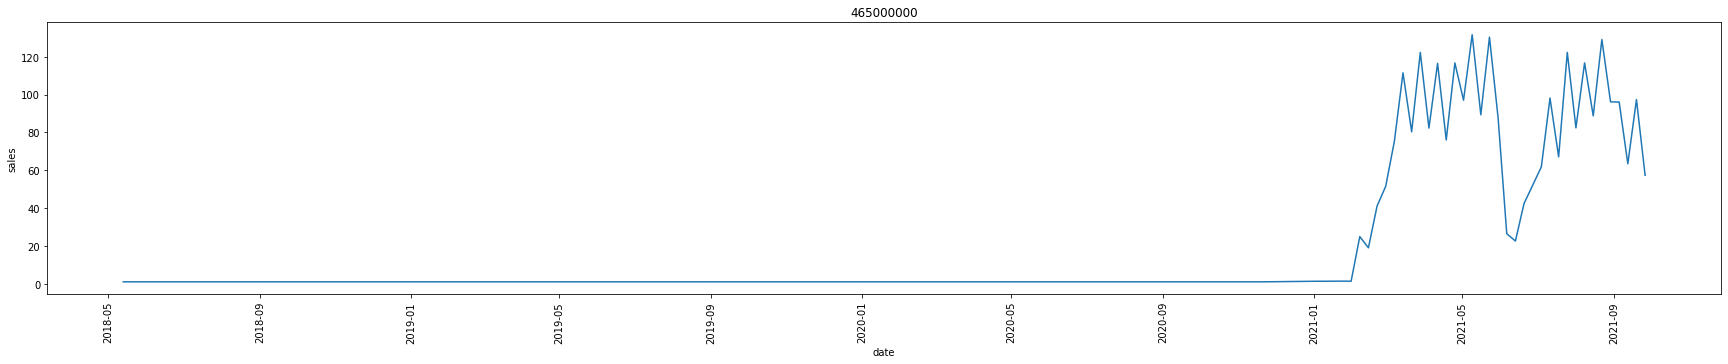

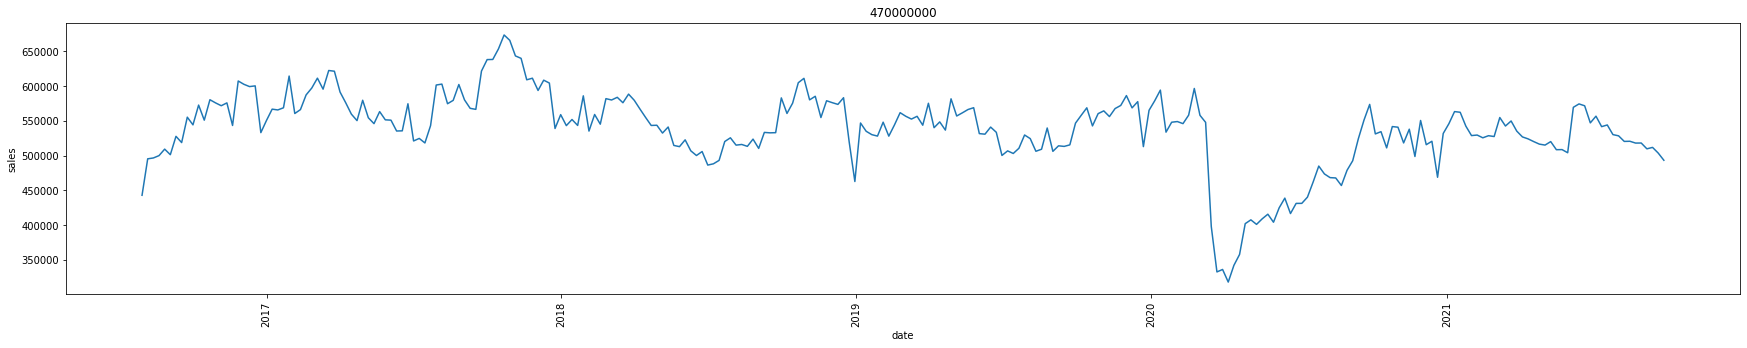

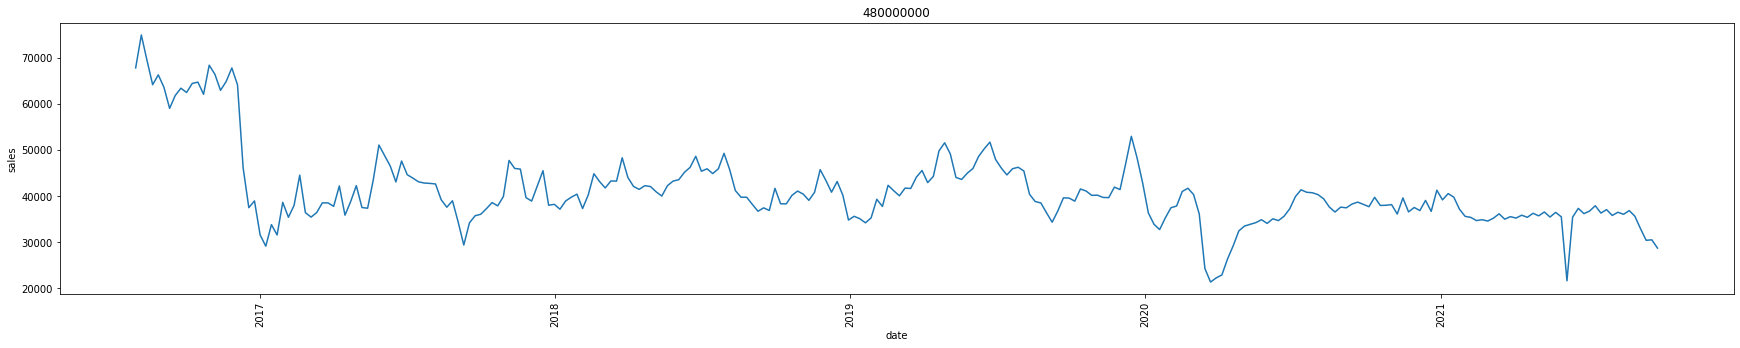

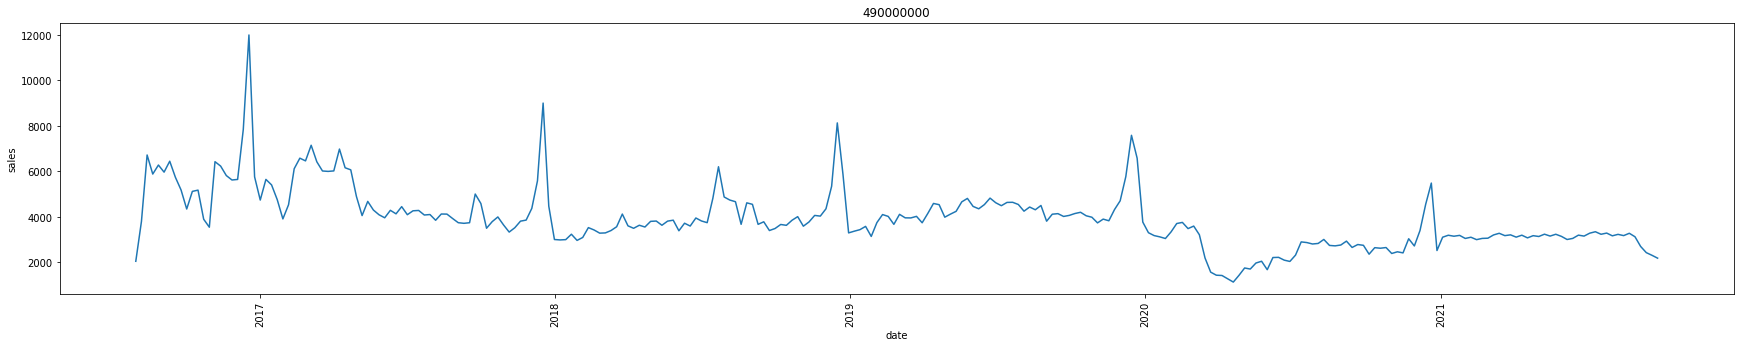

In [128]:
for i in L5_data:
  d=i_data[i_data["L5"]==i]

  
  plt.figure(figsize=(30,5))
  sns.lineplot(data = d,
                                x = 'date', y = 'sales',estimator=sum
                                ,ci=None
                                ).set_title(i)
  
  plt.xticks(rotation=90)
  print("\n")
  plt.show()




*  In the channels with high demand effect of covid is observed
*  Many channels with low demand can be observed


*   These channel are generally active after 2020. Showing that they have been established recently or sold proactively from 2021
*   This might be the reason that we observed the irregular demand distribution






In [129]:
date_data=i_data.date.unique()

In [130]:
l_date=[]
for i in date_data:
  r=[]
  d=i_data[i_data["date"]==i]
  r.append(i)
  r.append(len(d))
  l_date.append(r)

In [131]:
l_date=pd.DataFrame(l_date)

In [132]:
l_date=l_date.sort_values(by=0)

In [133]:
l_date

0       1
0   2016-07-31   13377
1   2016-08-07   13608
2   2016-08-14   13457
3   2016-08-21   13589
4   2016-08-28   13736
..         ...     ...
265 2021-08-29  192792
266 2021-09-05  192792
267 2021-09-12  192792
268 2021-09-19  192792
269 2021-09-26  192792

[270 rows x 2 columns]

In [134]:
for i in range(len(l_date)):
  if l_date.loc[i,1]>25000:
    print(l_date.loc[i,0])
    break


2021-01-03 00:00:00


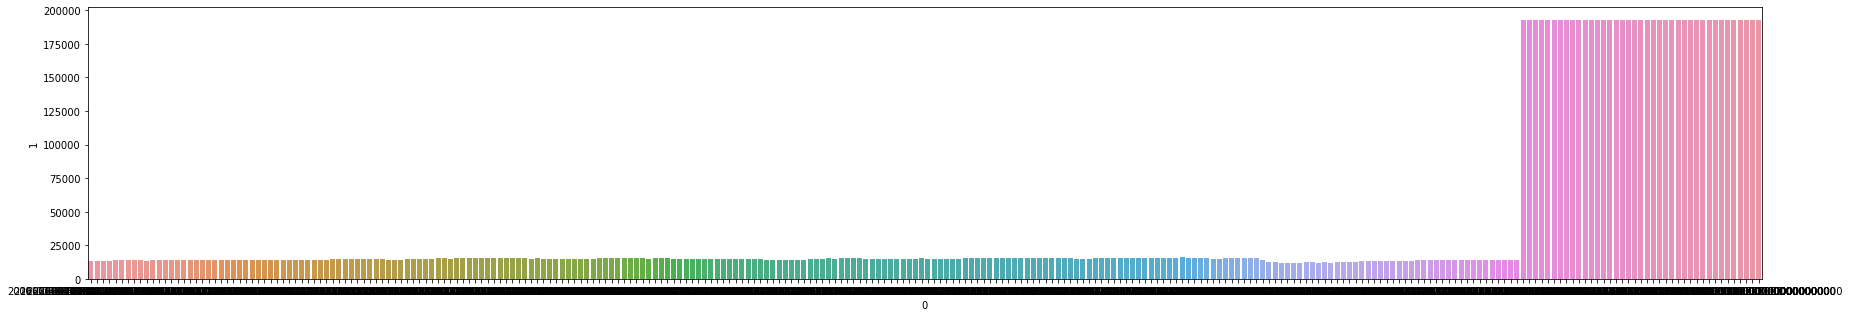

In [135]:
plt.figure(figsize=(30,5))
sns.barplot(data = l_date,
                                x = 0, y = 1
                                ,ci=None
                                )

print("\n")
plt.show()

In [136]:
i_data2=i_data.groupby(['date','item']).agg(sales=("sales",sum)).reset_index()

In [137]:
i_data2

date       item         sales
0      2016-07-31  400000000  11817.000000
1      2016-07-31  400000001    709.000000
2      2016-07-31  400000002  53794.000000
3      2016-07-31  400000003  27213.000000
4      2016-07-31  400000004  26497.000000
...           ...        ...           ...
303661 2021-09-26  400007849     41.761954
303662 2021-09-26  400007850      0.184123
303663 2021-09-26  400007851     12.327094
303664 2021-09-26  400007852     12.967958
303665 2021-09-26  400007855      0.339510

[303666 rows x 3 columns]

<AxesSubplot:xlabel='date', ylabel='sales'>

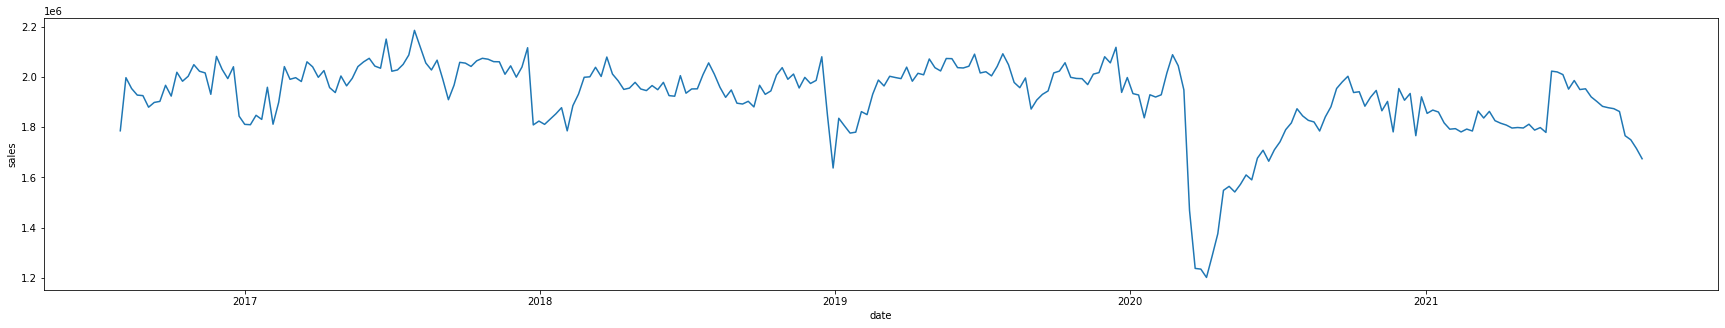

In [138]:
plt.figure(figsize=(30,5))
sns.lineplot(data = i_data2,
                                x = "date", y = "sales",estimator=sum
                                ,ci=None
                                )

<AxesSubplot:xlabel='date', ylabel='sales'>

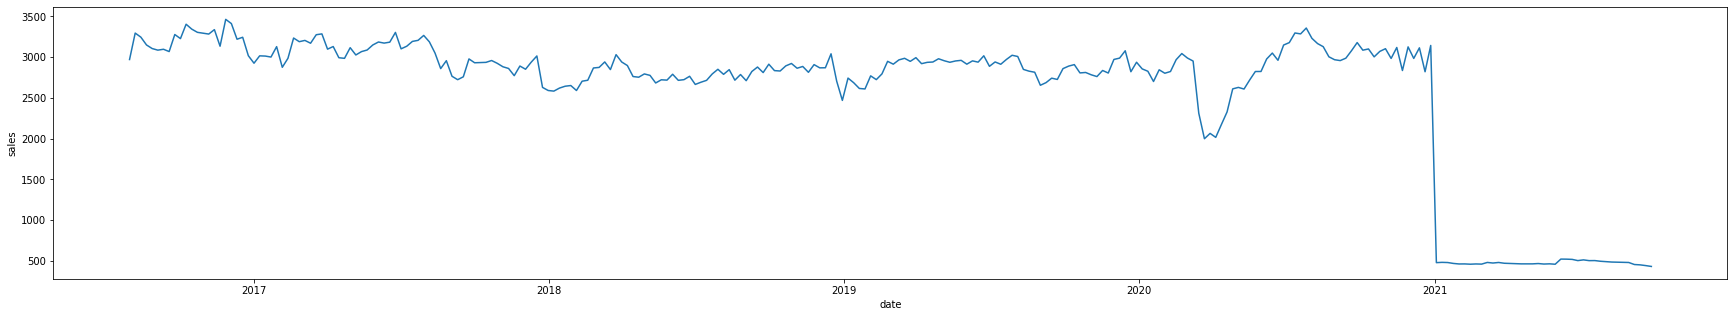

In [139]:
plt.figure(figsize=(30,5))
sns.lineplot(data = i_data2,
                                x = "date", y = "sales",estimator=np.mean
                                ,ci=None
                                )

The above two graphs have total sale and average sale across the timeline.
So this gives us an idea that something changed after 2021. The reduced average may be due to a lot of inactive items or newly introduced items. 

In [140]:
i_count=i_data2["item"].value_counts()

In [141]:
i_count=pd.DataFrame(i_count)

In [142]:
i_count["item_name"]=i_count.index

In [143]:
i_count["time_steps"]=i_count["item"]

In [144]:
i_count

item  item_name  time_steps
400000000   270  400000000         270
400002249   270  400002249         270
400002402   270  400002402         270
400002400   270  400002400         270
400002397   270  400002397         270
...         ...        ...         ...
400004449    39  400004449          39
400004450    39  400004450          39
400004451    39  400004451          39
400004452    39  400004452          39
400007855    39  400007855          39

[3866 rows x 3 columns]

<AxesSubplot:xlabel='item_name', ylabel='time_steps'>

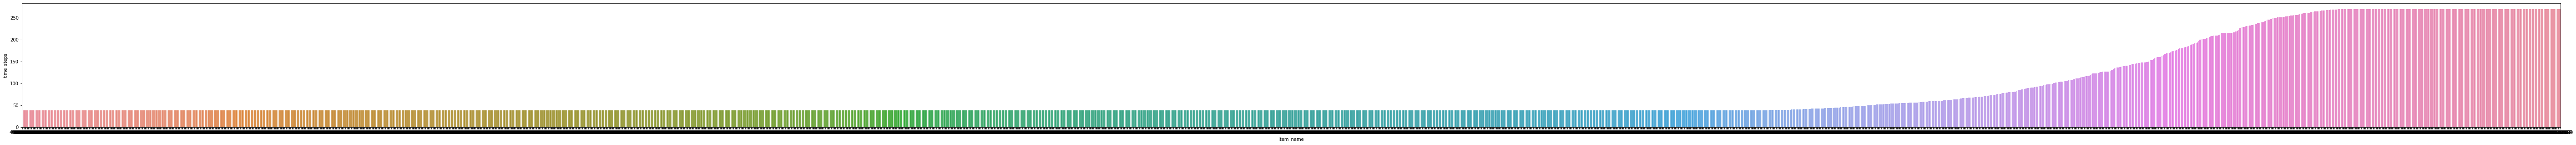

In [145]:
plt.figure(figsize=(100,5))
sns.barplot(data = i_count,
                                x = "item_name", y = "time_steps",order=i_count.sort_values("time_steps").item_name
                                ,ci=None
                                )

So a majority of items have 39 time steps 

In [146]:
i_count=i_count.drop(columns="time_steps")

In [147]:
i_count.sort_values(by="item")

item  item_name
400007450    39  400007450
400001636    39  400001636
400001637    39  400001637
400001639    39  400001639
400001643    39  400001643
...         ...        ...
400000363   270  400000363
400000494   270  400000494
400000493   270  400000493
400000519   270  400000519
400000000   270  400000000

[3866 rows x 2 columns]

In [148]:
i2=i_count["item"].value_counts()

In [149]:
i2=pd.DataFrame(i2)

In [150]:
i2["time"]=i2.index

In [151]:
i2.drop(i2.tail(1).index,inplace=True)

In [152]:
i2

item  time
39   2661    39
270   341   270
40     33    40
43     21    43
41     18    41
..    ...   ...
186     1   186
110     1   110
113     1   113
119     1   119
120     1   120

[213 rows x 2 columns]

**So 2661 items have only 39 time steps while 341 items have 270 time steps.**

In [153]:
i2=i2.sort_values(by="time")

In [154]:
i2.iloc[1:]

item  time
40     33    40
41     18    41
42     12    42
43     21    43
44     15    44
..    ...   ...
266     3   266
267     7   267
268     7   268
269    10   269
270   341   270

[212 rows x 2 columns]

<AxesSubplot:xlabel='time', ylabel='item'>

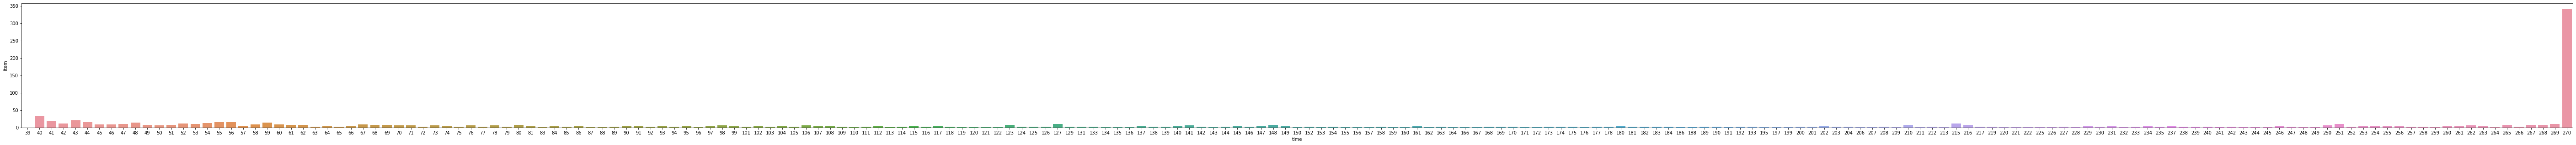

In [155]:
plt.figure(figsize=(100,5))
sns.barplot(data = i2.iloc[1:],
                                x = "time", y = "item",order=i2.sort_values("time").time
                                ,ci=None
                                )

So we can see after 39 time steps next prominent time steps is
 270

In [156]:
i_count.rename(columns={"item":"time_period","item_name":"item" },inplace=True)

In [157]:
i2.rename(columns={"item":"n_items","time":"time_period" },inplace=True)

In [158]:
i3=pd.merge(item1,i_count,how='left',on=["item"])

In [159]:
i3=pd.merge(i3,i2,how="left",on="time_period")

In [160]:
i3["norm_sale"]=(i3["total_sale"]/i3["time_period"])/(i3["n_items"])

In [161]:
i3

item         L5         L2         L1         L3    total_sale  \
0     400004162  470000000  270800500  170800505  370800000  2.959837e+07   
1     400004163  470000000  270800500  170800505  370800000  2.509375e+07   
2     400003277  420000000  220052000  120052005  320050000  2.437210e+07   
3     400000028  450000000  250050500  150050505  350050000  1.834571e+07   
4     400000002  405000000  205050500  105050510  305050000  1.767728e+07   
...         ...        ...        ...        ...        ...           ...   
3861  400005428  425000000  225151500  125151510  325150000  1.234700e+01   
3862  400005426  425000000  225151500  125151510  325150000  1.234700e+01   
3863  400005425  425000000  225151500  125151510  325150000  1.234700e+01   
3864  400005190  425000000  225056500  125056525  325050000  1.225824e+01   
3865  400005191  425000000  225056500  125056525  325050000  1.225824e+01   

       percent  cumm_percent  time_period  n_items   norm_sale  
0     5.707740      5.707740          270    341.0  321.476849  
1     4.839069     10.546809          270    341.0  272.550731  
2     4.699908     15.246717          270    341.0  264.712751  
3     3.537779     18.784497          270    341.0  199.258233  
4     3.408881     22.193377          270    341.0  191.998269  
...        ...           ...          ...      ...         ...  
3861  0.000002     99.999991           39   2661.0    0.000119  
3862  0.000002     99.999993           39   2661.0    0.000119  
3863  0.000002     99.999995           39   2661.0    0.000119  
3864  0.000002     99.999998           39   2661.0    0.000118  
3865  0.000002    100.000000           39   2661.0    0.000118  

[3866 rows x 11 columns]

In [162]:
i3.time_period.unique()

array([270, 256, 265, 243, 260,  59, 269, 229, 239, 249, 245, 175, 138,
       201, 253, 144, 112, 161, 173, 153, 121, 219, 212, 203, 210, 246,
       134,  52, 250, 176, 124, 268, 237, 261, 190, 123, 217, 220,  53,
       181,  39, 257, 139, 234, 141, 242, 148, 146, 255,  76, 231, 103,
       189, 244,  58, 251, 215, 147, 174, 102, 184,  90,  45, 127, 182,
       216,  78,  56, 200, 180, 262, 266, 202,  84, 154, 150, 118,  86,
       115, 169, 254,  69, 247, 233,  67,  77,  54,  62, 222, 105, 155,
       126,  65, 186, 145, 109,  91, 235,  72, 104, 129, 177, 149,  80,
       107, 171,  89, 168, 193,  98, 143, 131,  74,  95, 163,  73,  85,
       252, 106, 133, 263,  68, 142,  66,  55, 137, 264, 238, 116,  61,
       267,  99, 208,  64, 259, 152,  70, 241,  71, 183, 158,  94, 225,
       101,  60,  47, 167,  75, 170, 108,  92,  83, 240, 227,  93, 125,
       213,  48, 164, 230, 135,  40, 120, 248, 258, 207, 117, 114, 110,
       211, 204, 140, 206, 192, 221,  97,  79, 178, 128, 159,  9

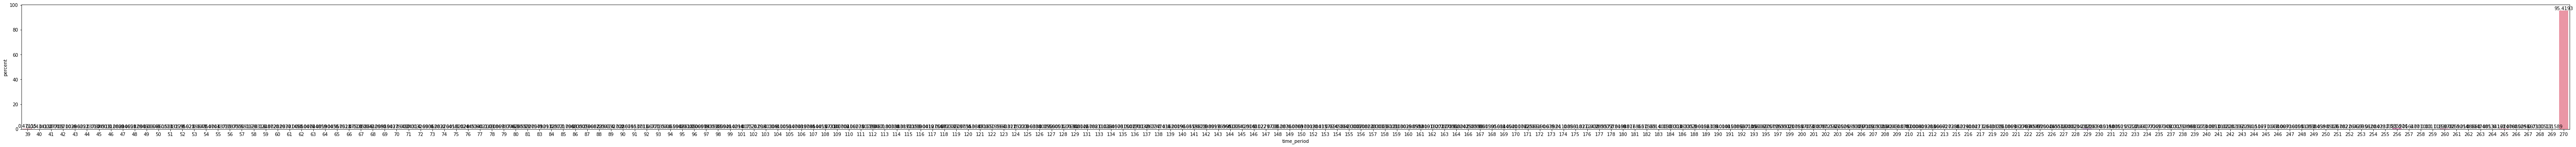

In [163]:
plt.figure(figsize=(100,5))
ax=sns.barplot(data = i3,
                          x = "time_period", y = "percent",estimator=sum
                                ,ci=None
                                )
for i in ax.containers:
    ax.bar_label(i,)


*   So 95 percent of demand can be captured by 270 time steps

*  So we will focus on 341 items for now. We could do it only for 116 items since it has 90% demand but we begin with 341 items. To improve results later on we can focus on 116 items only



<AxesSubplot:xlabel='time_period', ylabel='norm_sale'>

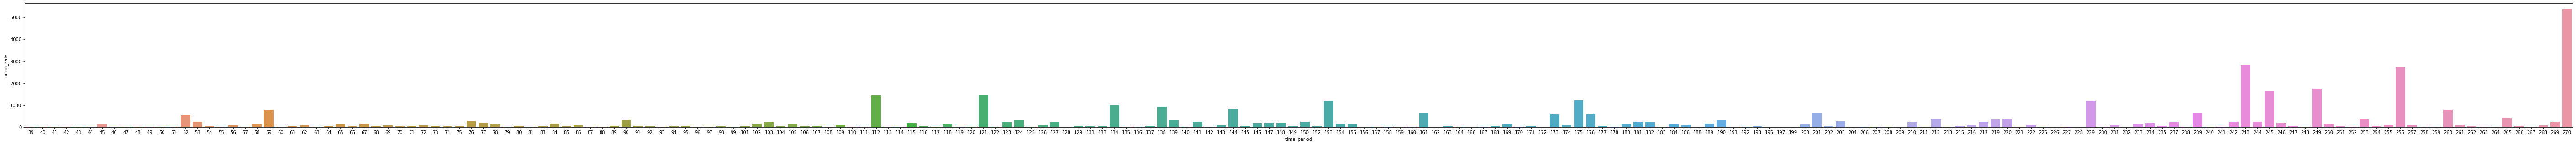

In [164]:
plt.figure(figsize=(100,5))
sns.barplot(data = i3,
                          x = "time_period", y = "norm_sale",estimator=sum
                                ,ci=None
                                )

This graph is the normalized sales according to time steps and number of items. Still 270 is highest. After items having 270 time steps we will focus on 243 and 256 time steps